# Notebook to show the full flow of our code from data exploration to model evaluation

In [1]:
from DataExploration import DataExplorer
from pathlib import Path
from datetime import datetime
from DataLoader import DataLoader
from darts.models import TFTModel
from darts.utils.likelihood_models import QuantileRegression
from ModelEvaluator import evaluate_model
from ResultsEvaluator import evaluate_results
import logging
import warnings
warnings.filterwarnings("ignore")
logging.disable(logging.CRITICAL)
quantiles_sparse = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
quantiles_full = [num / 100.0 for num in range(1, 100)]

## Data exploration


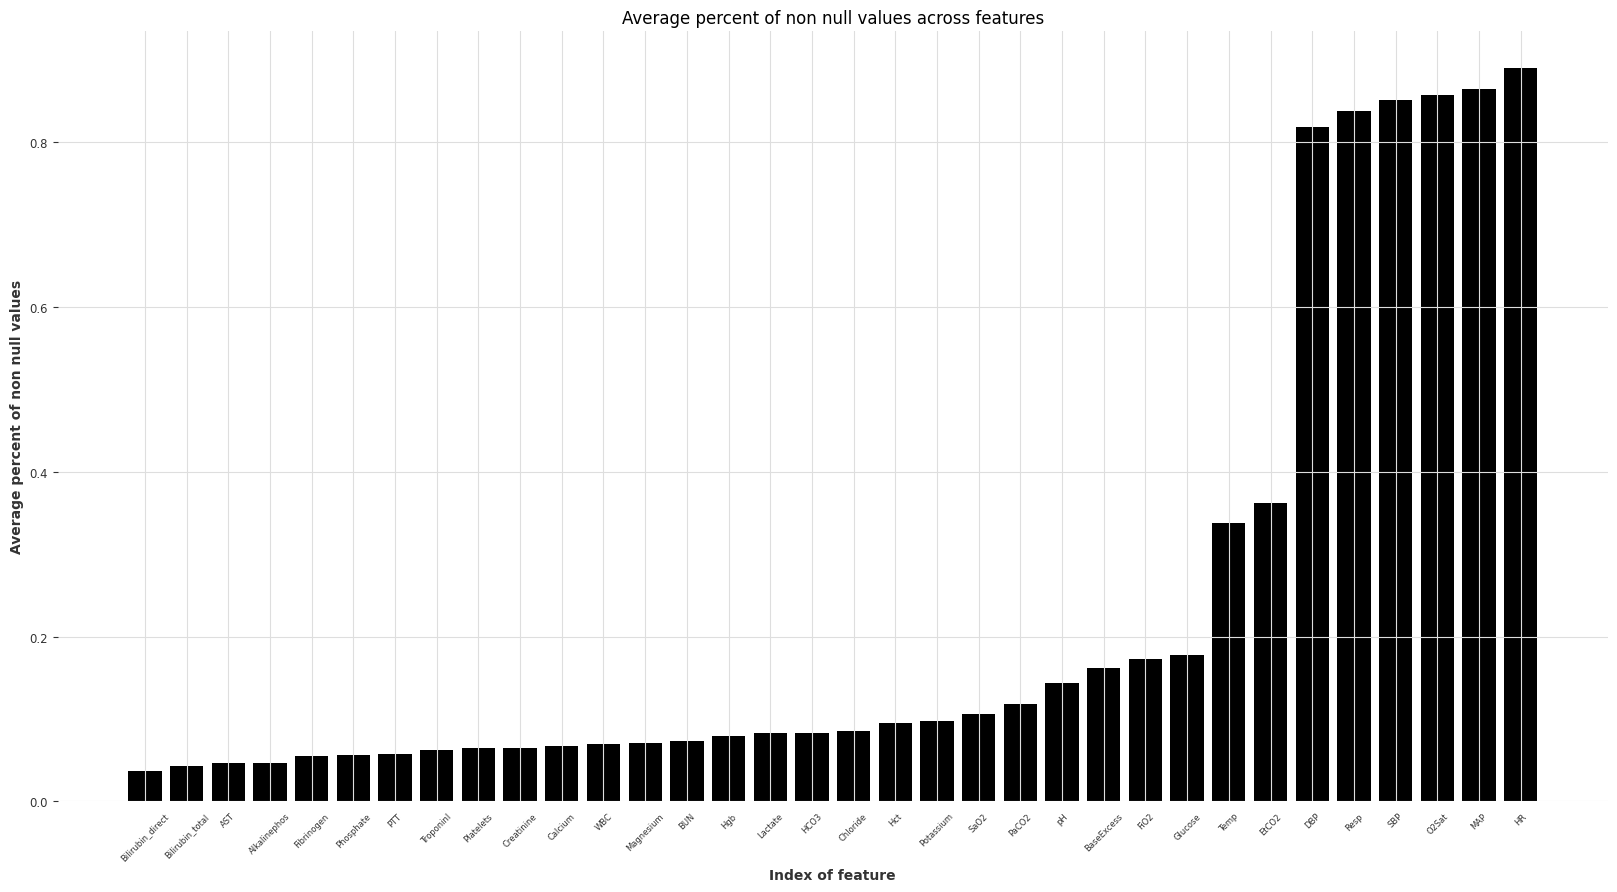

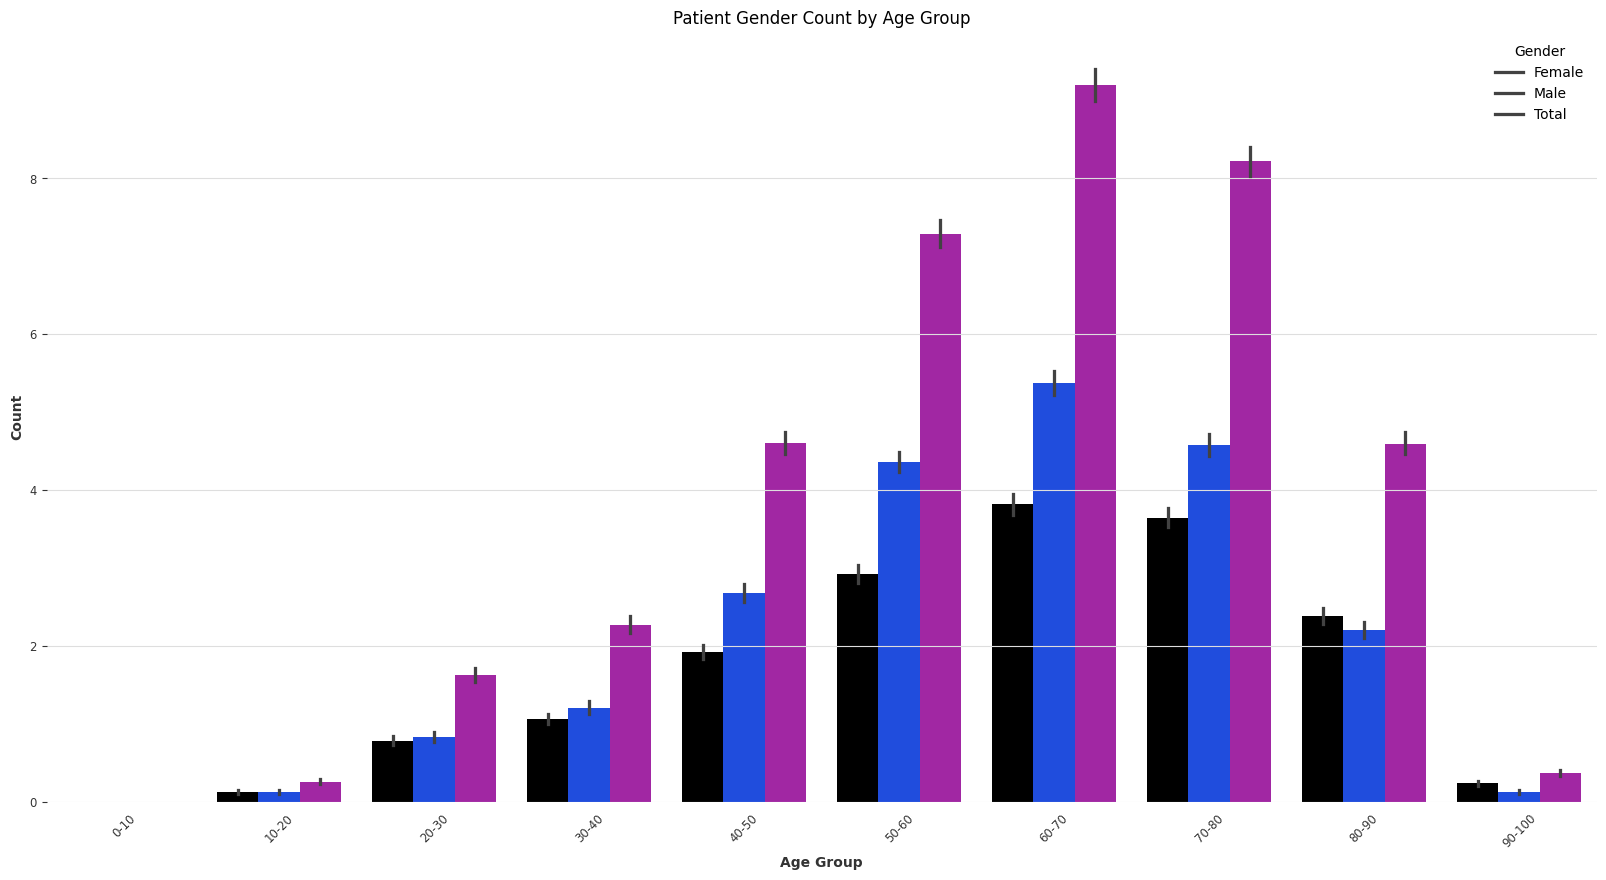

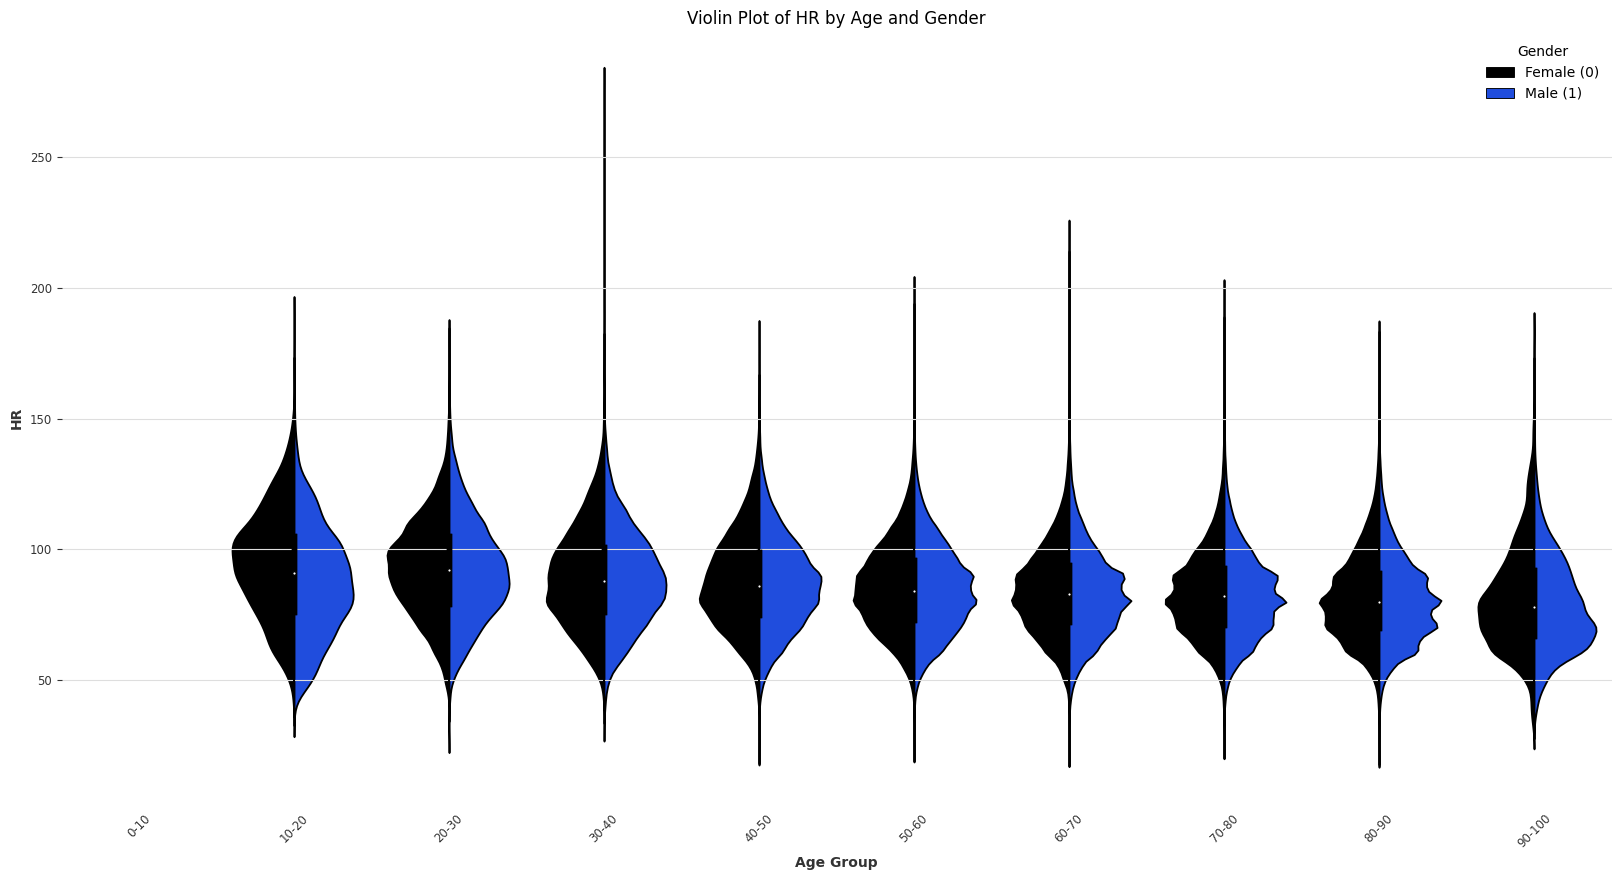

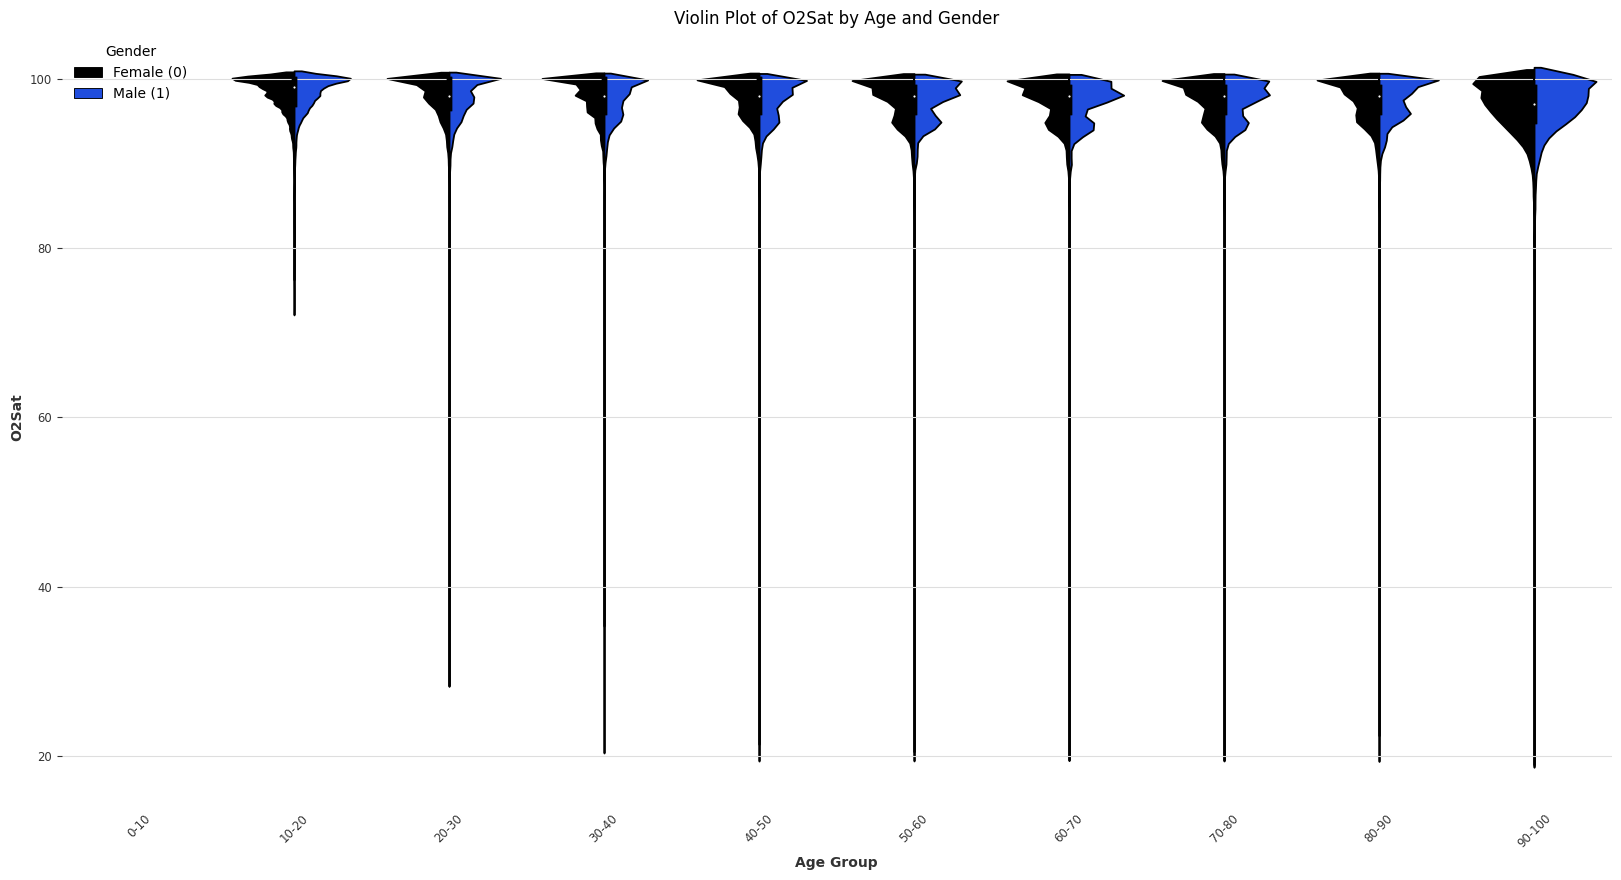

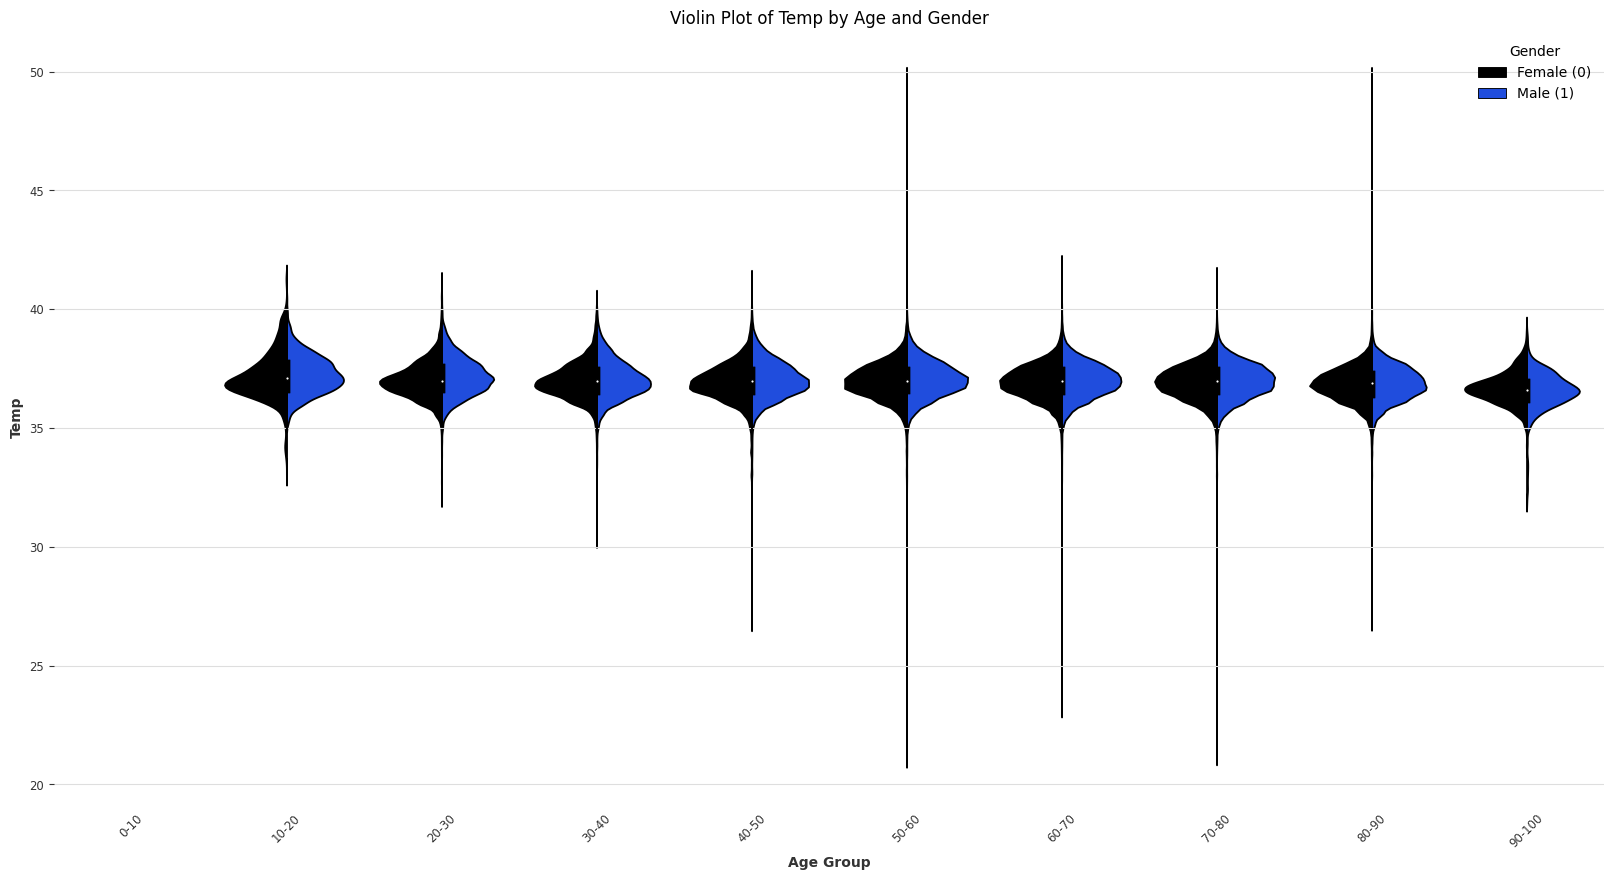

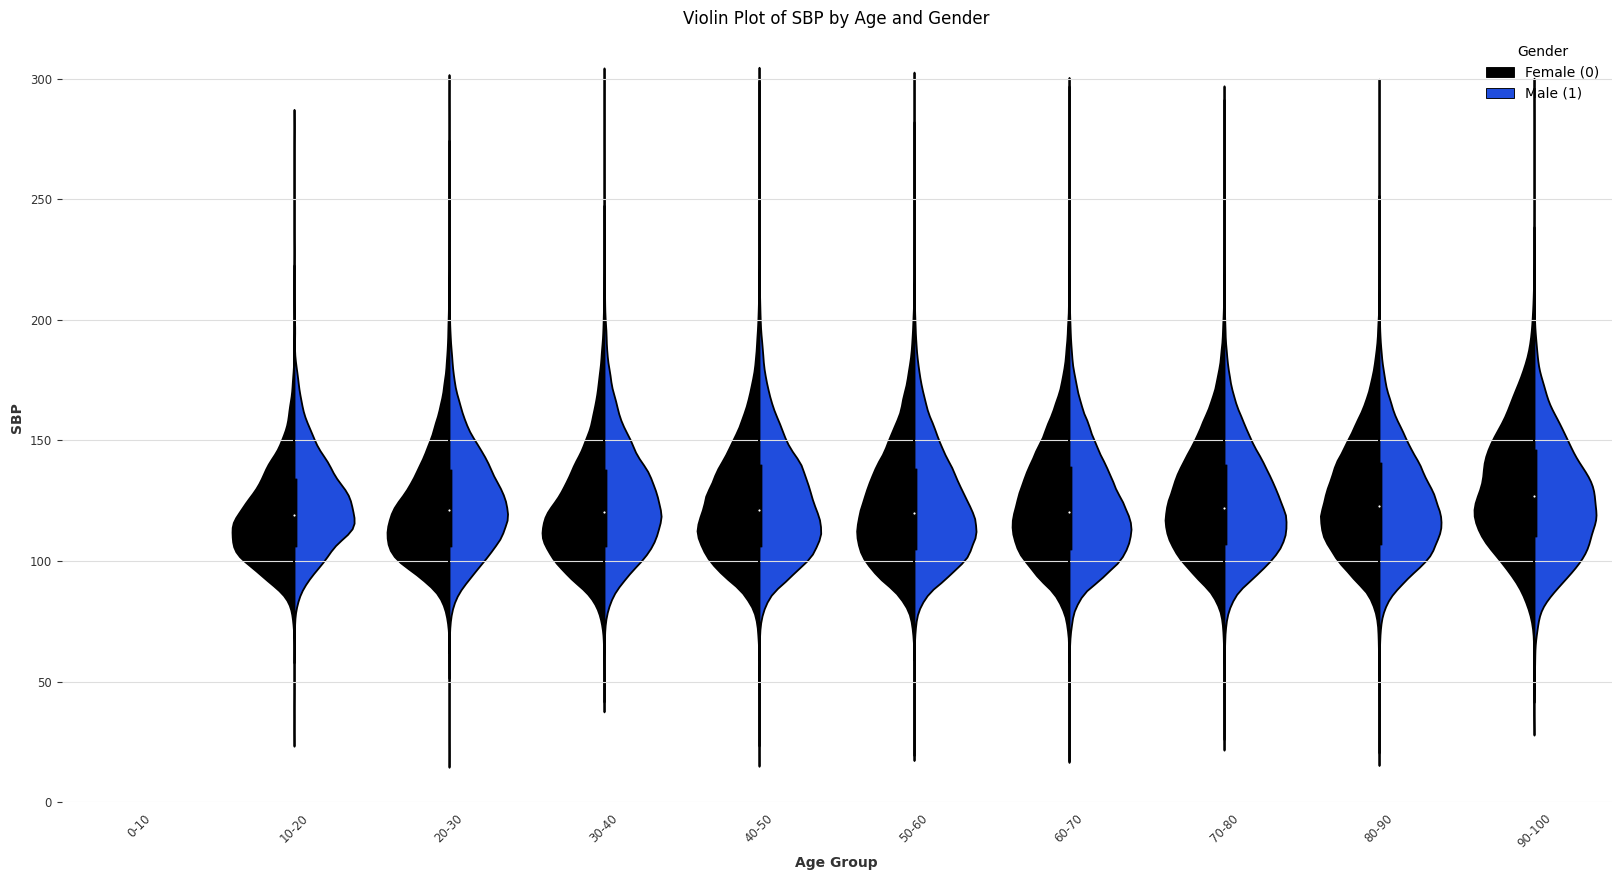

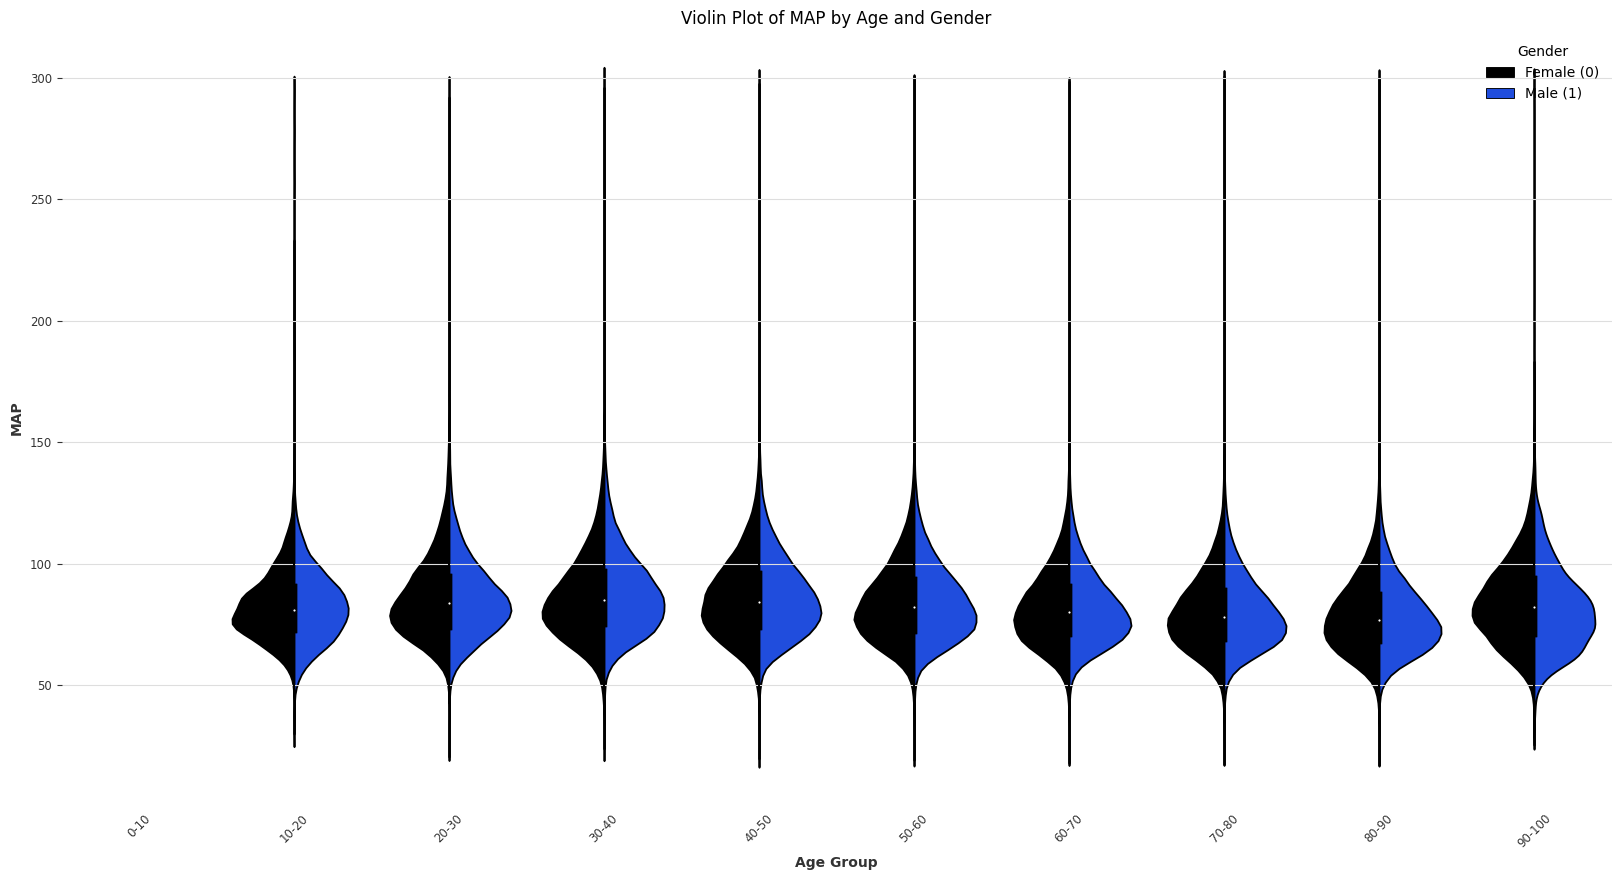

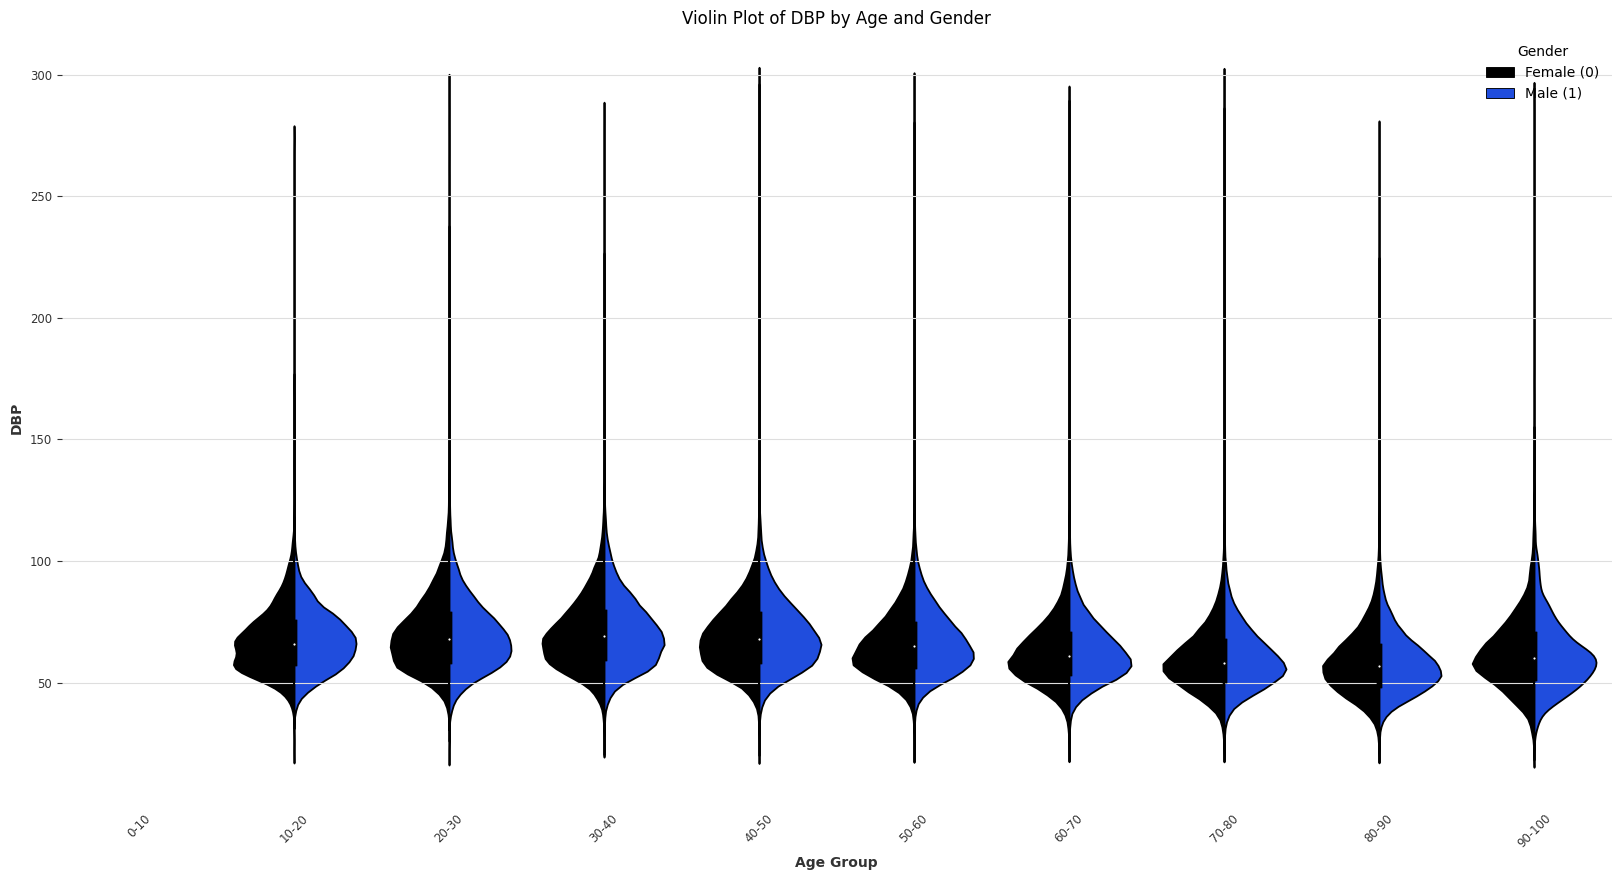

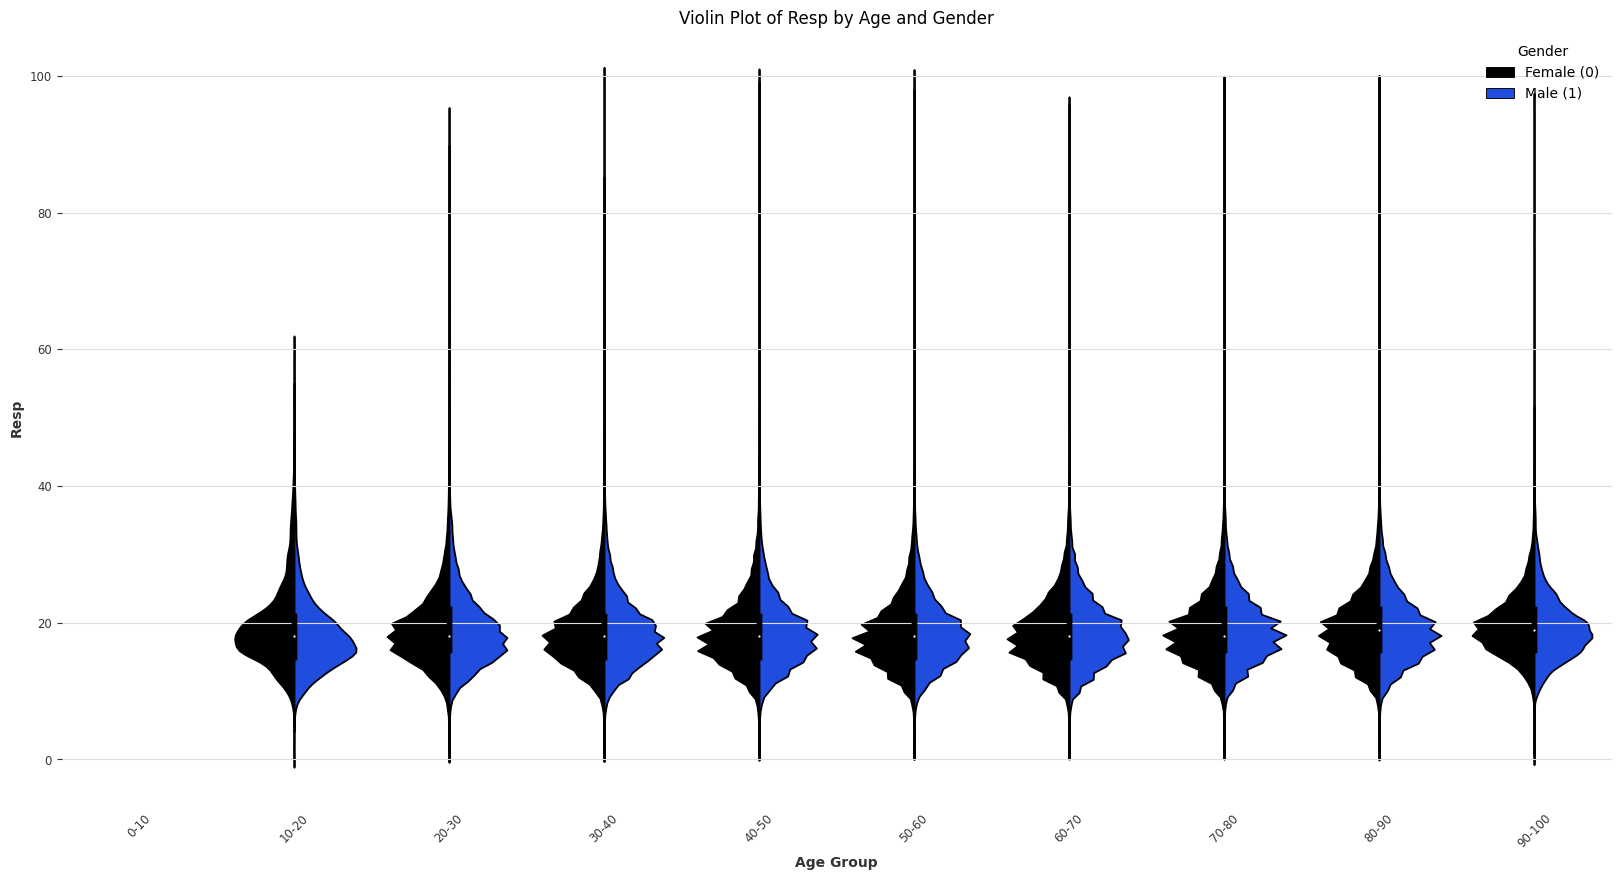

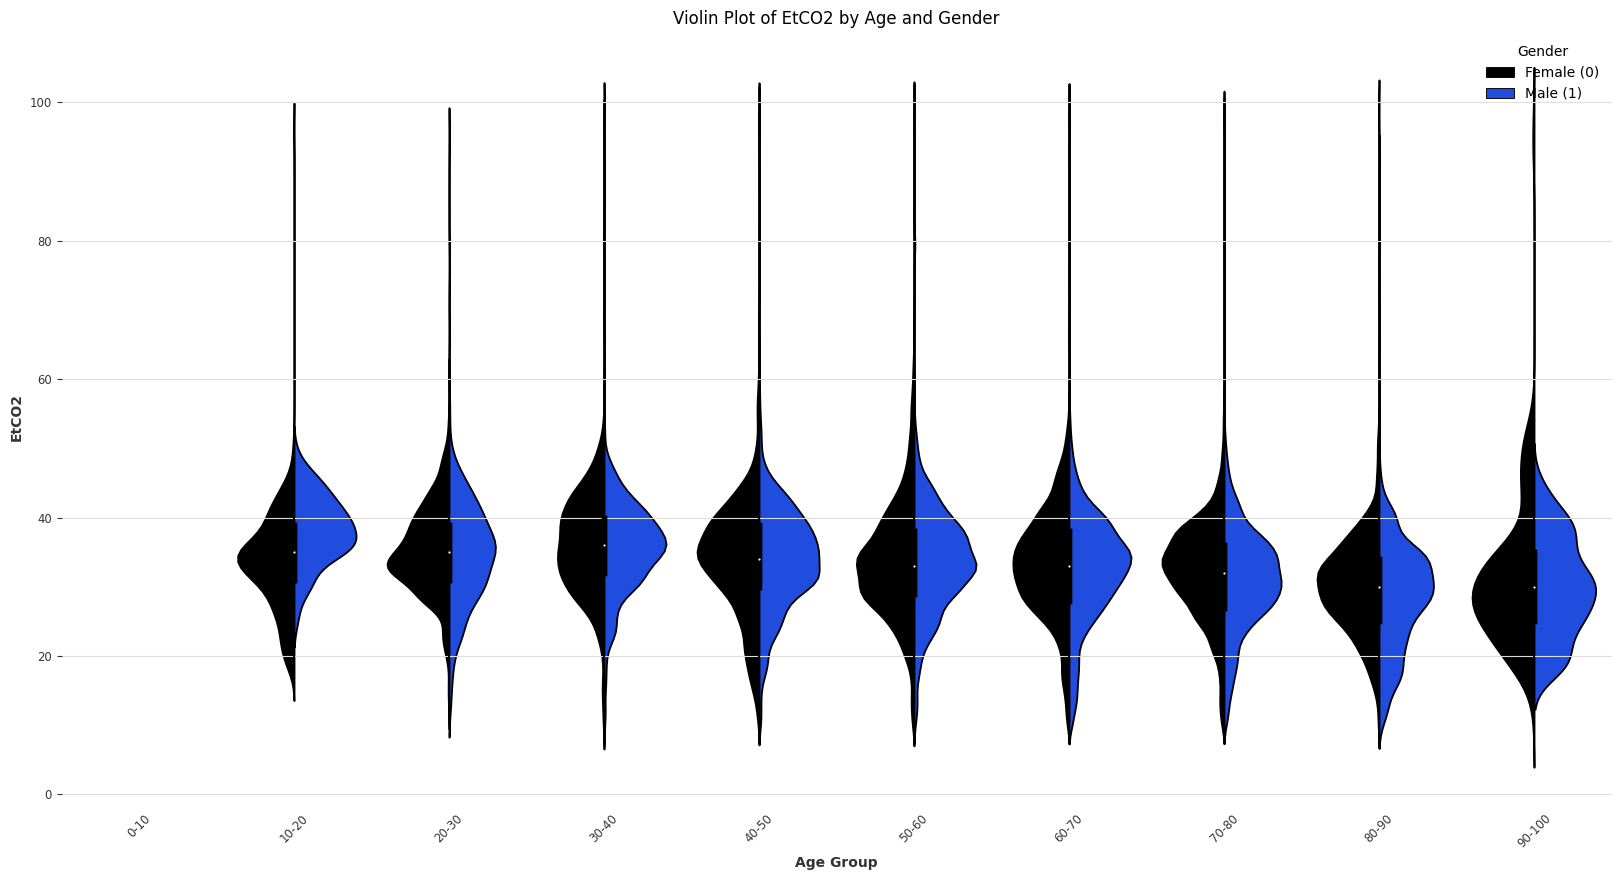

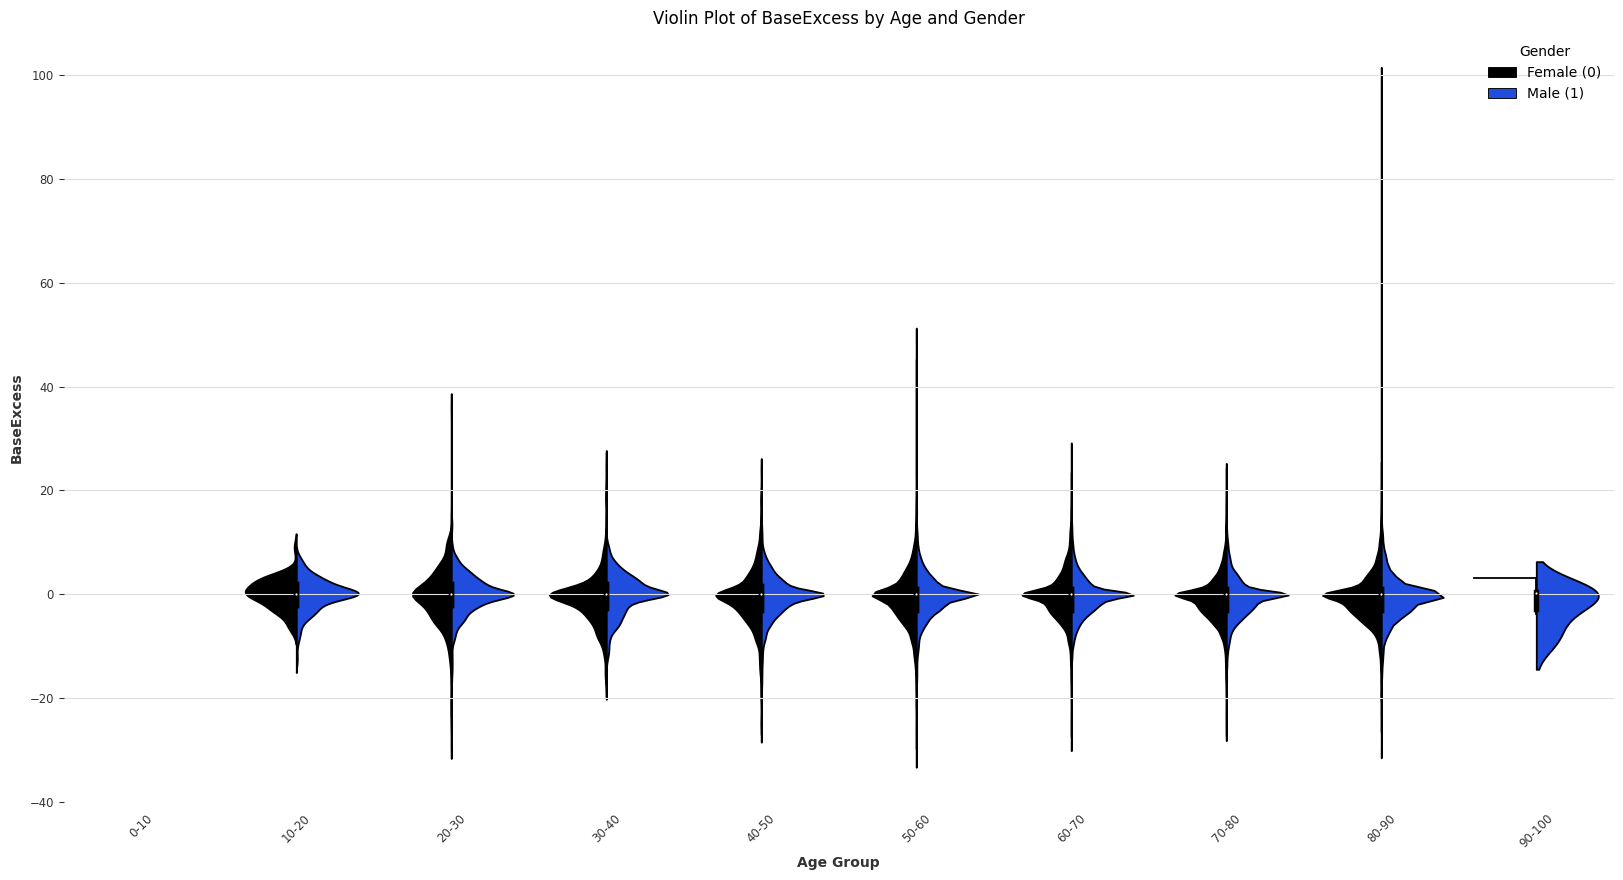

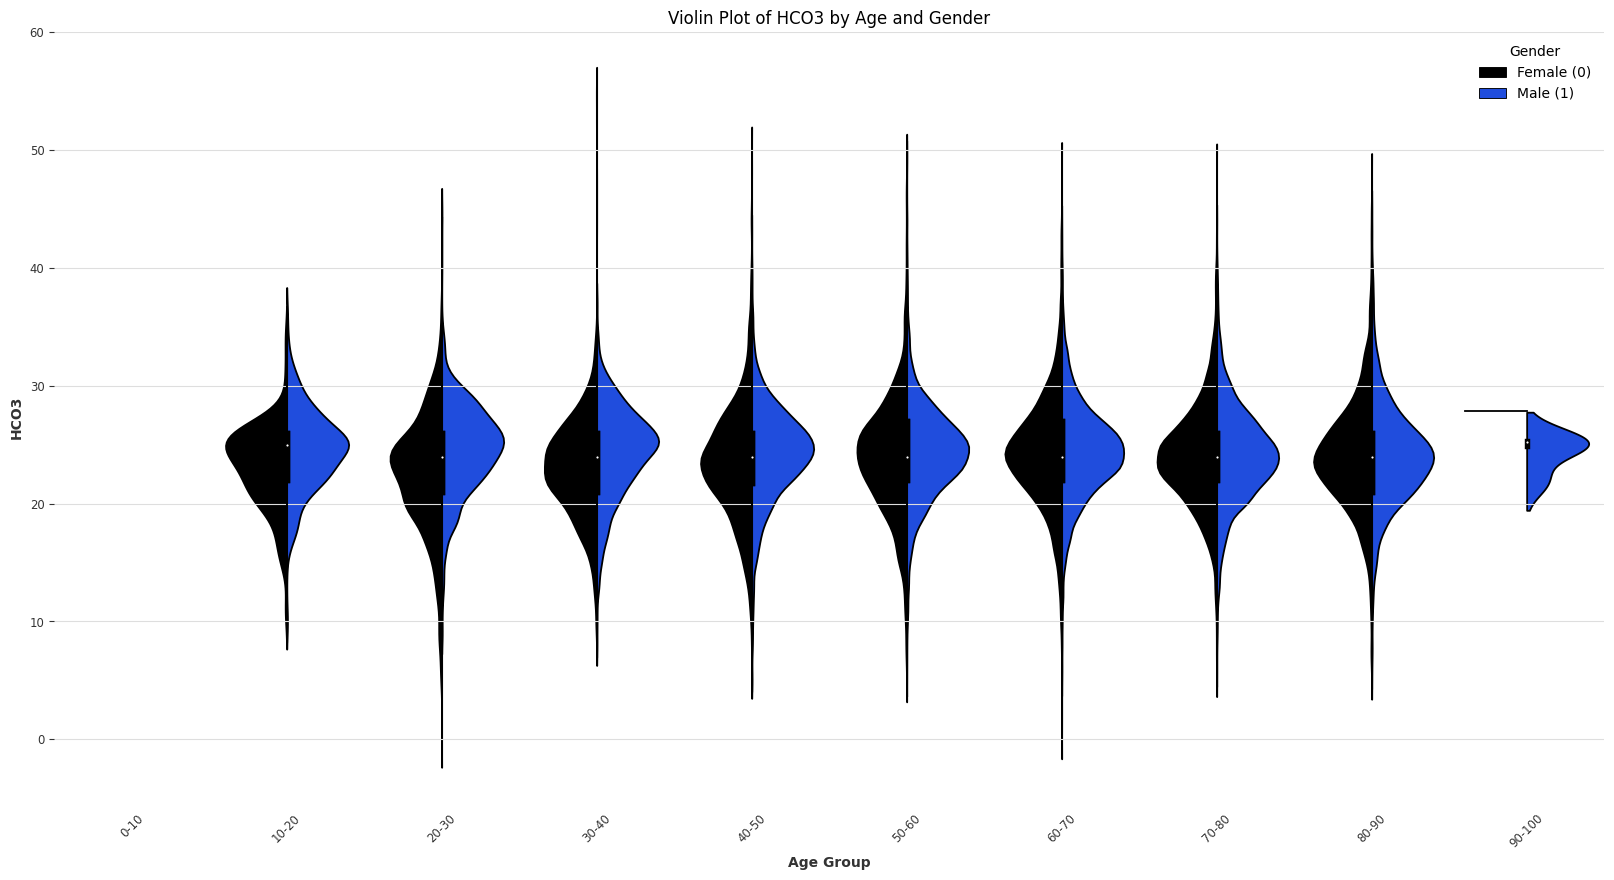

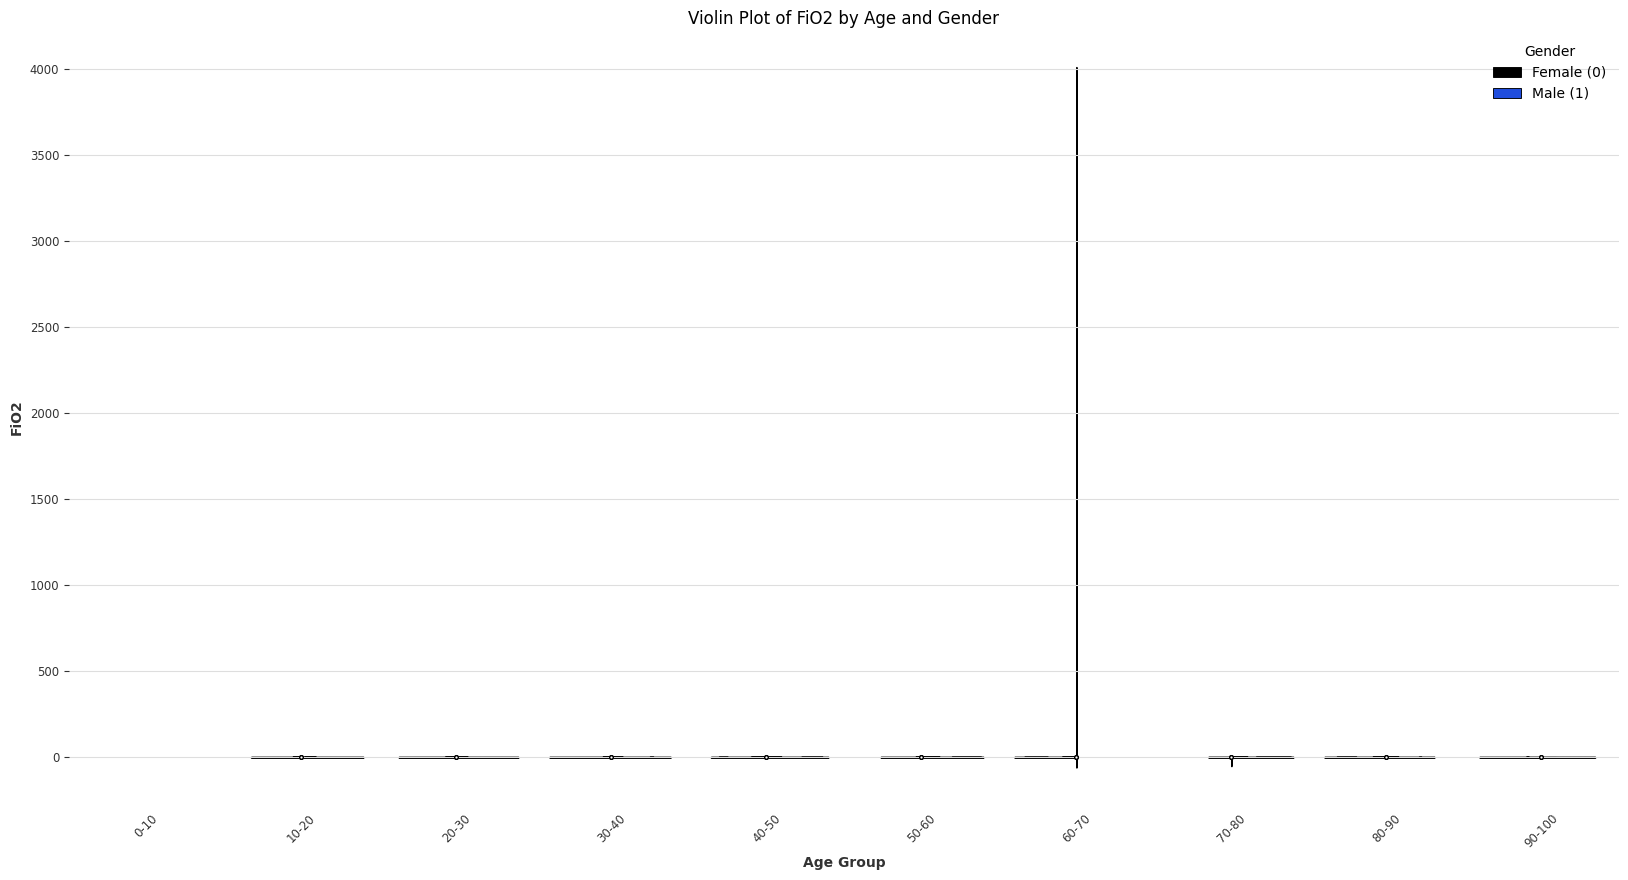

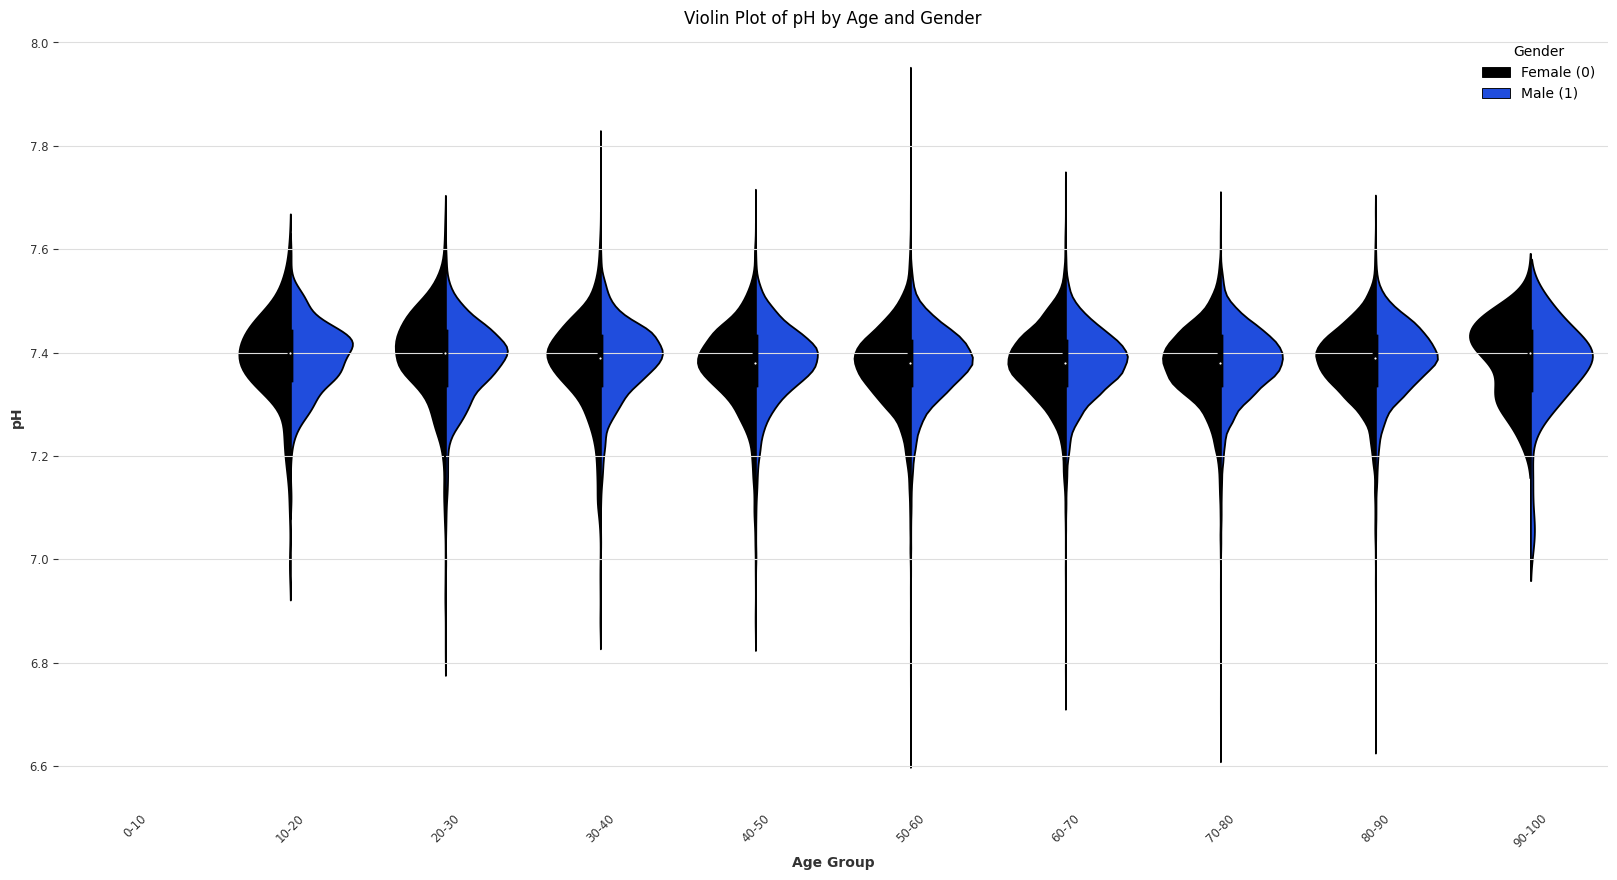

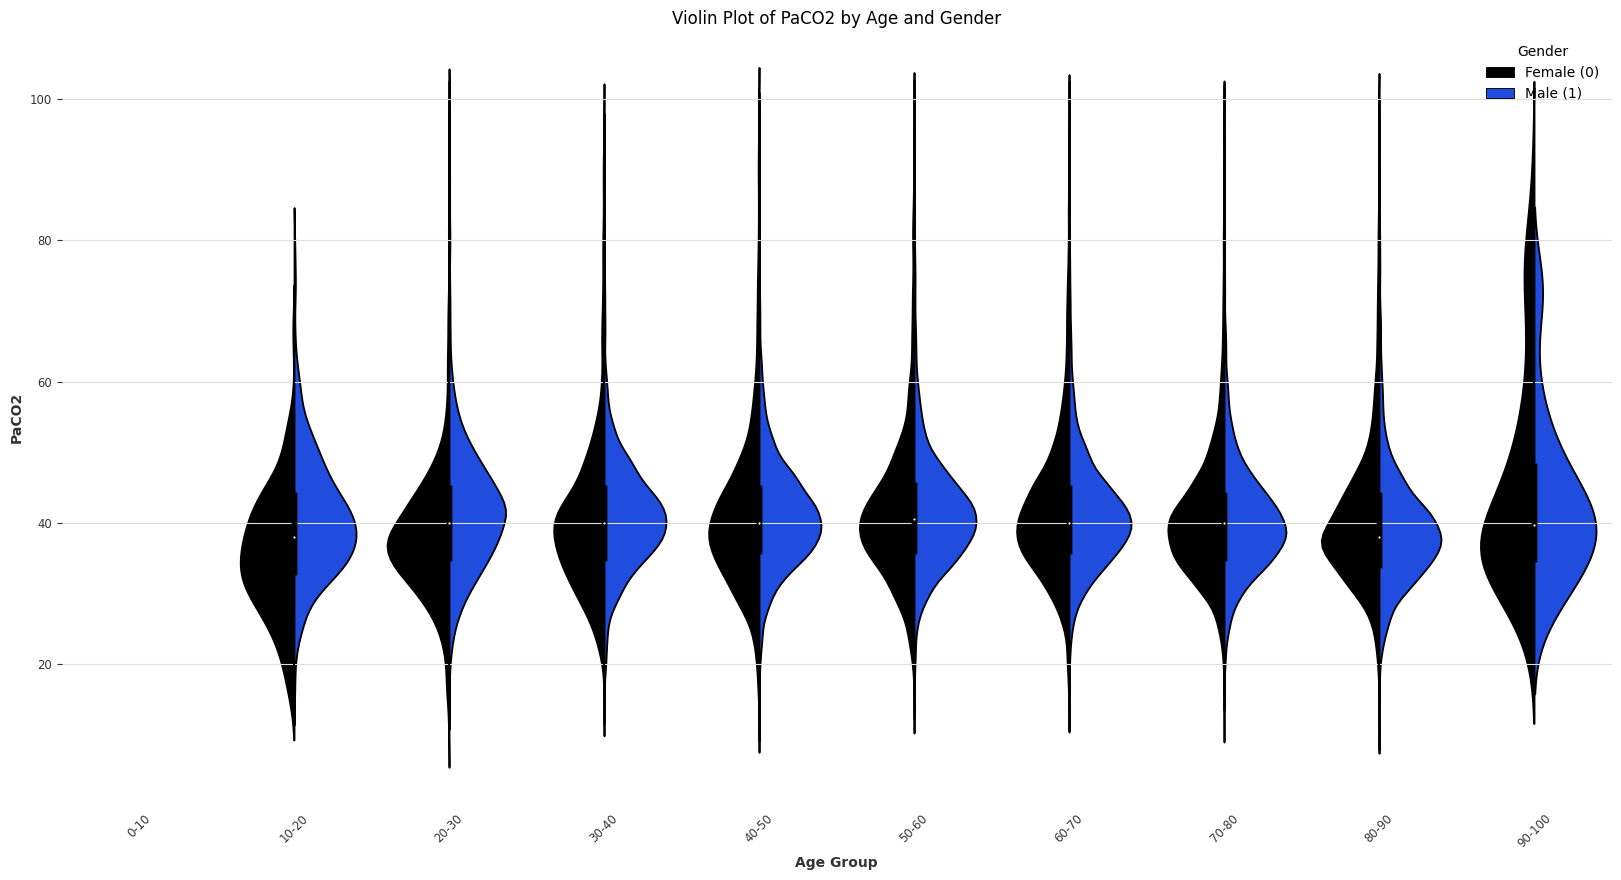

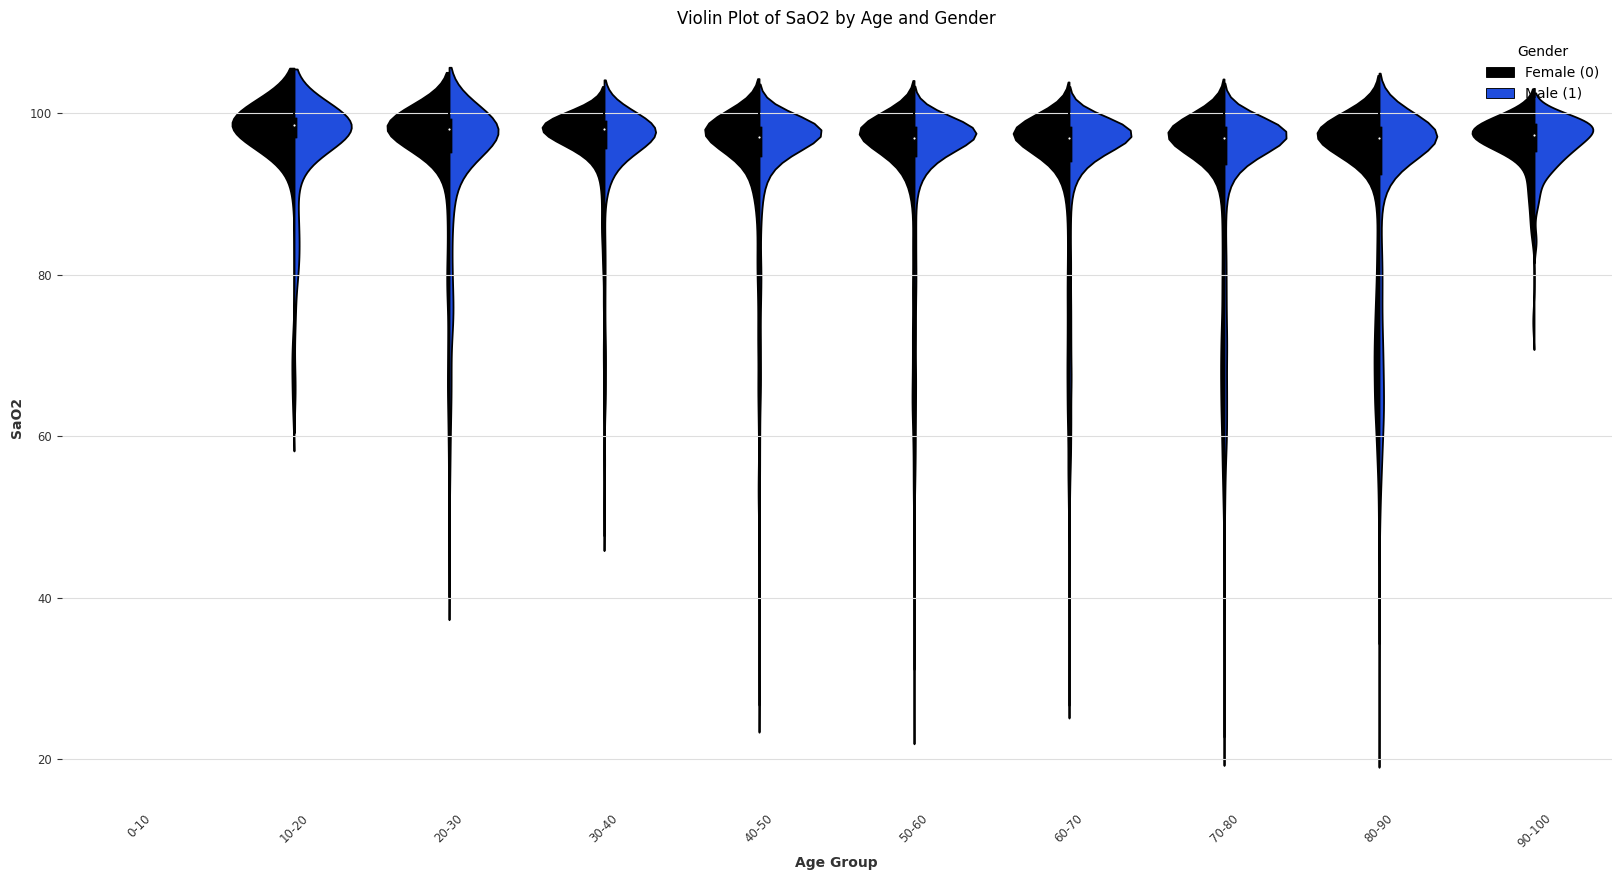

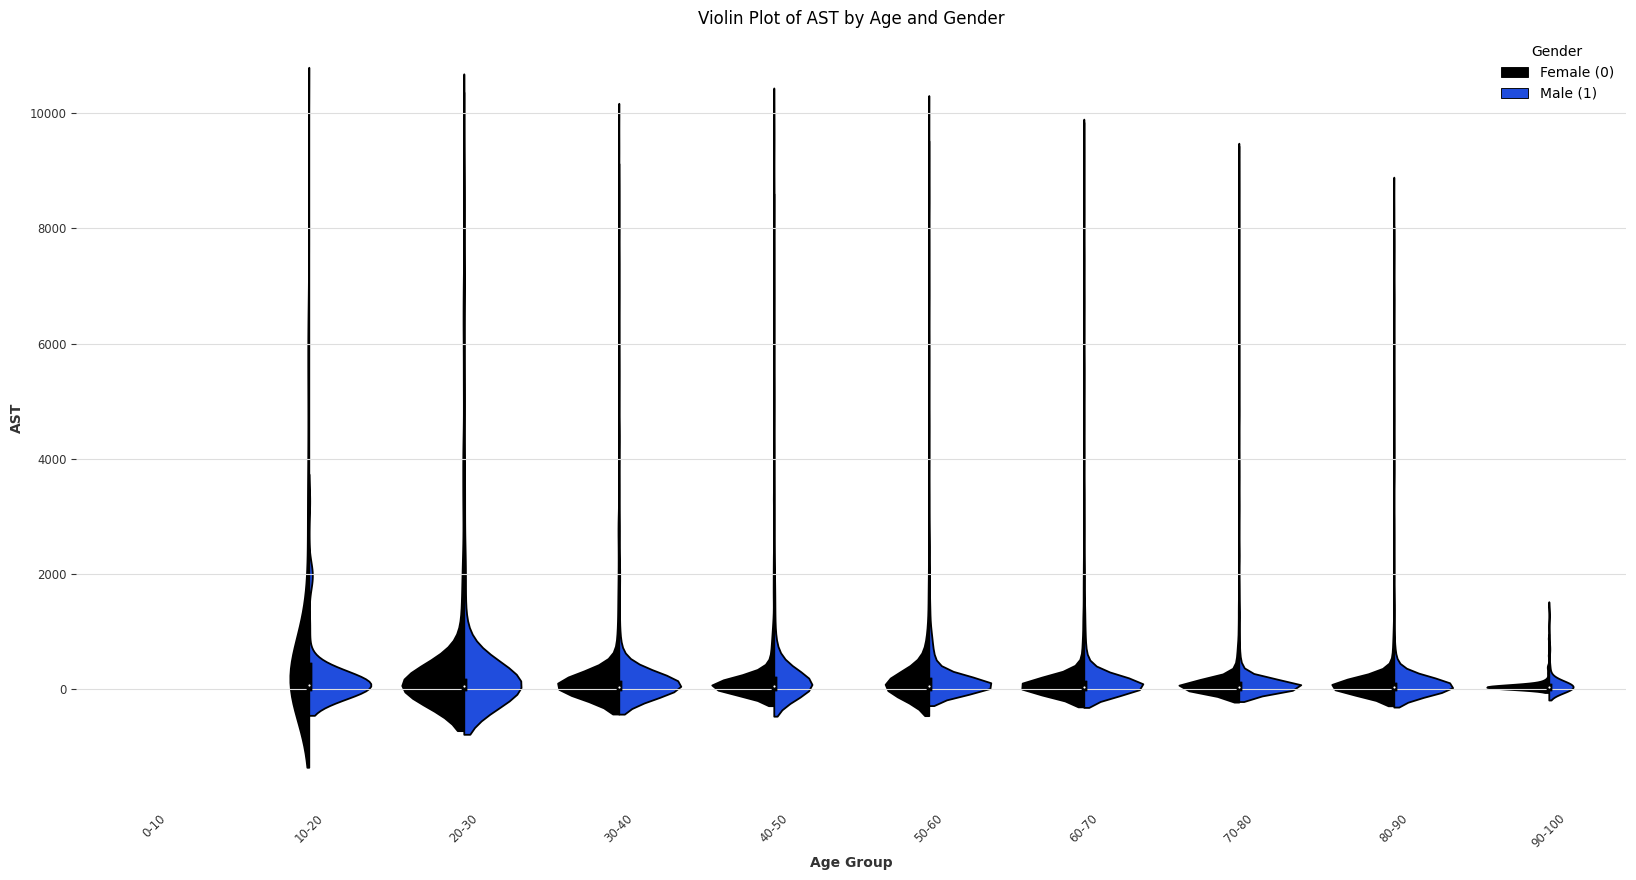

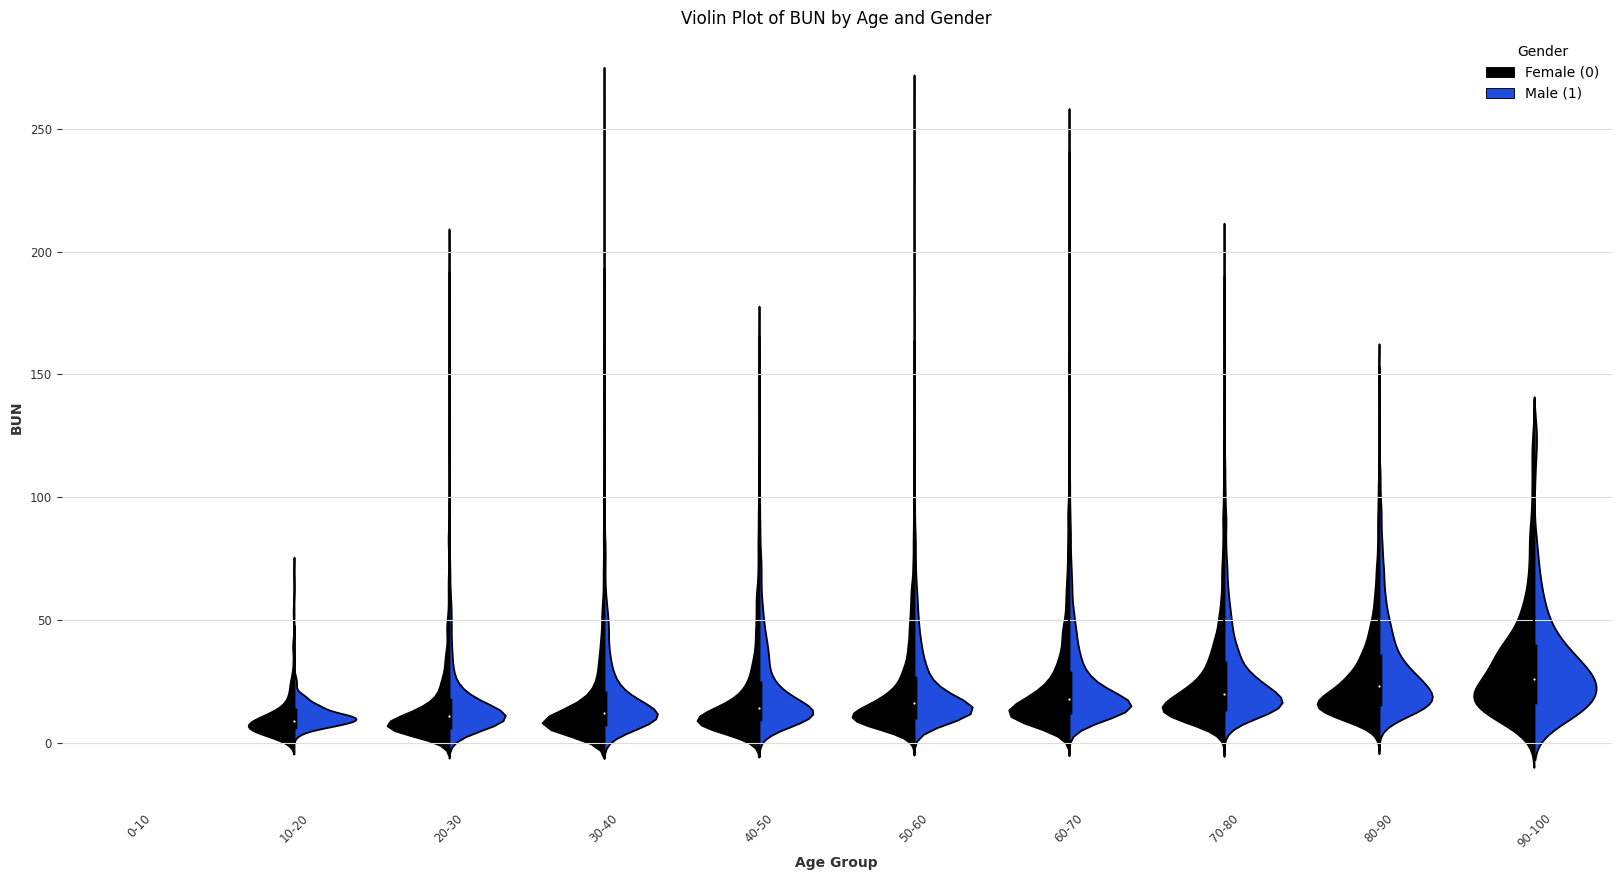

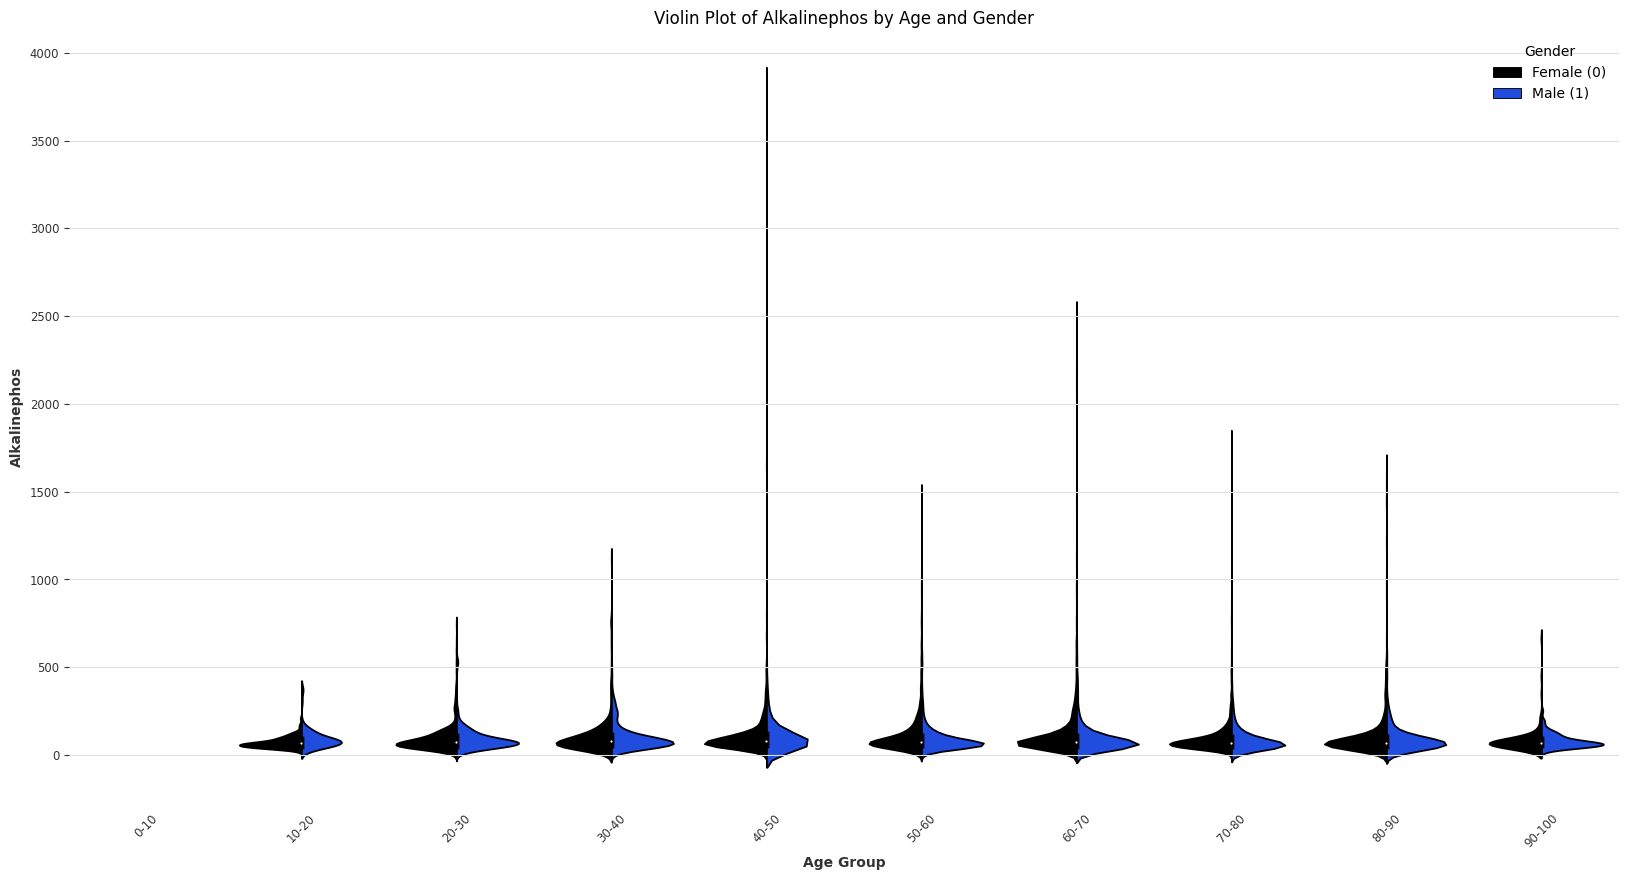

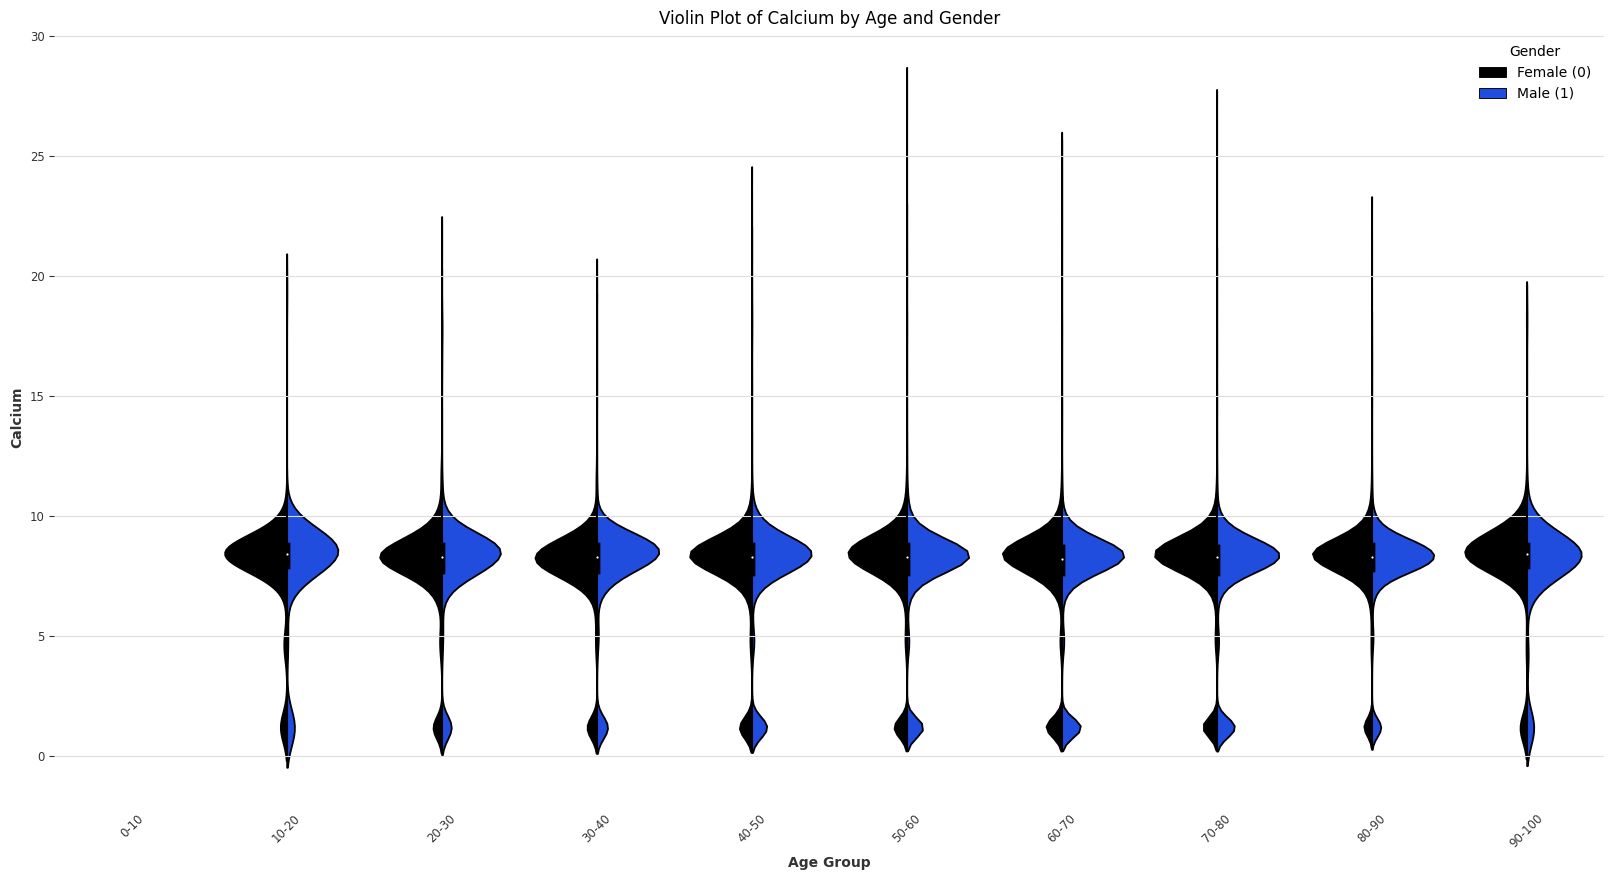

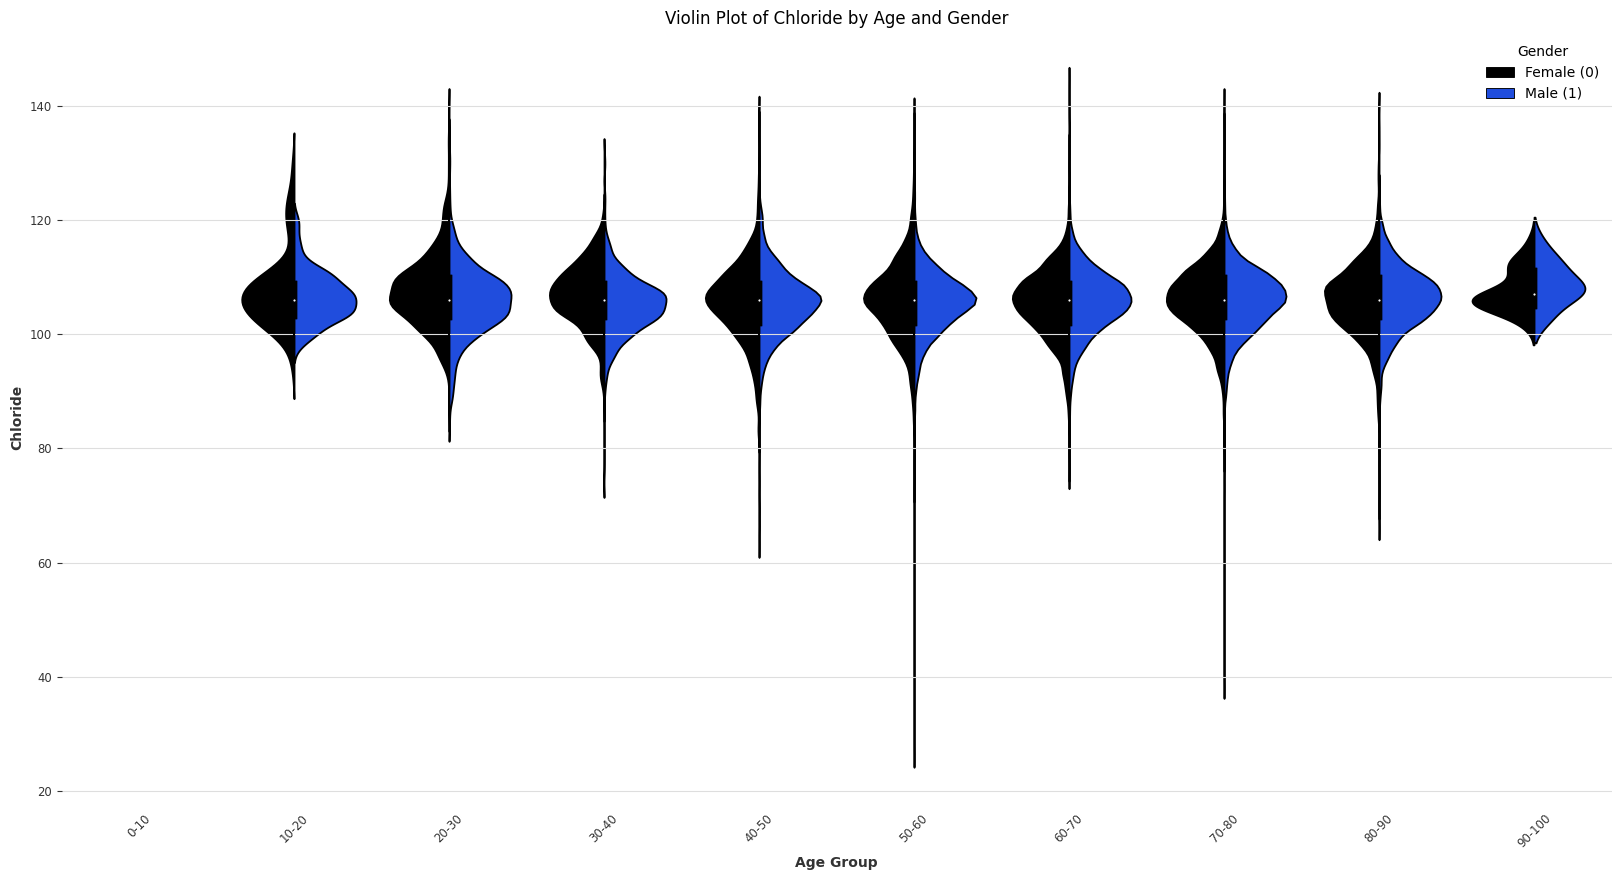

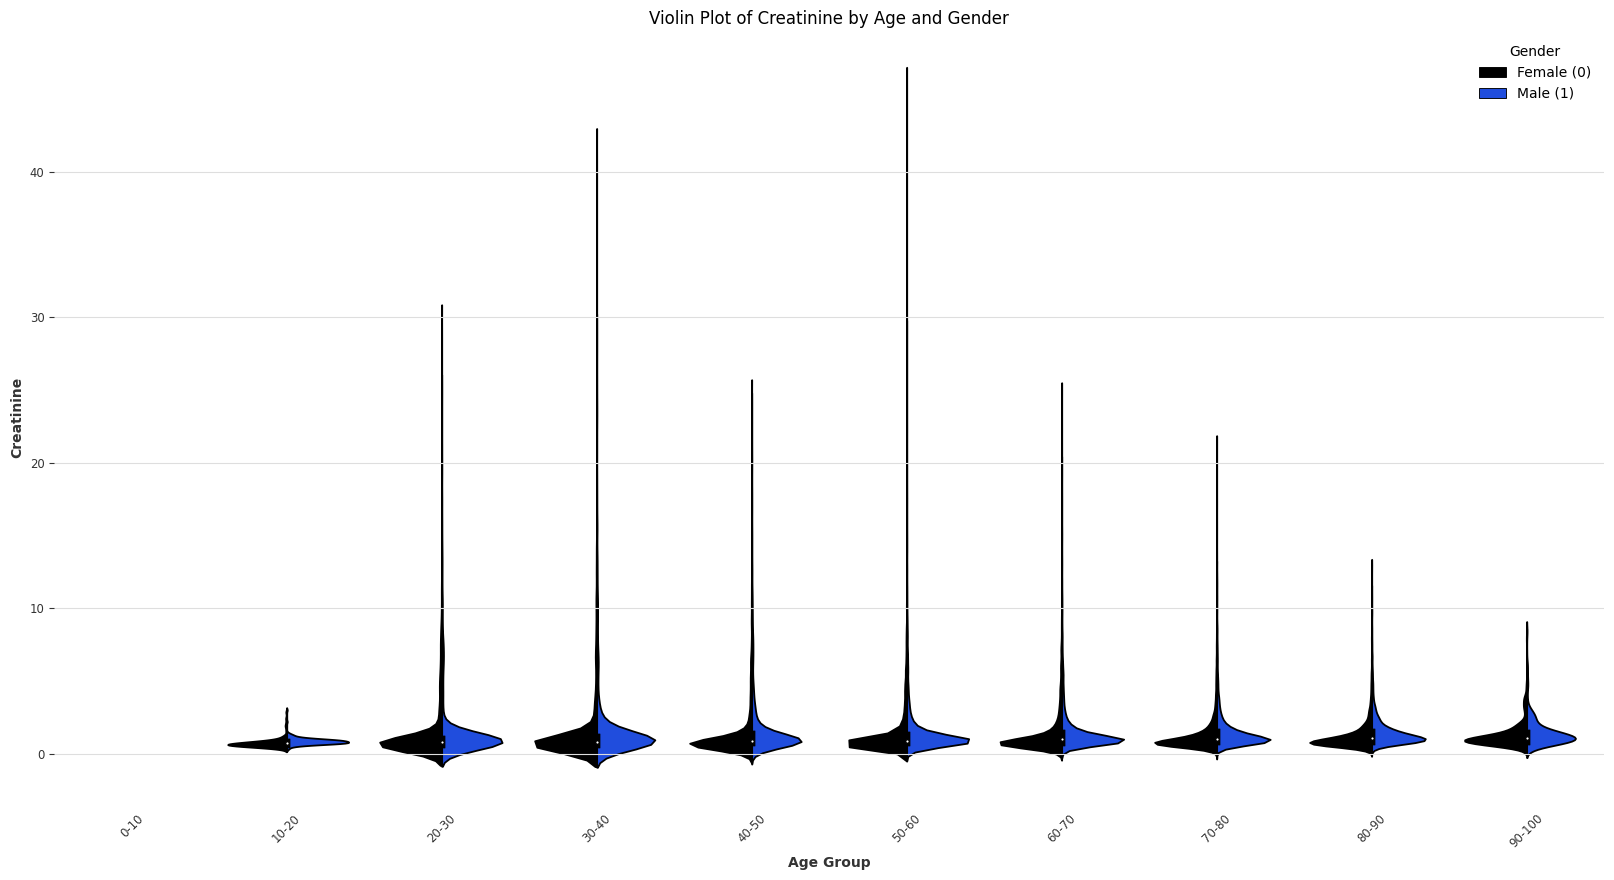

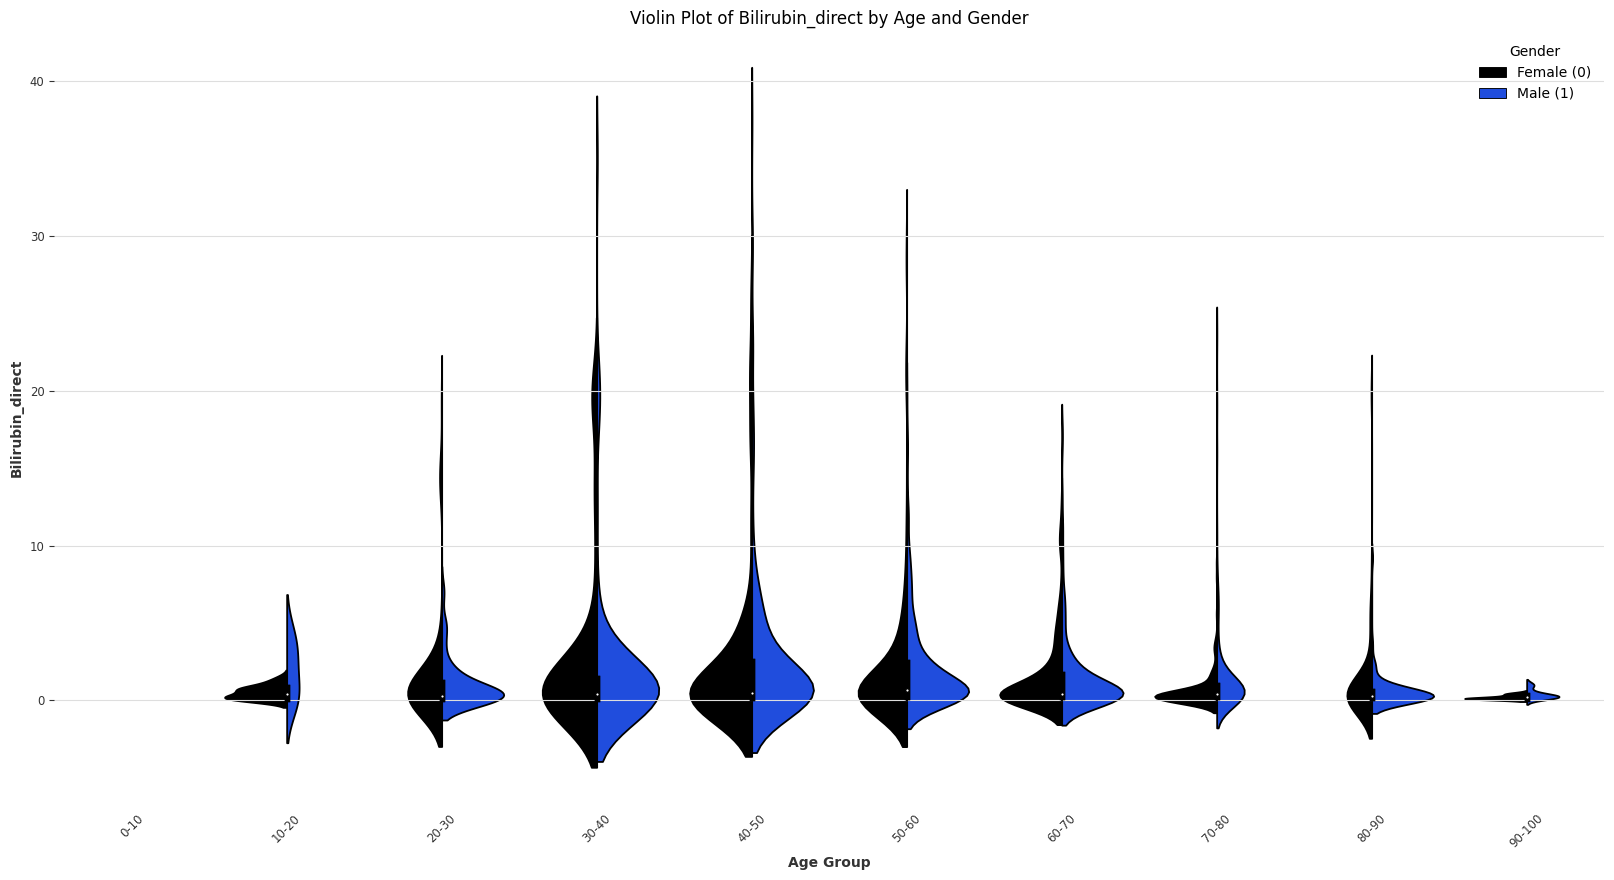

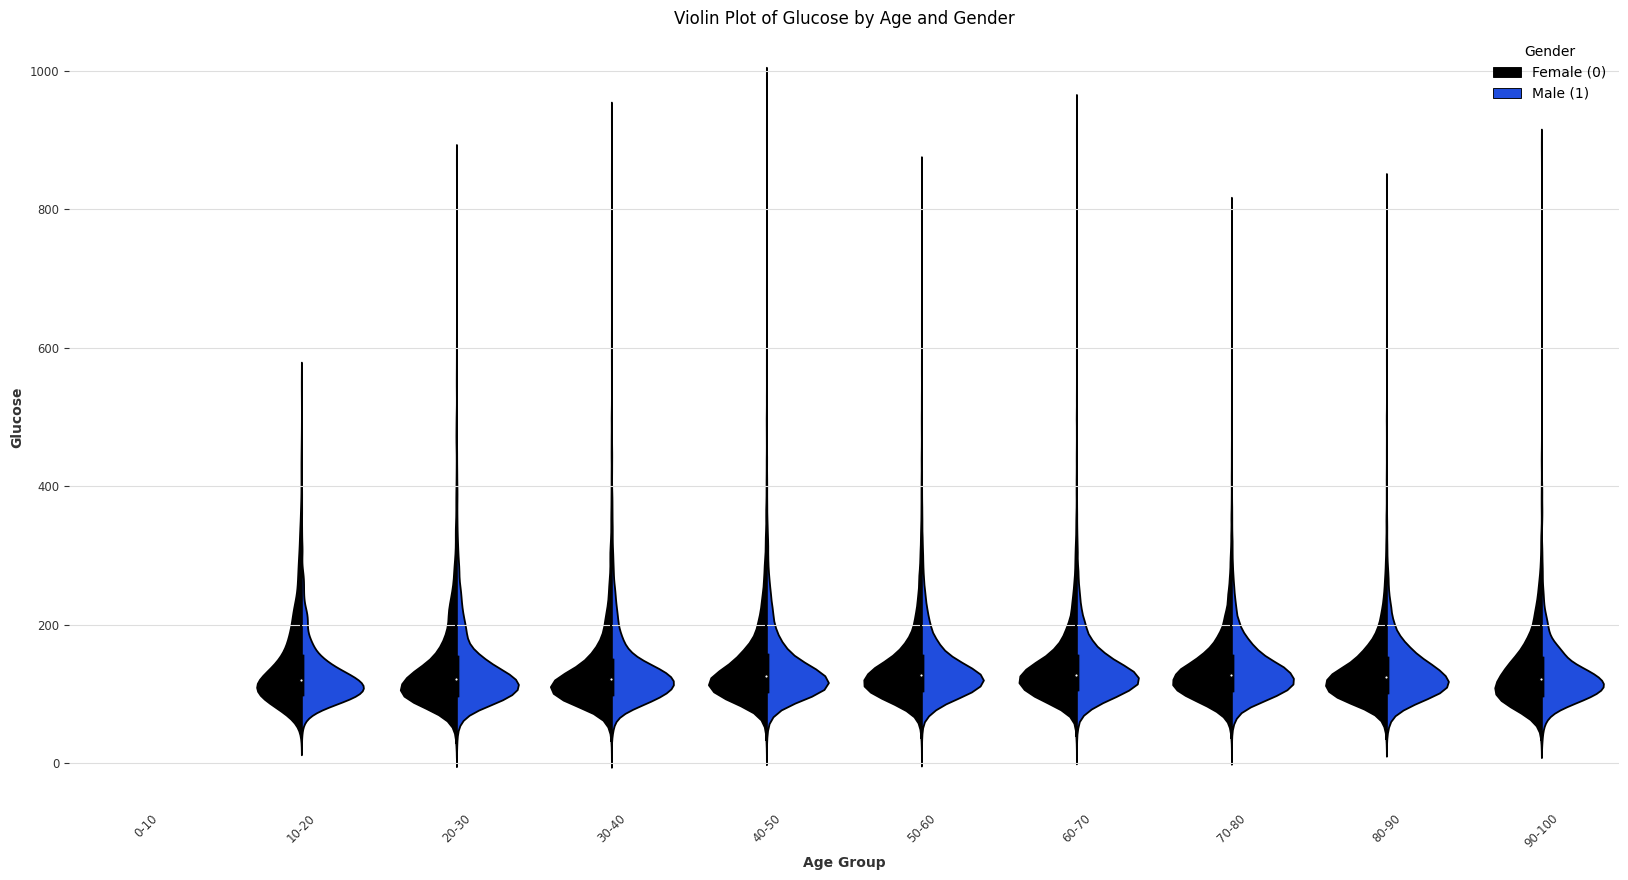

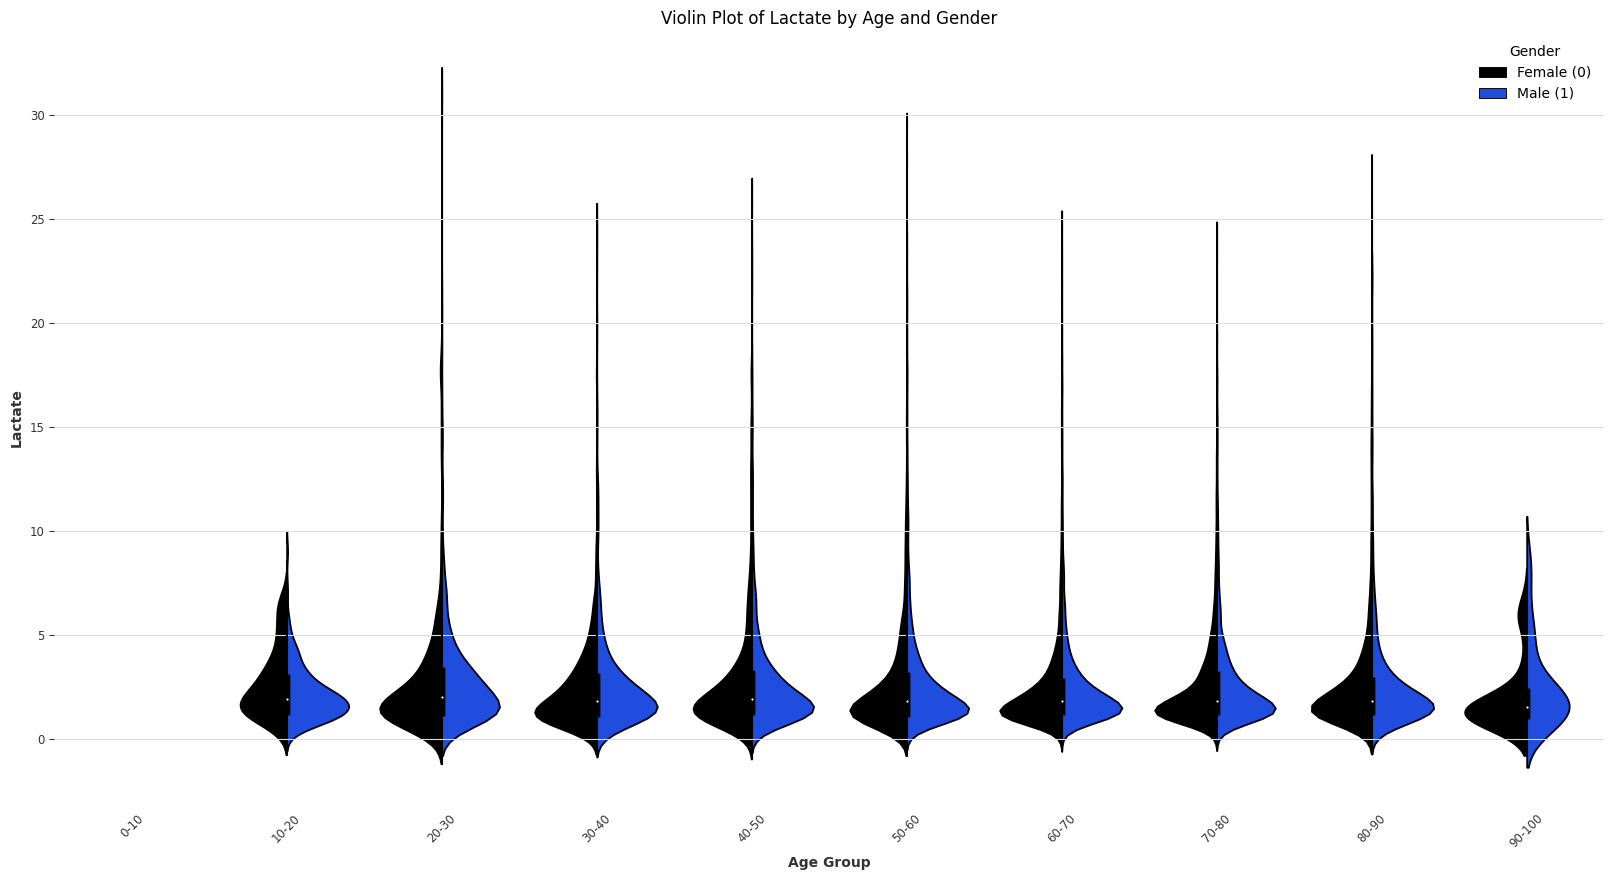

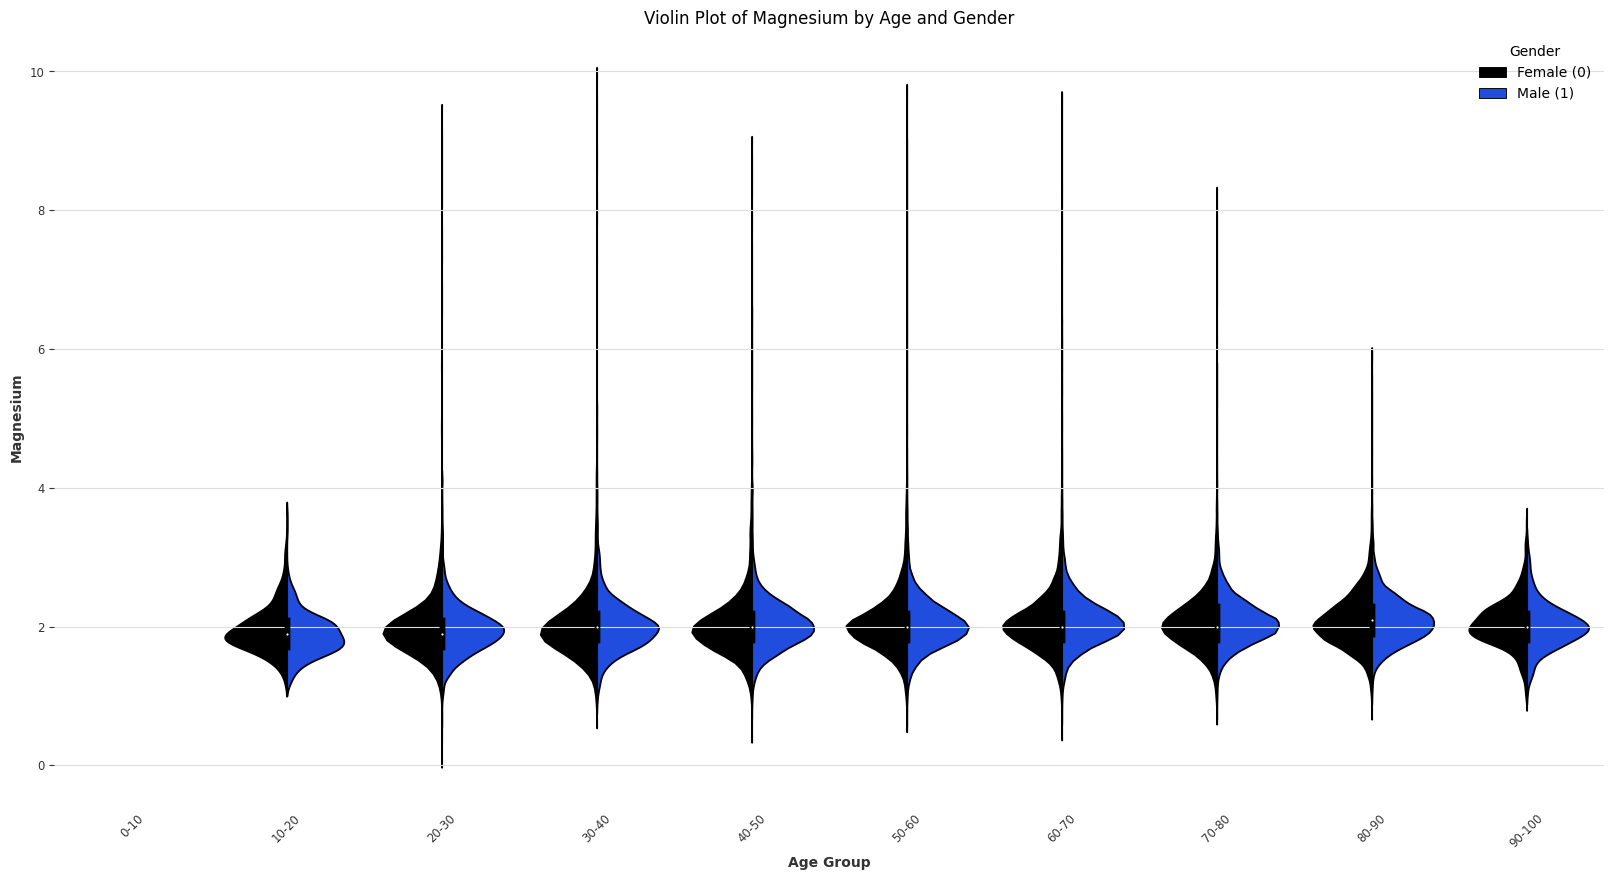

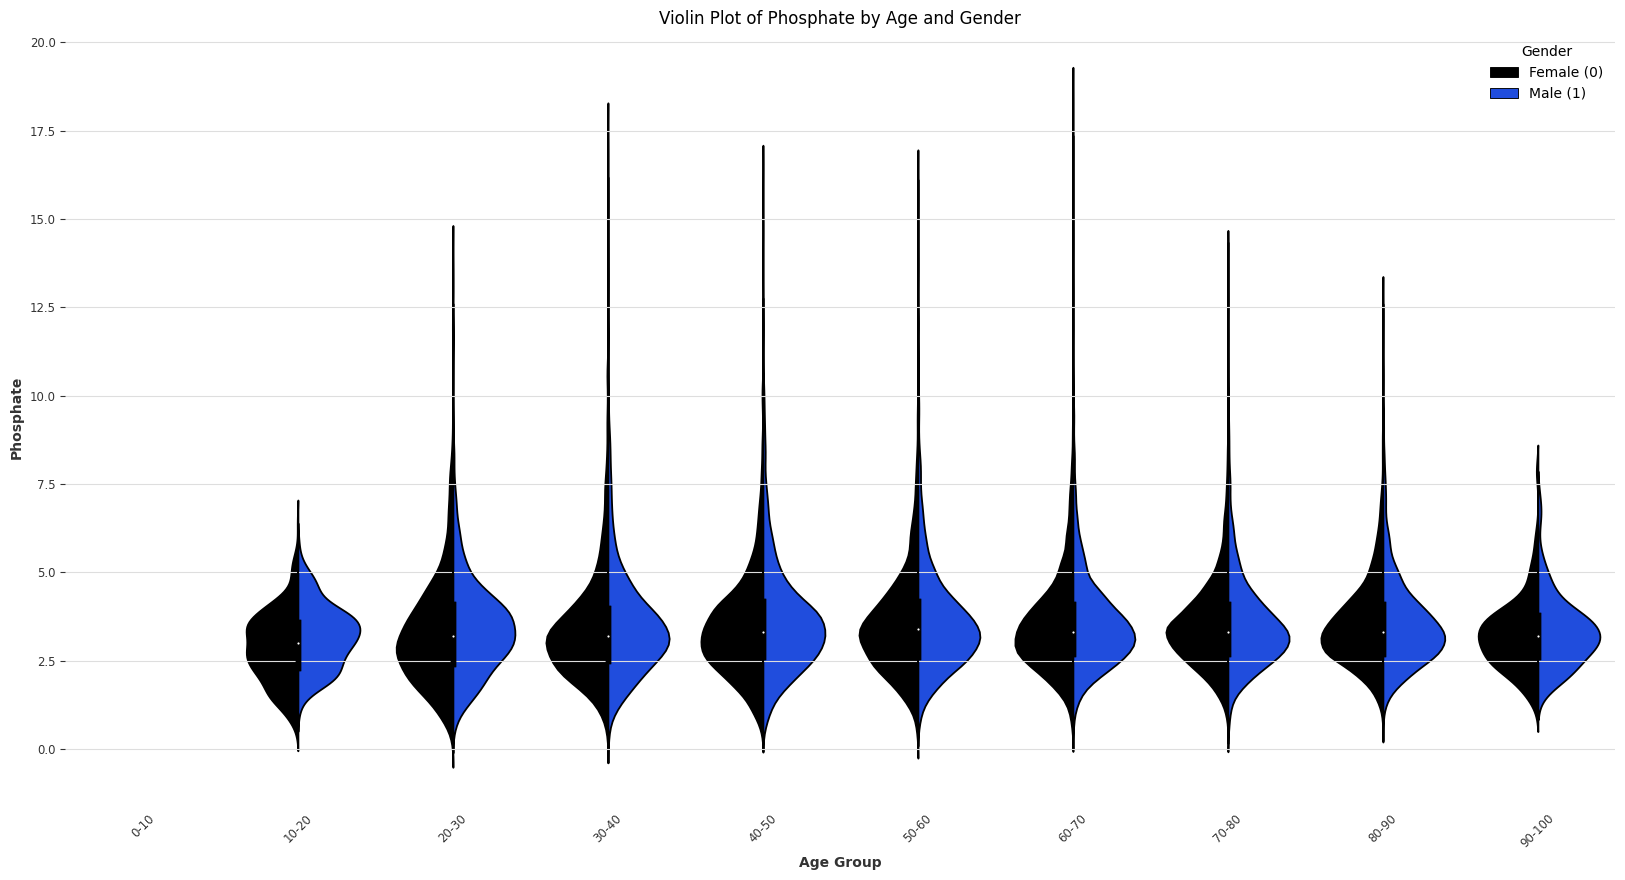

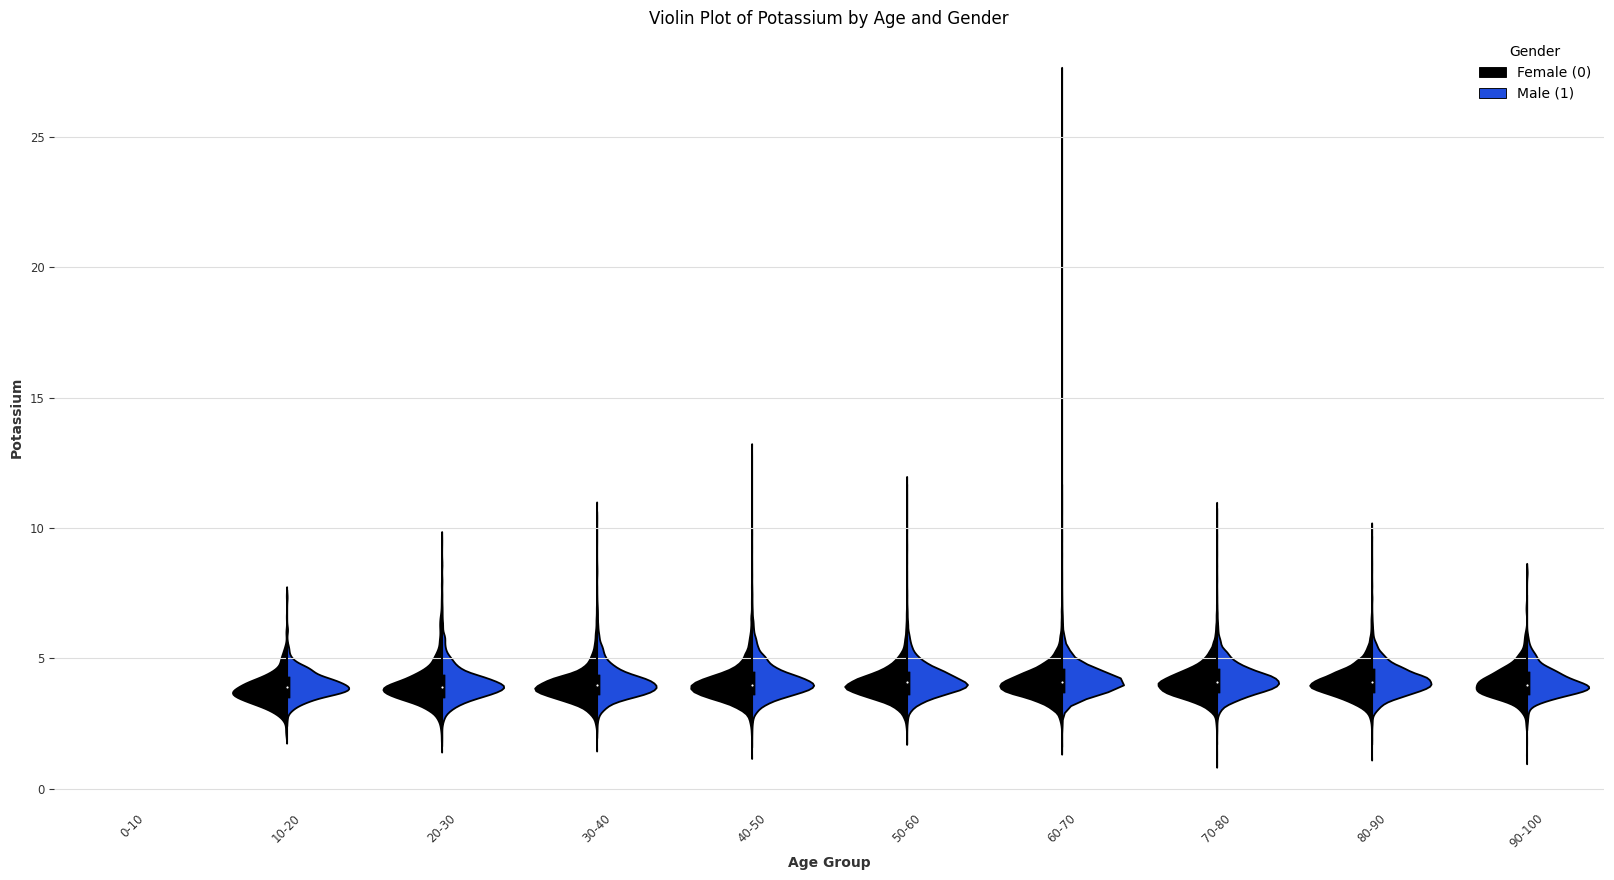

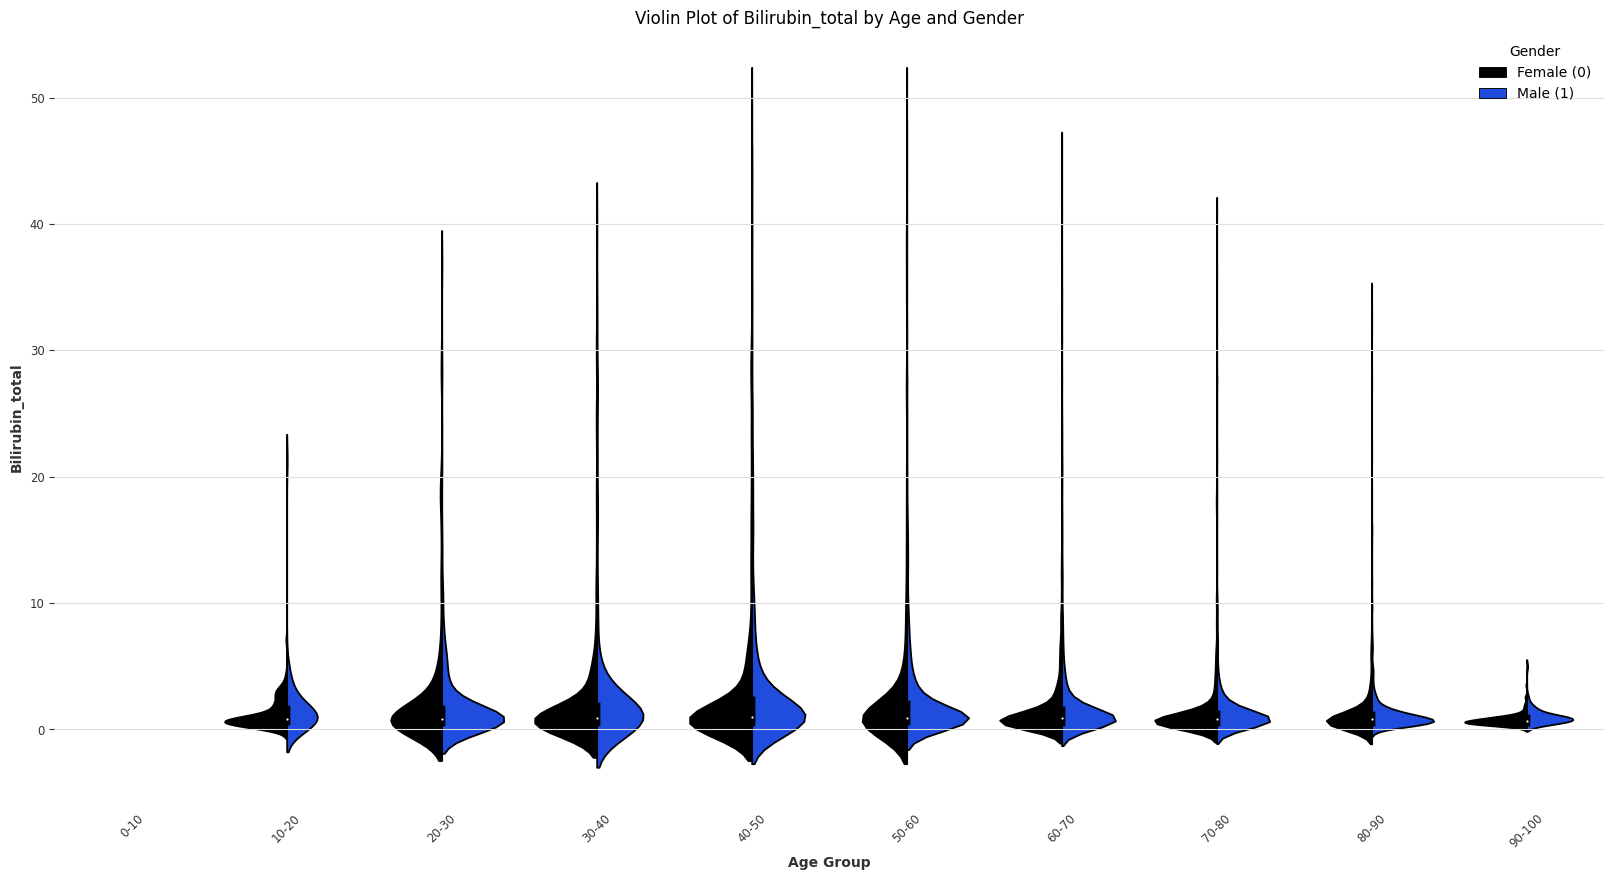

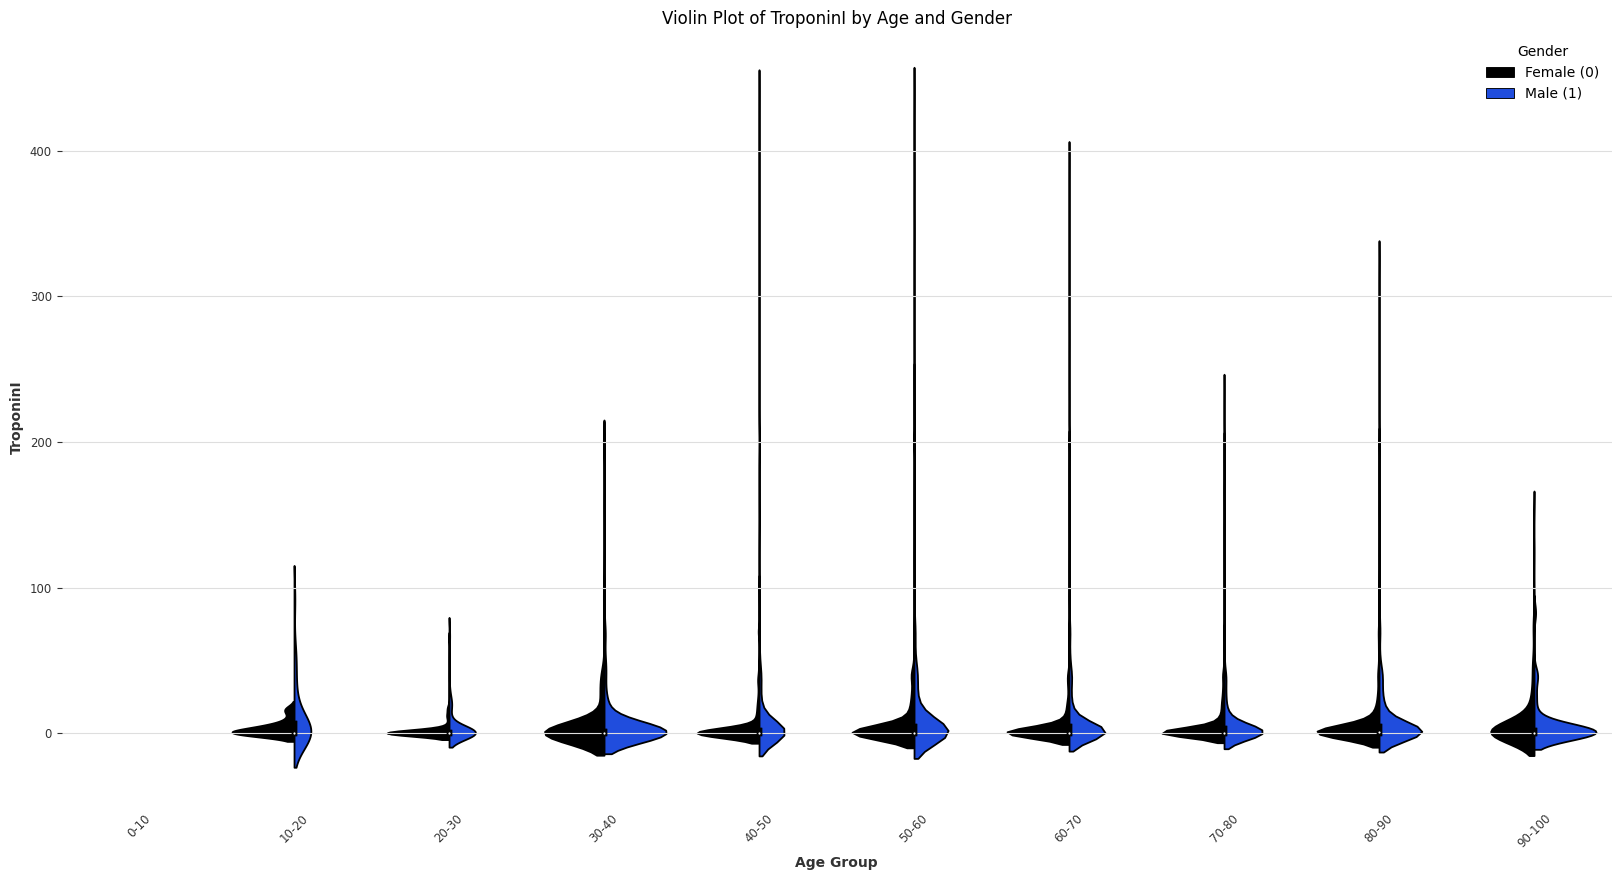

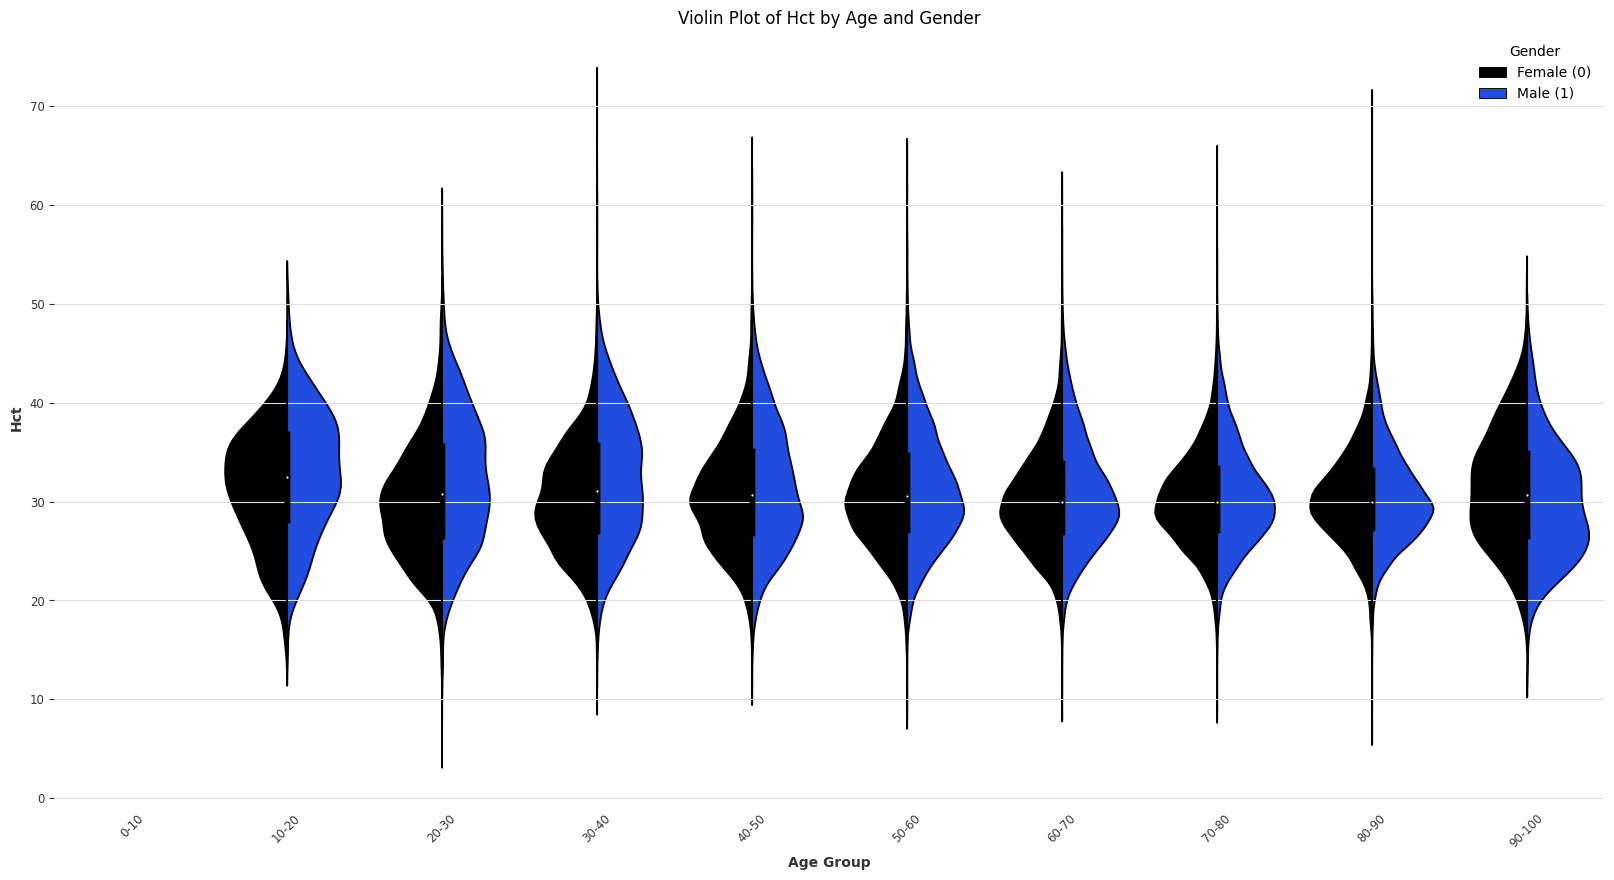

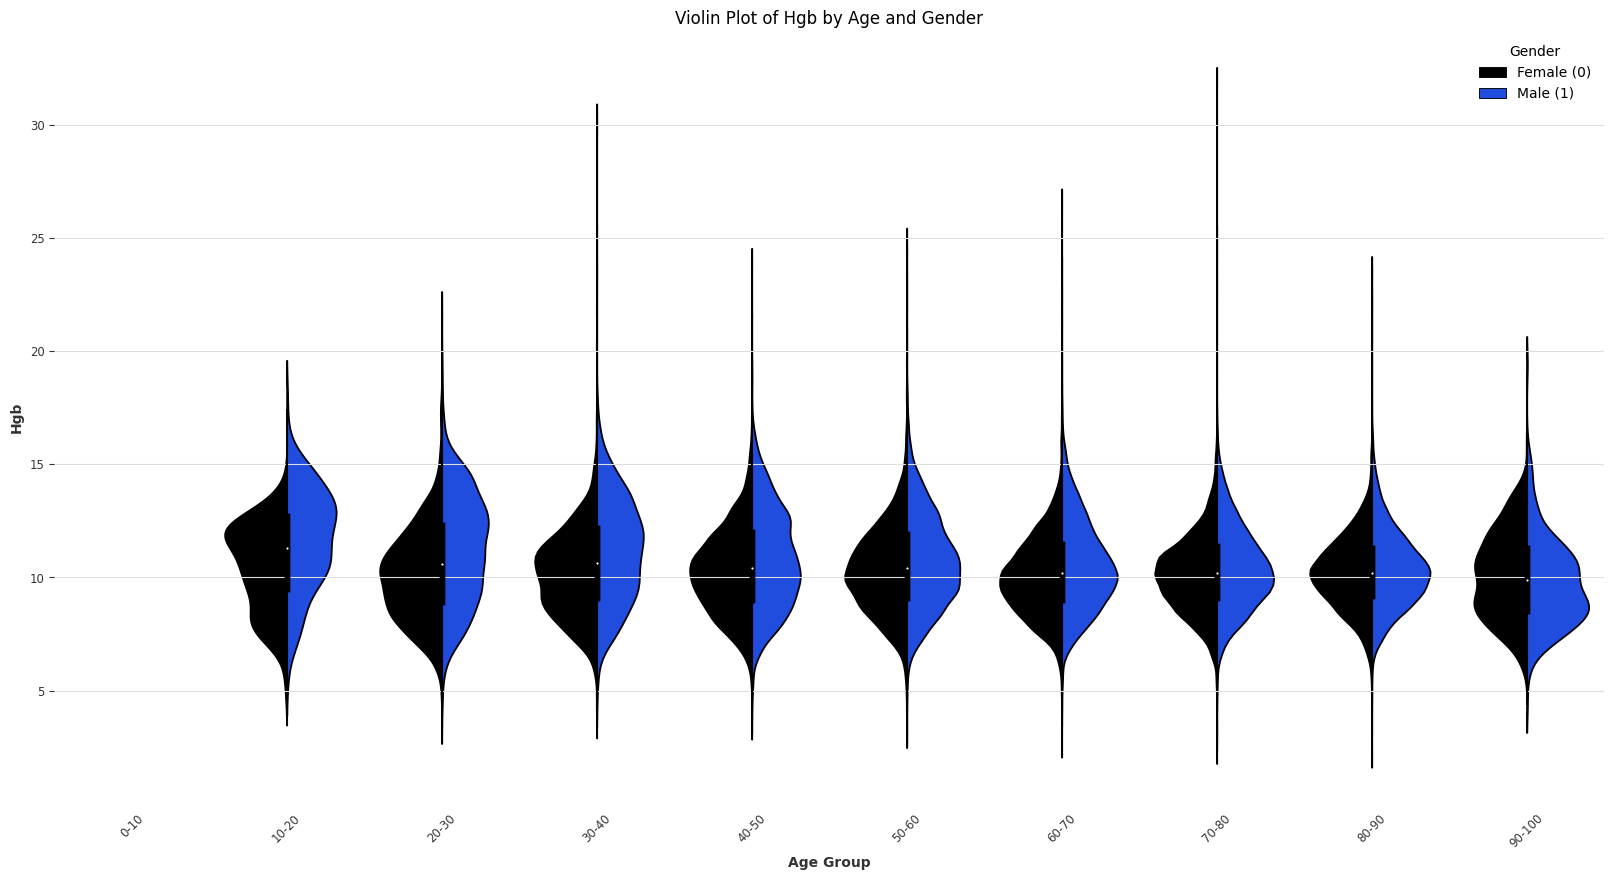

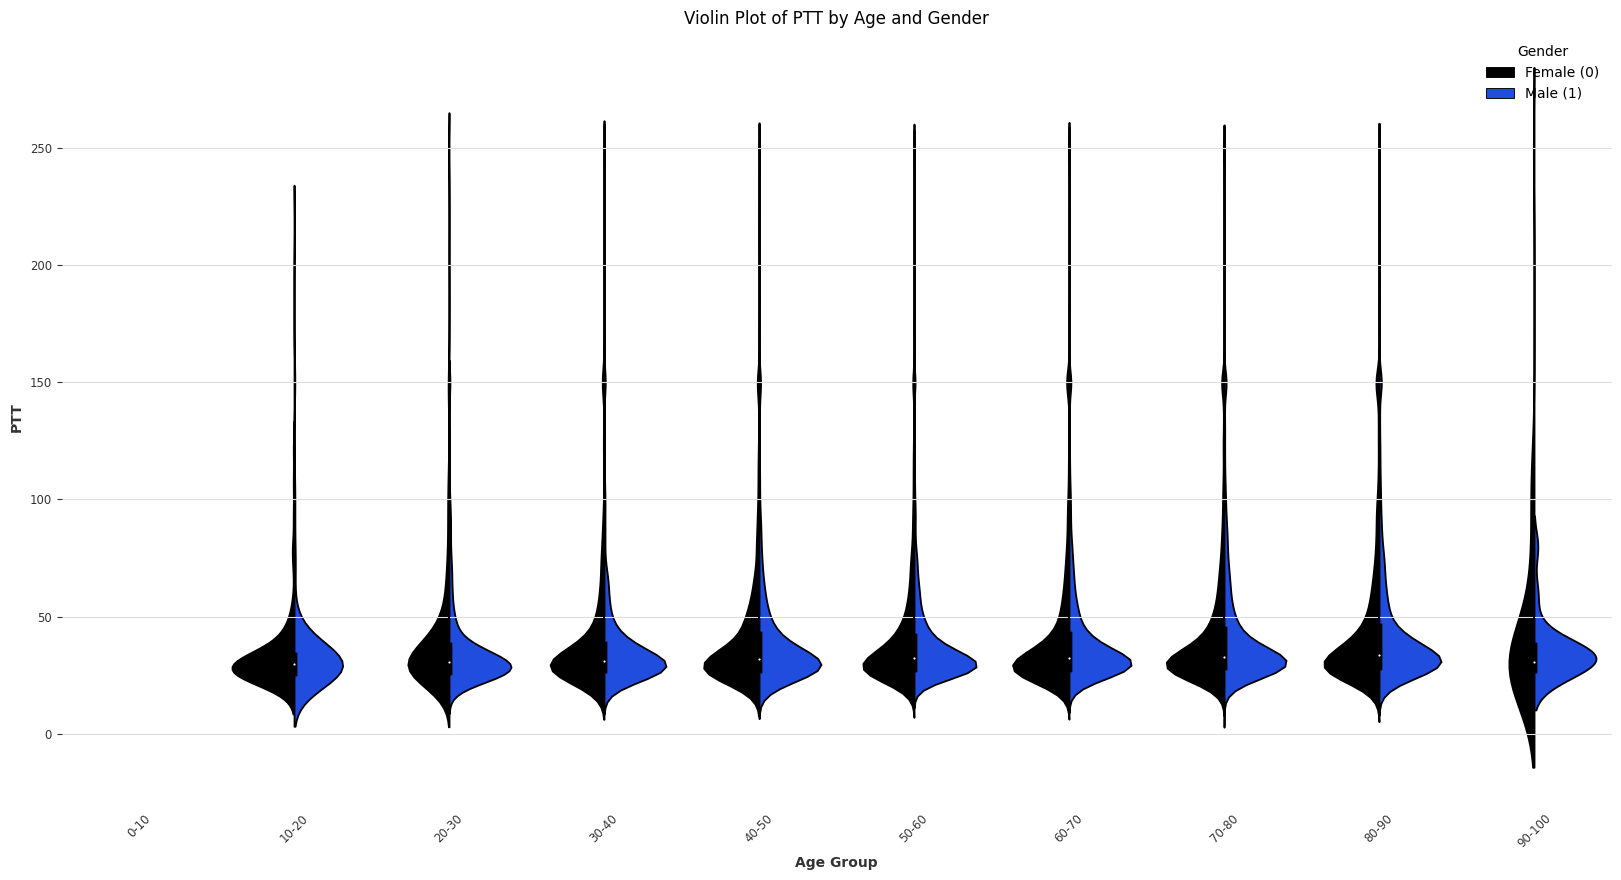

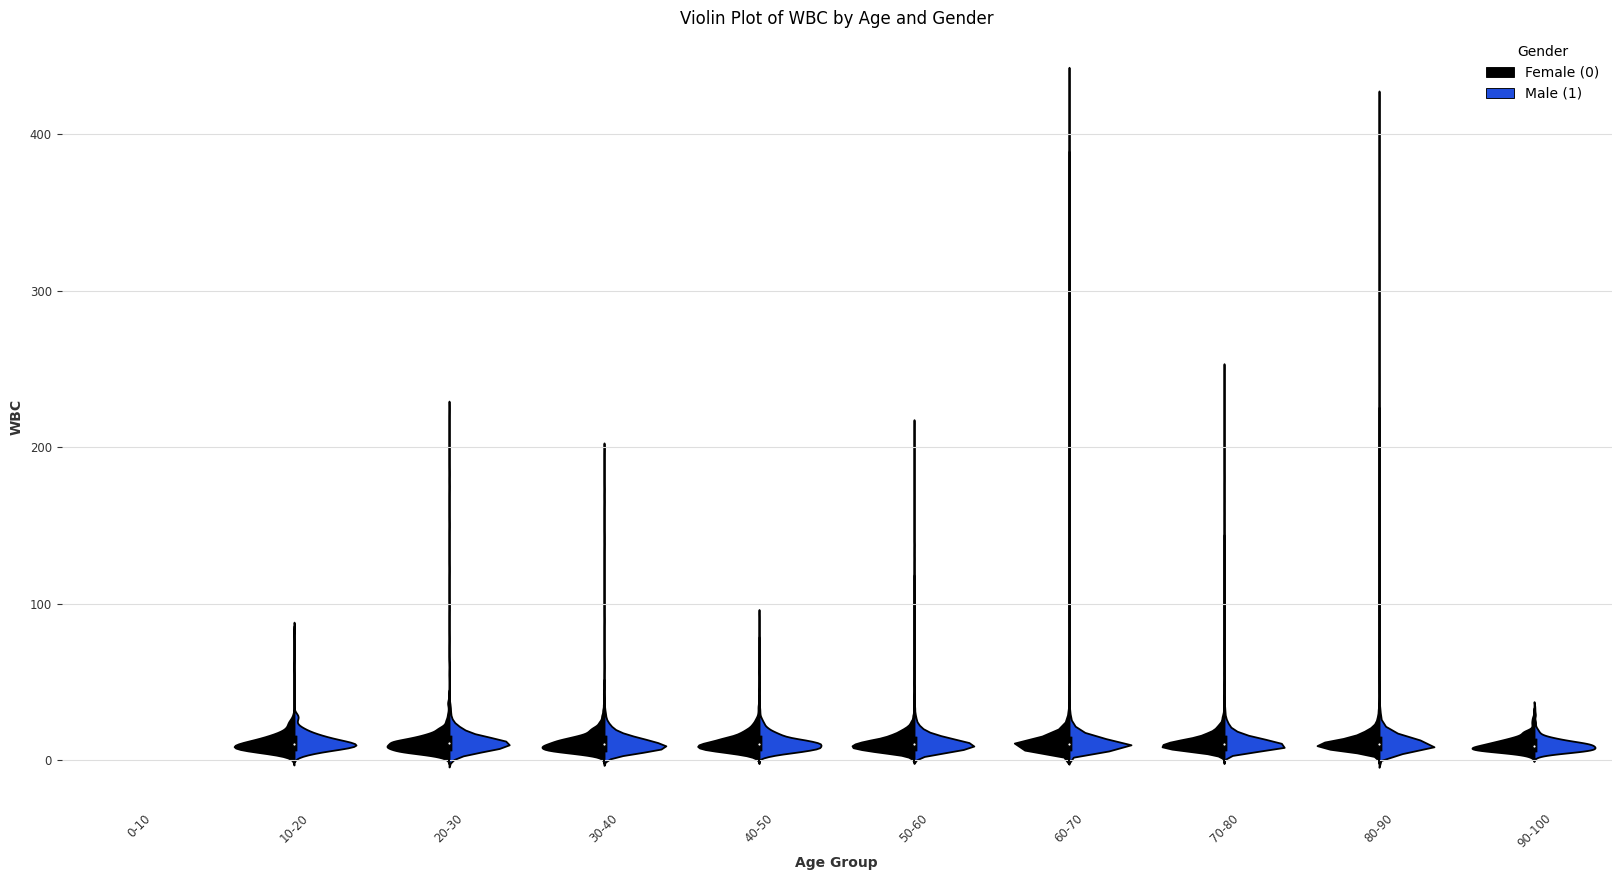

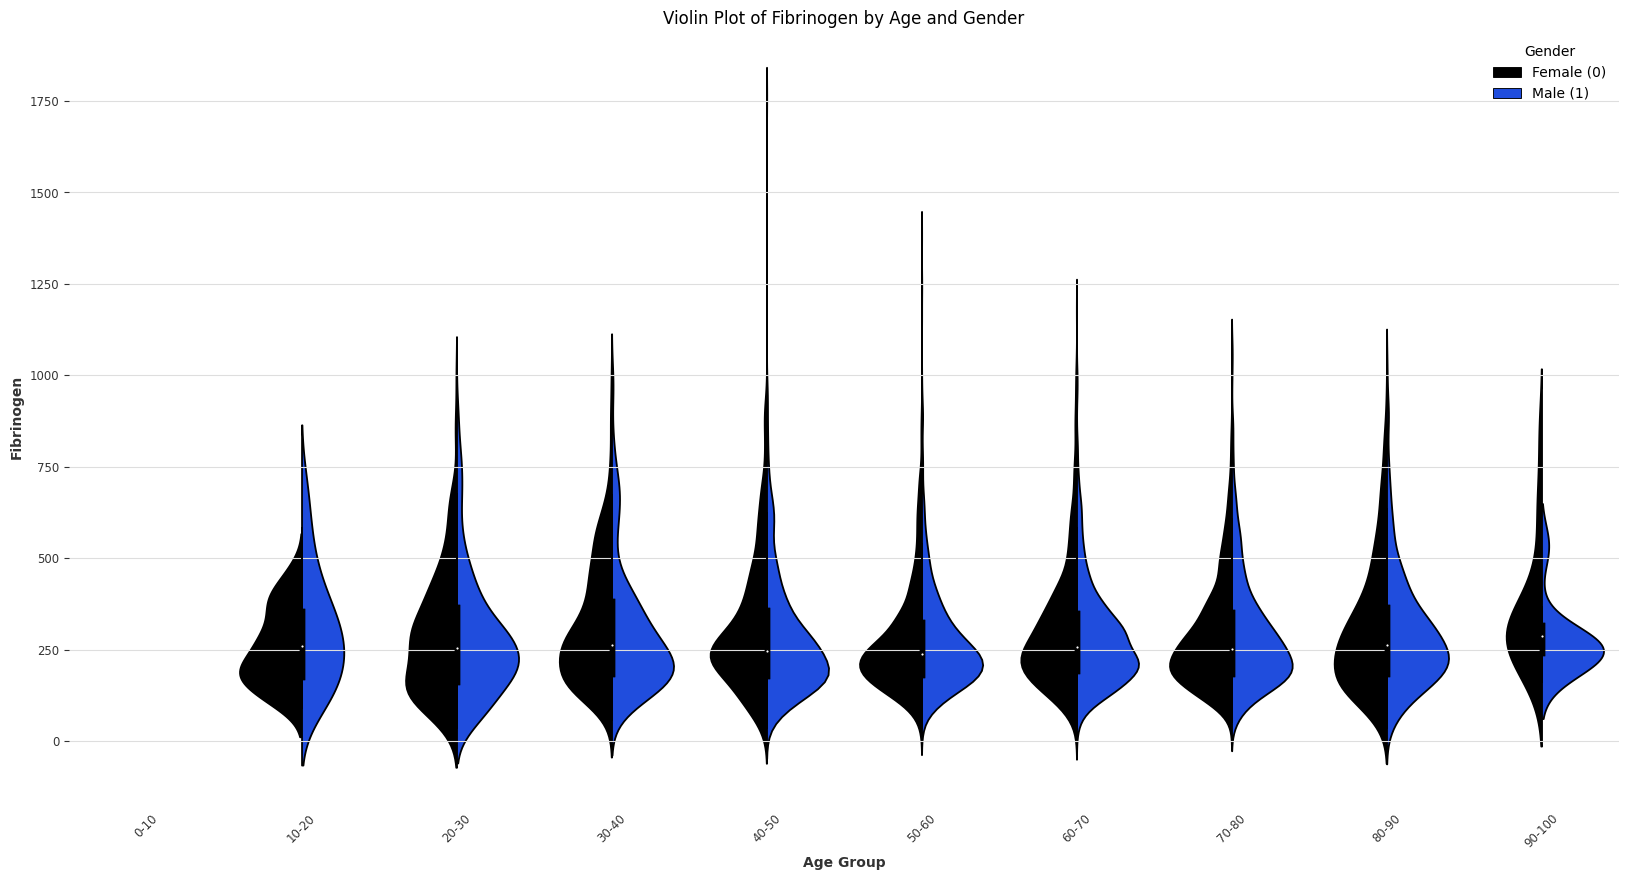

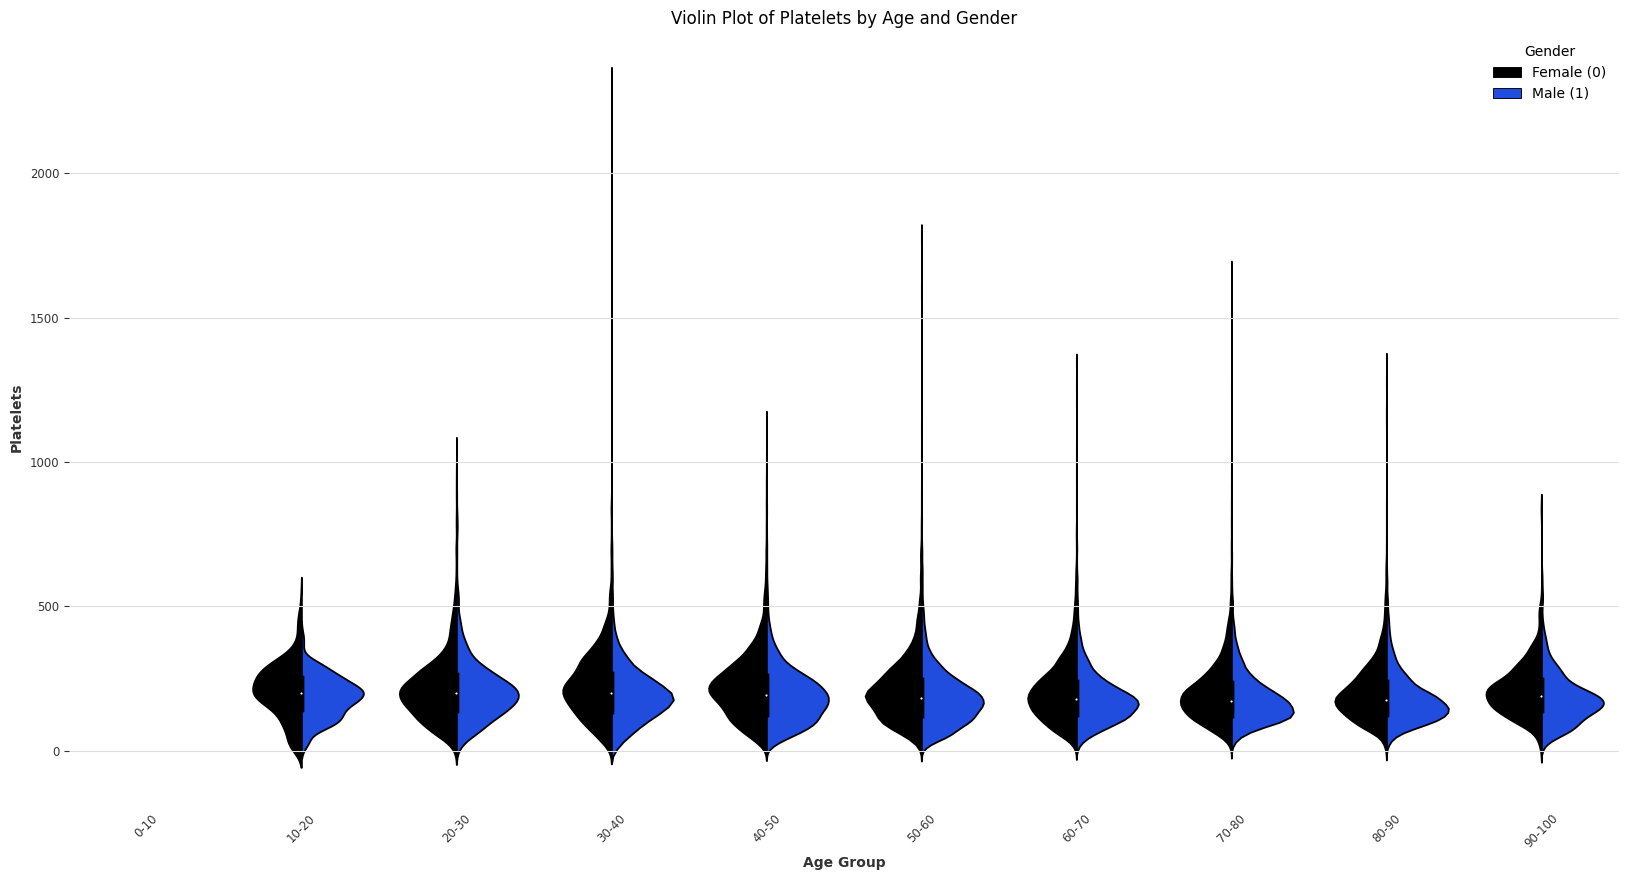

<Figure size 2000x1000 with 0 Axes>

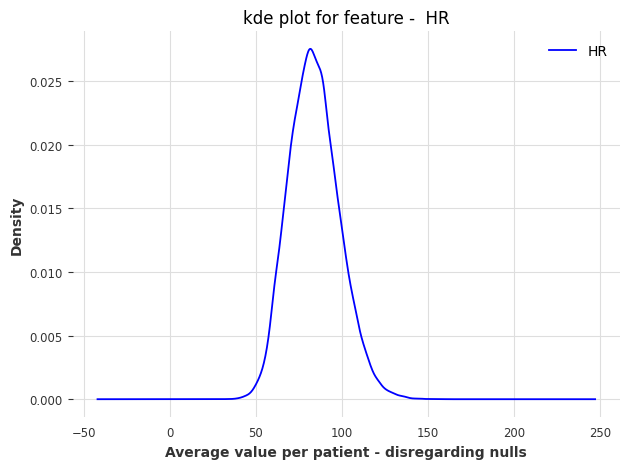

<Figure size 2000x1000 with 0 Axes>

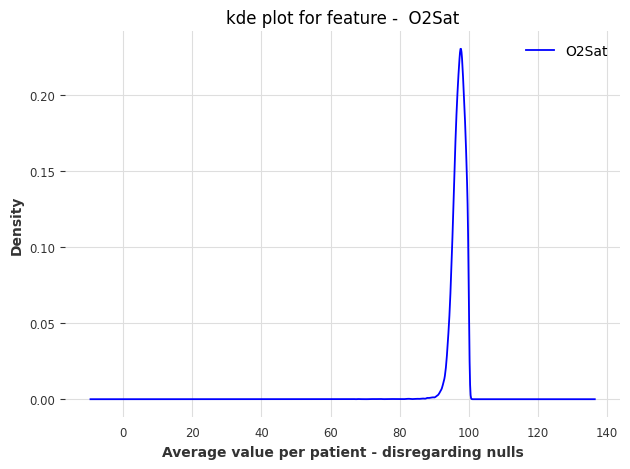

<Figure size 2000x1000 with 0 Axes>

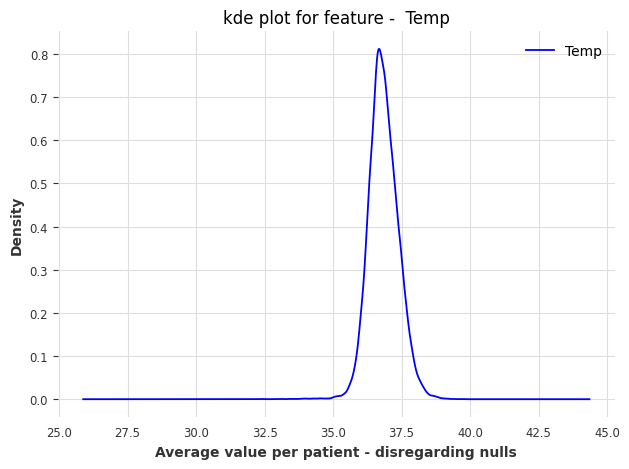

<Figure size 2000x1000 with 0 Axes>

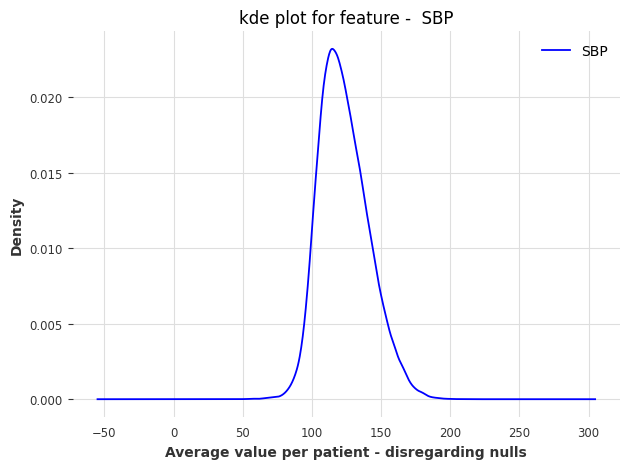

<Figure size 2000x1000 with 0 Axes>

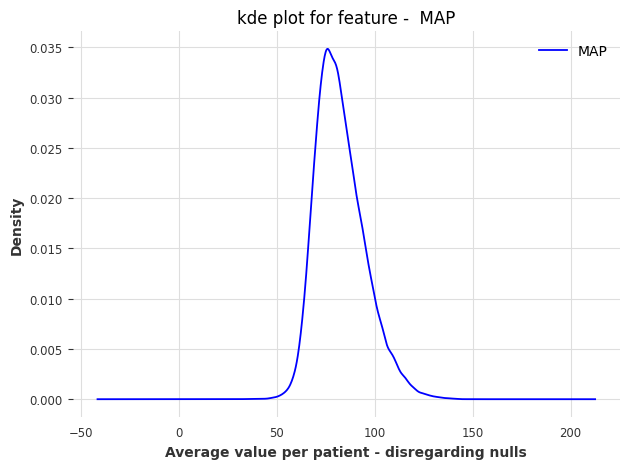

<Figure size 2000x1000 with 0 Axes>

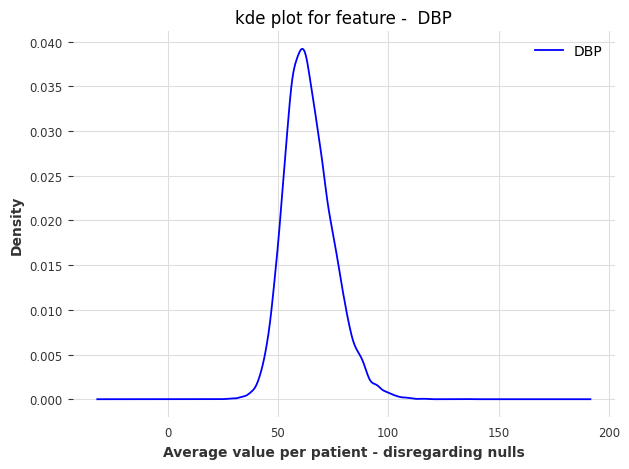

<Figure size 2000x1000 with 0 Axes>

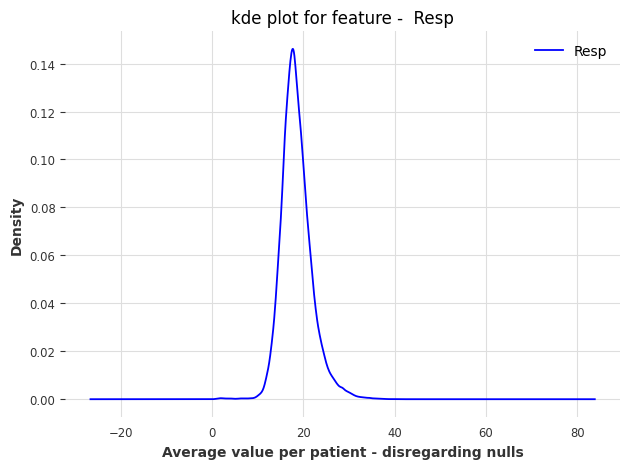

<Figure size 2000x1000 with 0 Axes>

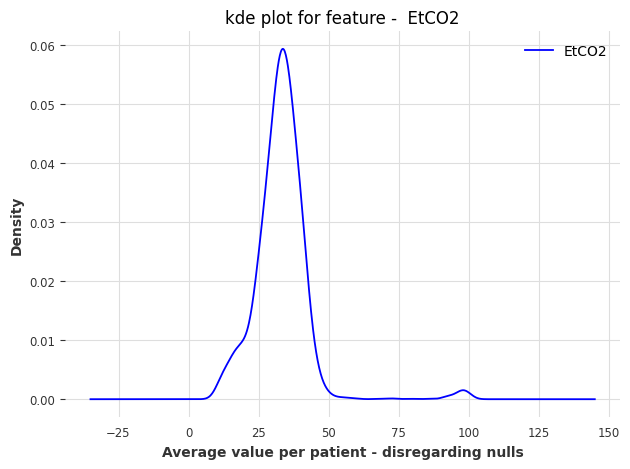

<Figure size 2000x1000 with 0 Axes>

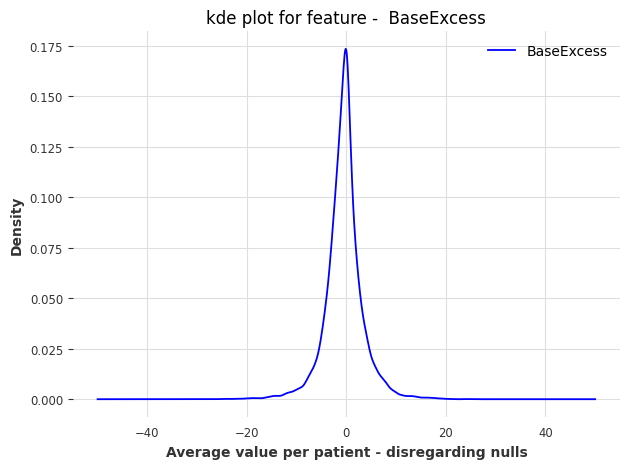

<Figure size 2000x1000 with 0 Axes>

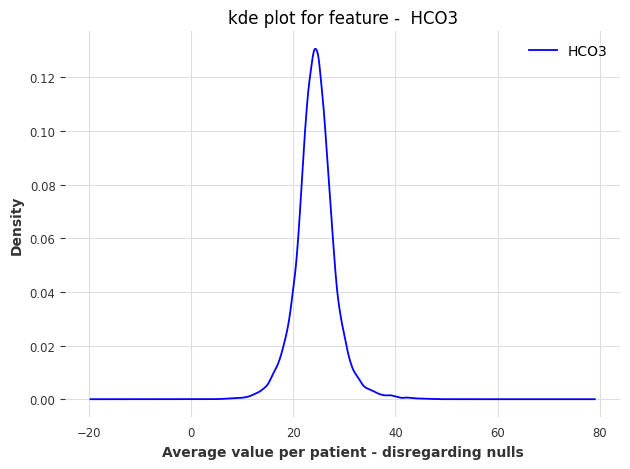

<Figure size 2000x1000 with 0 Axes>

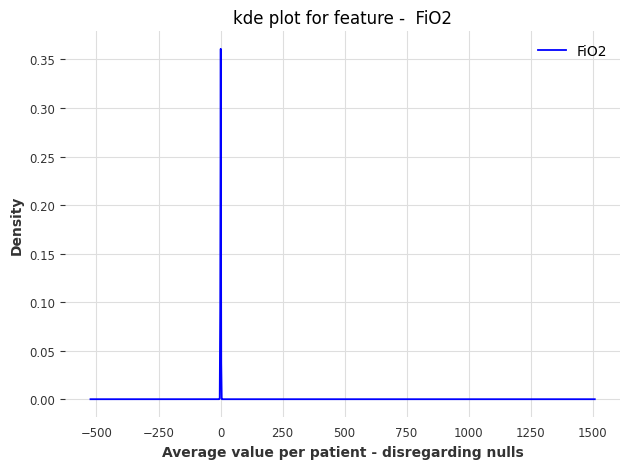

<Figure size 2000x1000 with 0 Axes>

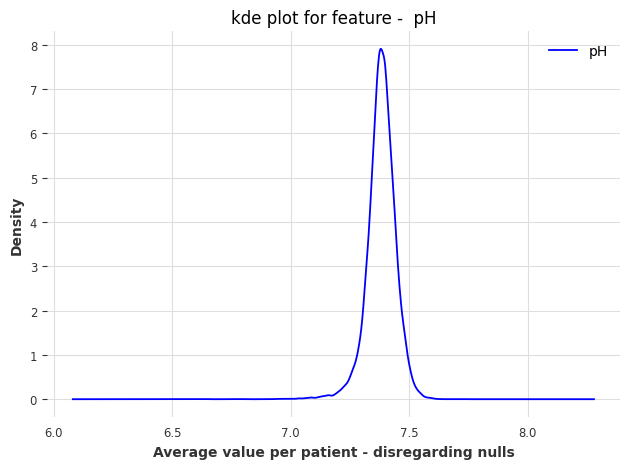

<Figure size 2000x1000 with 0 Axes>

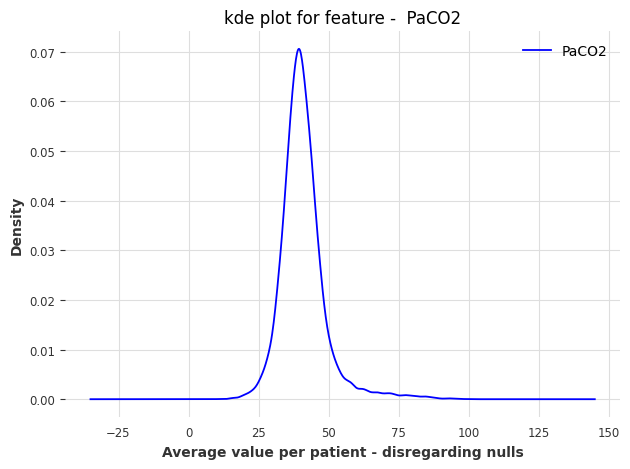

<Figure size 2000x1000 with 0 Axes>

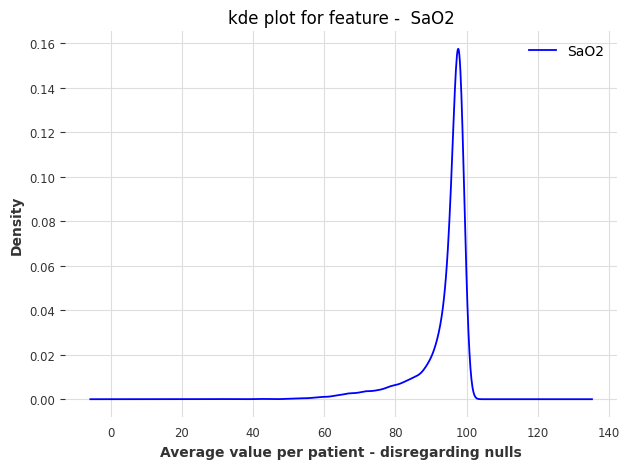

<Figure size 2000x1000 with 0 Axes>

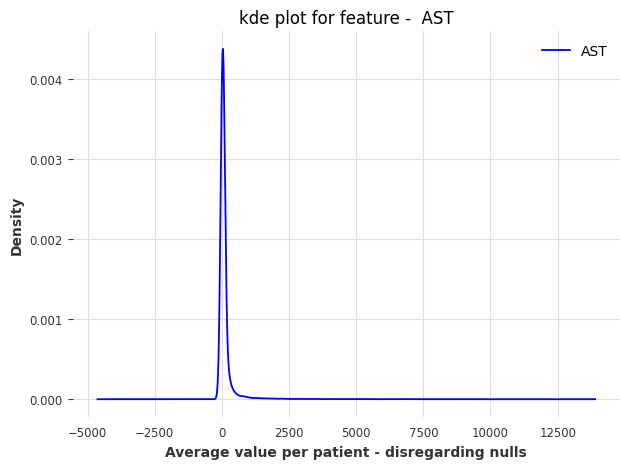

<Figure size 2000x1000 with 0 Axes>

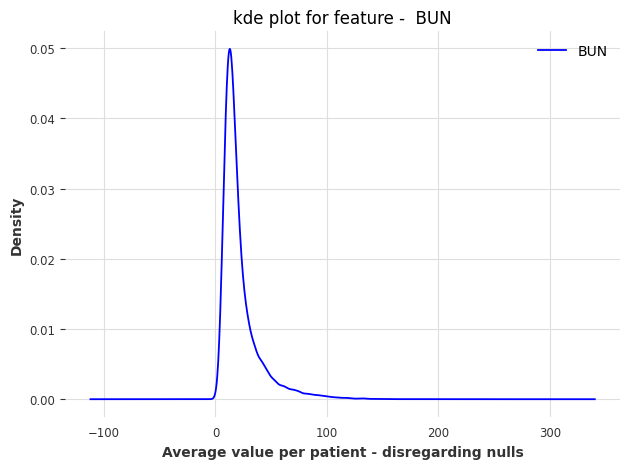

<Figure size 2000x1000 with 0 Axes>

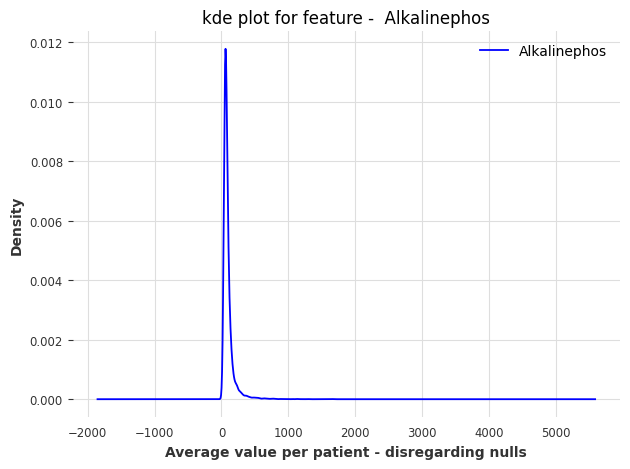

<Figure size 2000x1000 with 0 Axes>

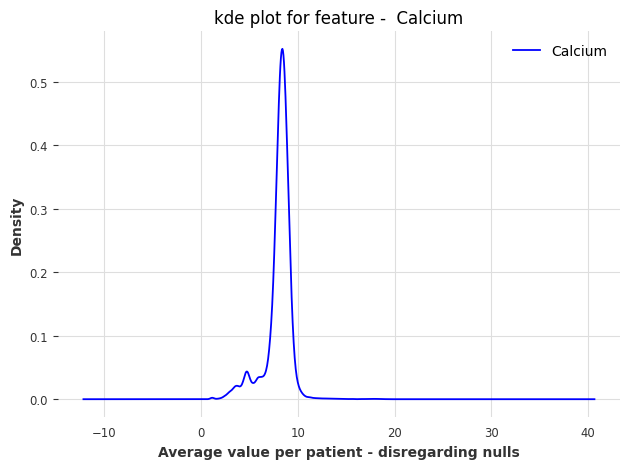

<Figure size 2000x1000 with 0 Axes>

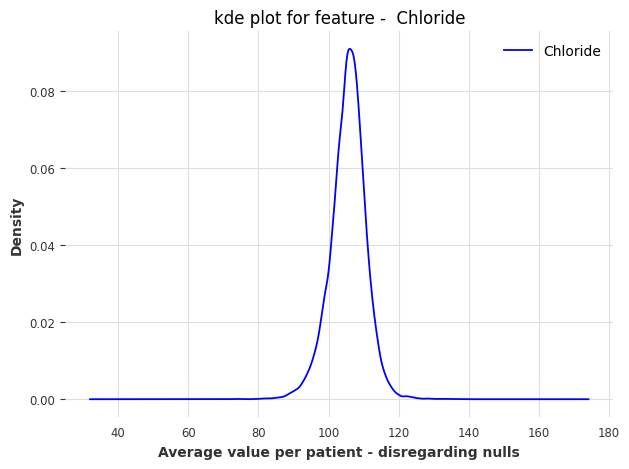

<Figure size 2000x1000 with 0 Axes>

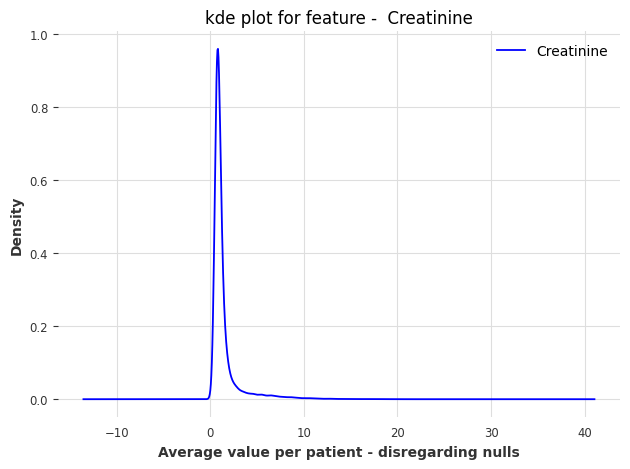

<Figure size 2000x1000 with 0 Axes>

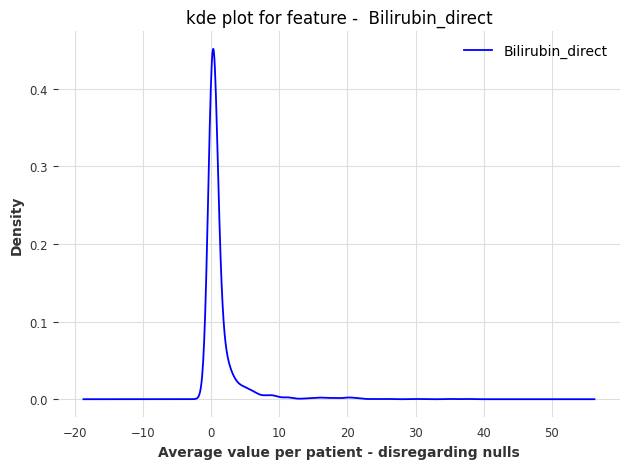

<Figure size 2000x1000 with 0 Axes>

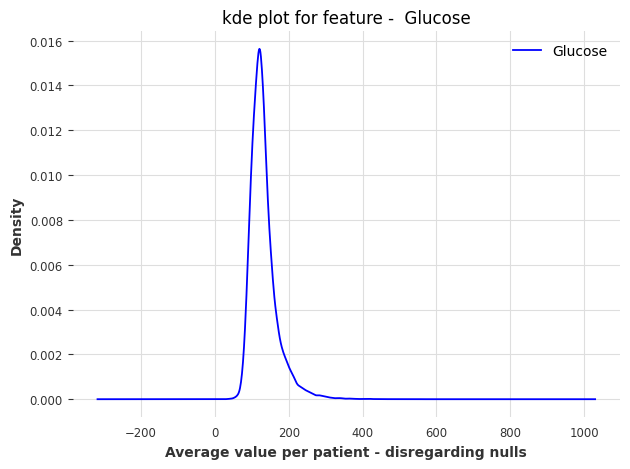

<Figure size 2000x1000 with 0 Axes>

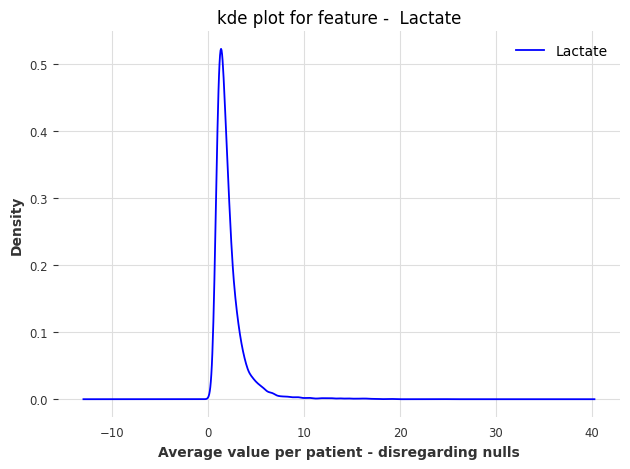

<Figure size 2000x1000 with 0 Axes>

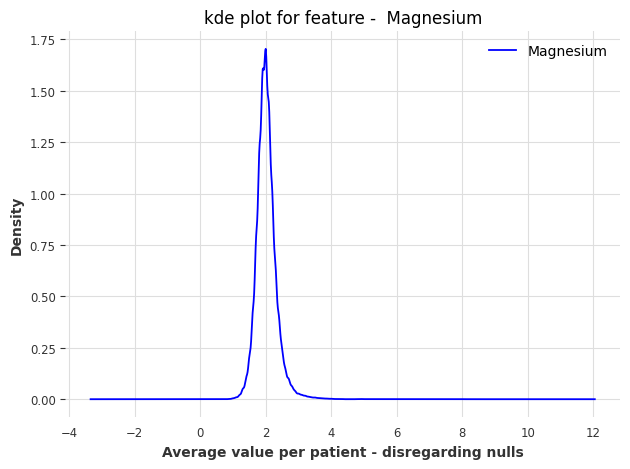

<Figure size 2000x1000 with 0 Axes>

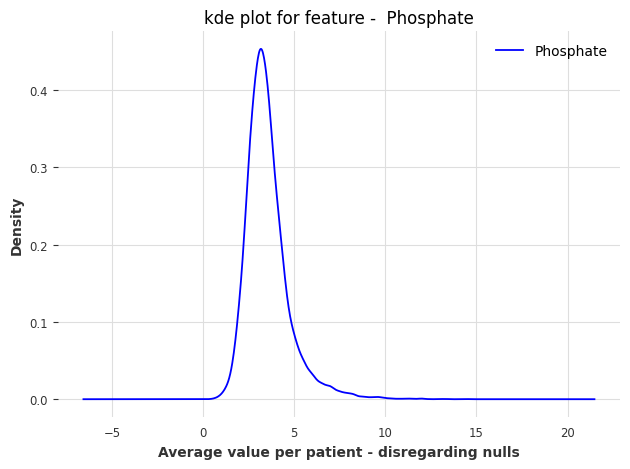

<Figure size 2000x1000 with 0 Axes>

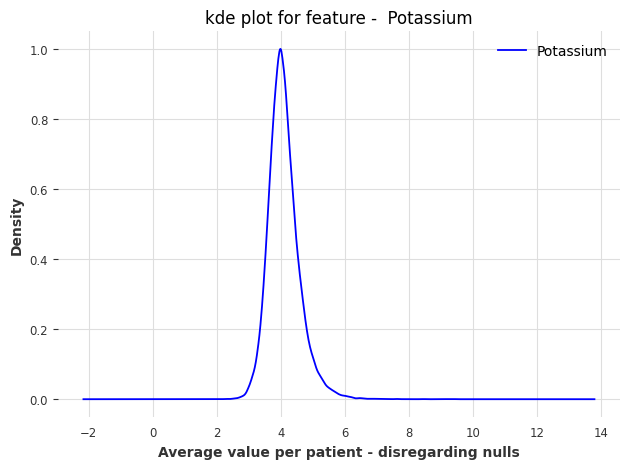

<Figure size 2000x1000 with 0 Axes>

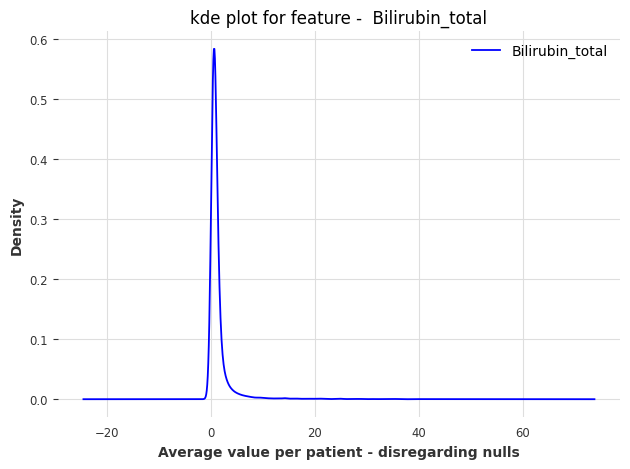

<Figure size 2000x1000 with 0 Axes>

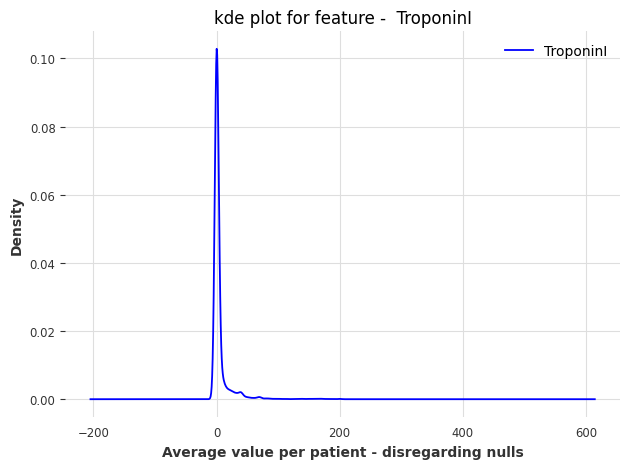

<Figure size 2000x1000 with 0 Axes>

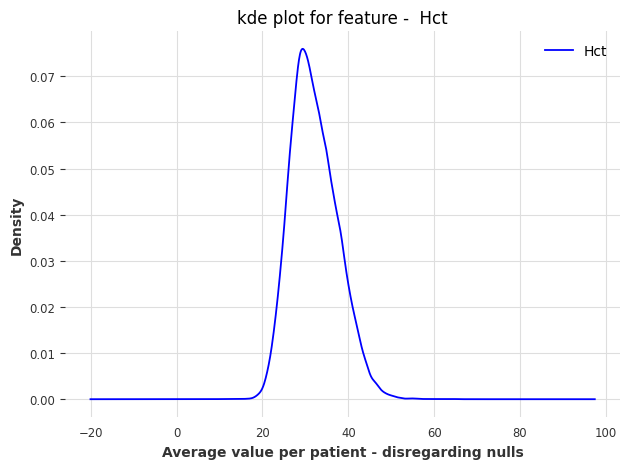

<Figure size 2000x1000 with 0 Axes>

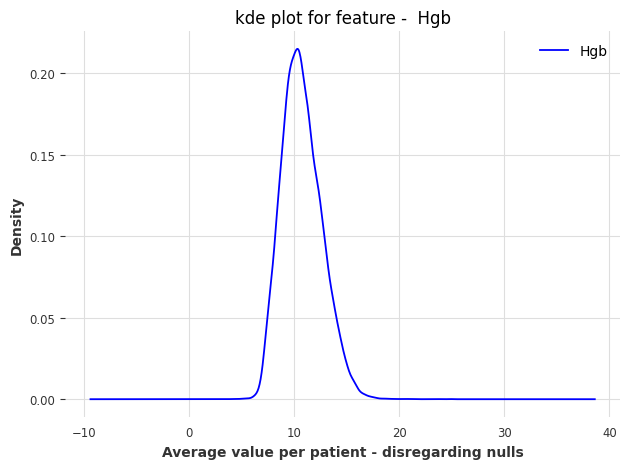

<Figure size 2000x1000 with 0 Axes>

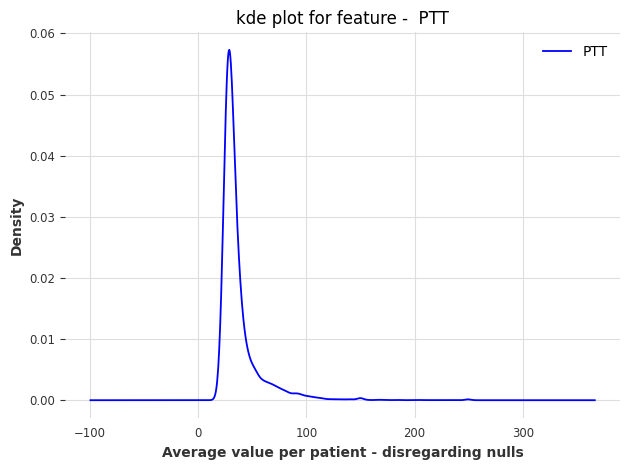

<Figure size 2000x1000 with 0 Axes>

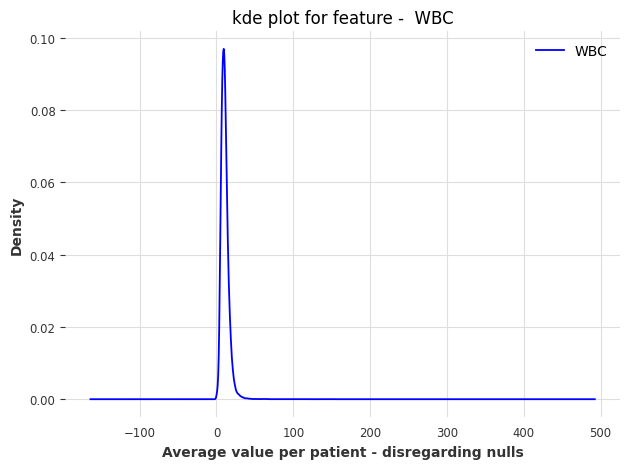

<Figure size 2000x1000 with 0 Axes>

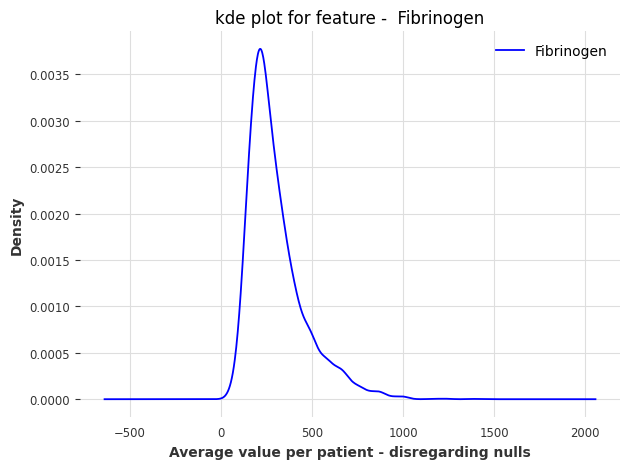

<Figure size 2000x1000 with 0 Axes>

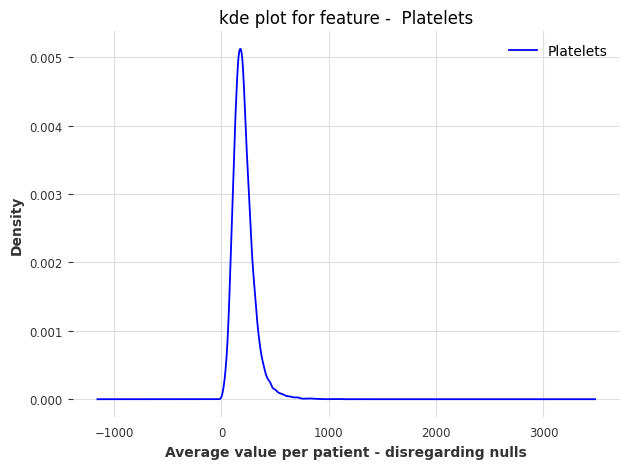

<Figure size 2000x1000 with 0 Axes>

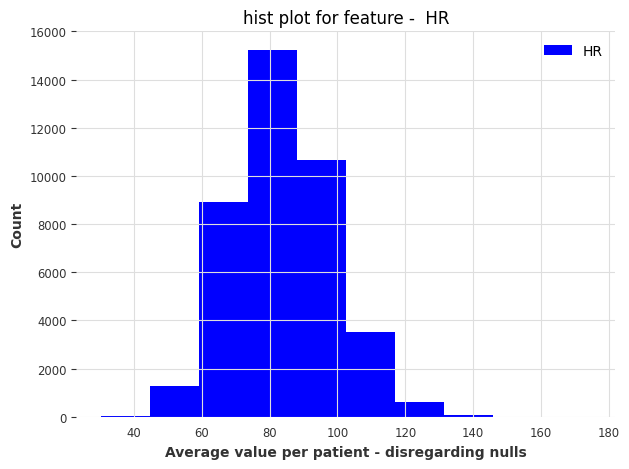

<Figure size 2000x1000 with 0 Axes>

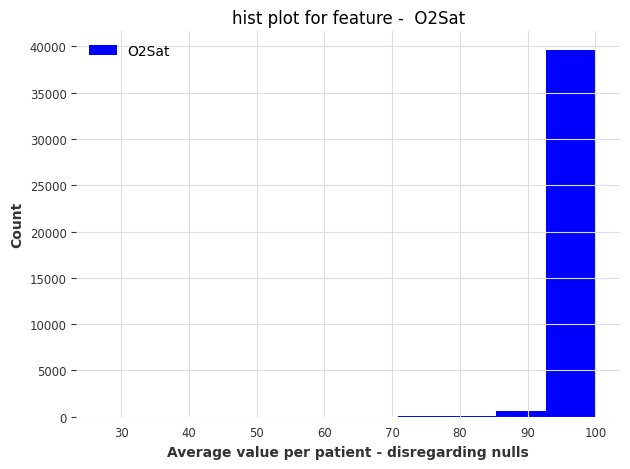

<Figure size 2000x1000 with 0 Axes>

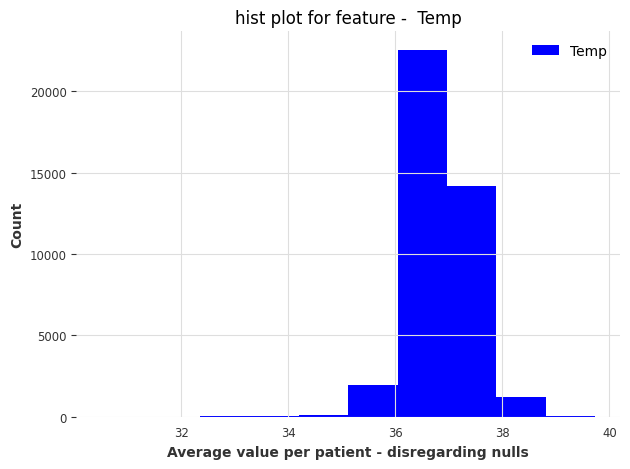

<Figure size 2000x1000 with 0 Axes>

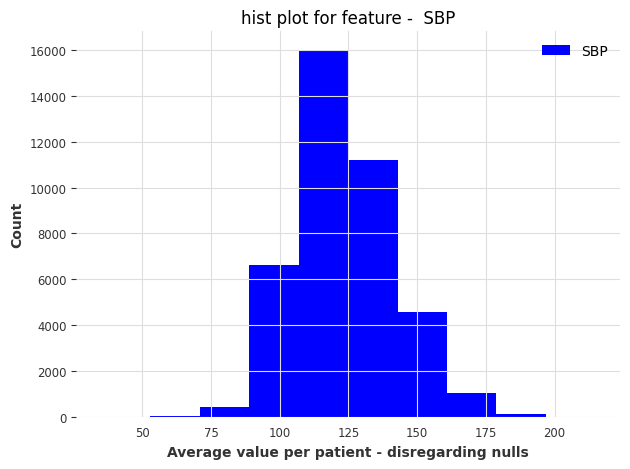

<Figure size 2000x1000 with 0 Axes>

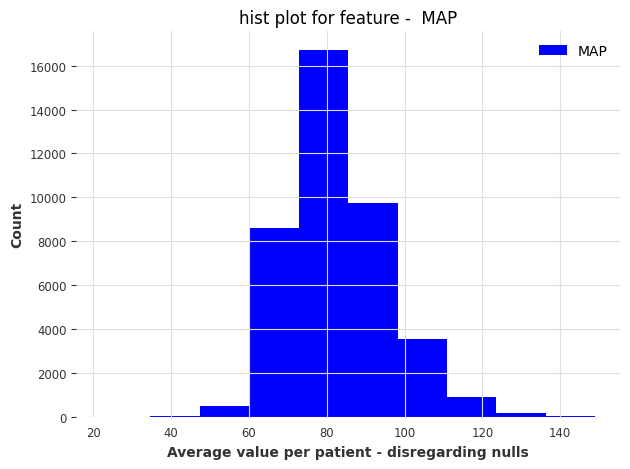

<Figure size 2000x1000 with 0 Axes>

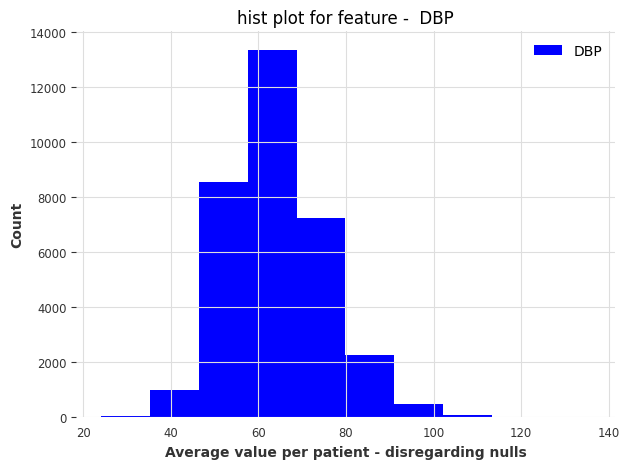

<Figure size 2000x1000 with 0 Axes>

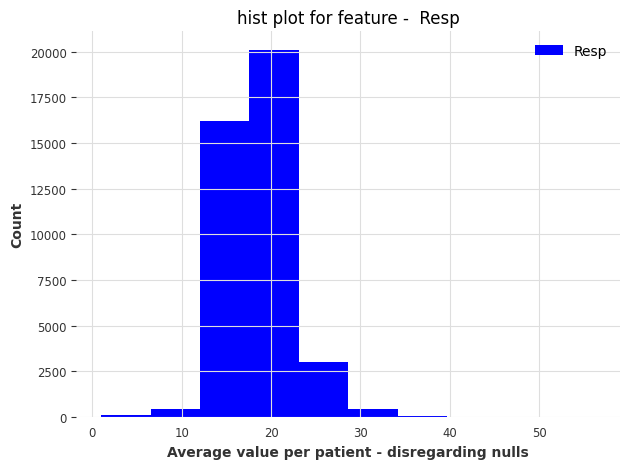

<Figure size 2000x1000 with 0 Axes>

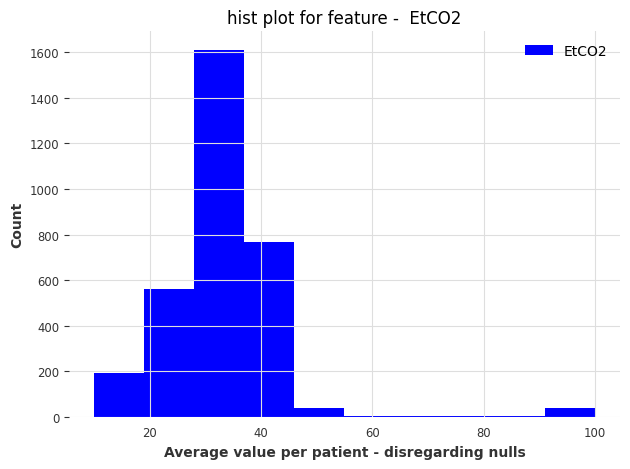

<Figure size 2000x1000 with 0 Axes>

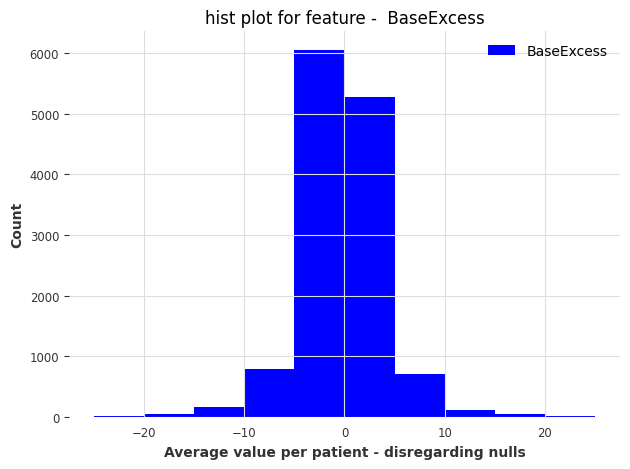

<Figure size 2000x1000 with 0 Axes>

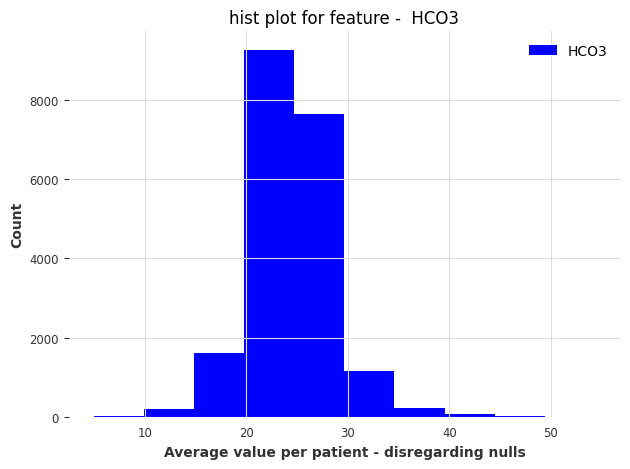

<Figure size 2000x1000 with 0 Axes>

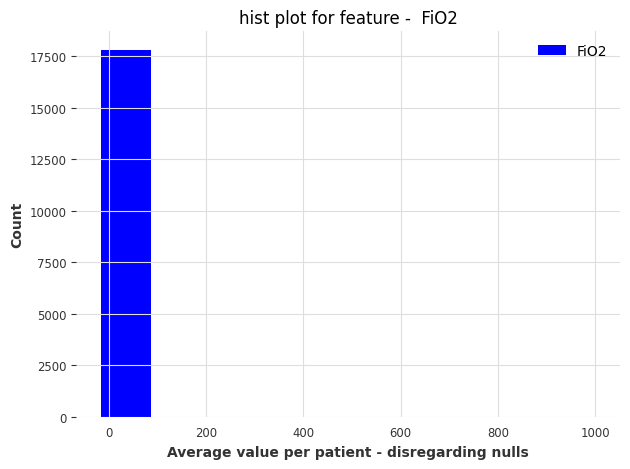

<Figure size 2000x1000 with 0 Axes>

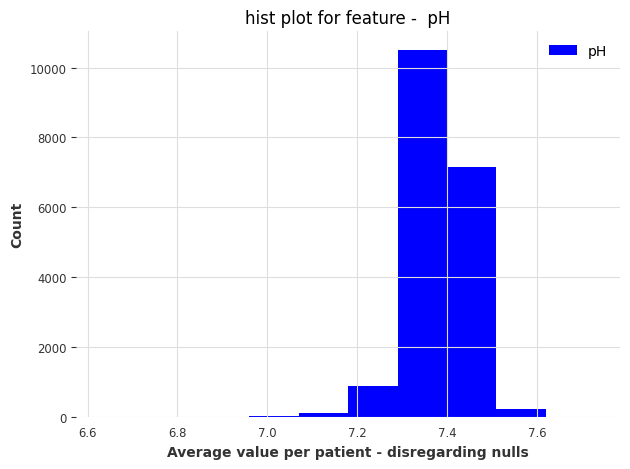

<Figure size 2000x1000 with 0 Axes>

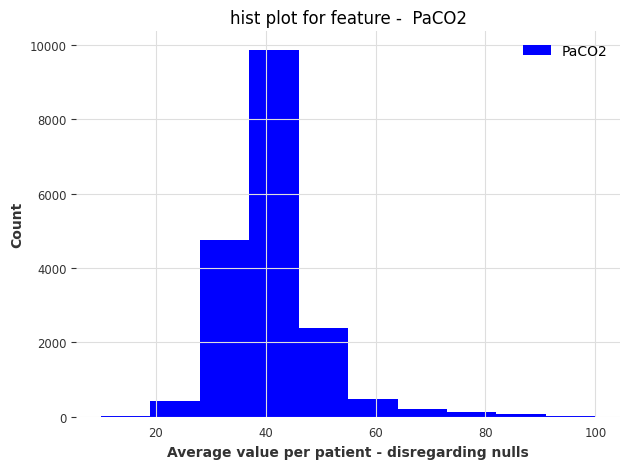

<Figure size 2000x1000 with 0 Axes>

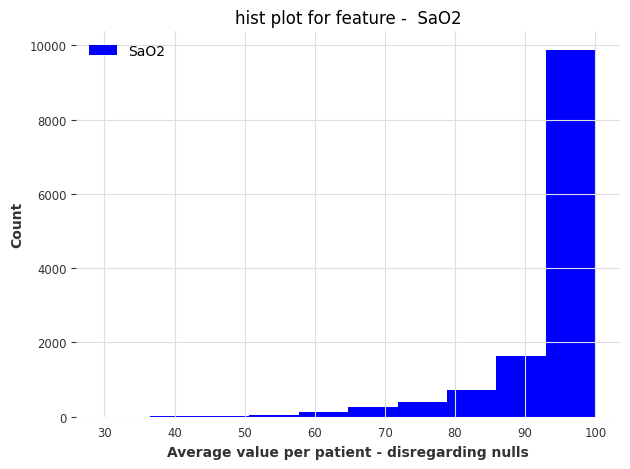

<Figure size 2000x1000 with 0 Axes>

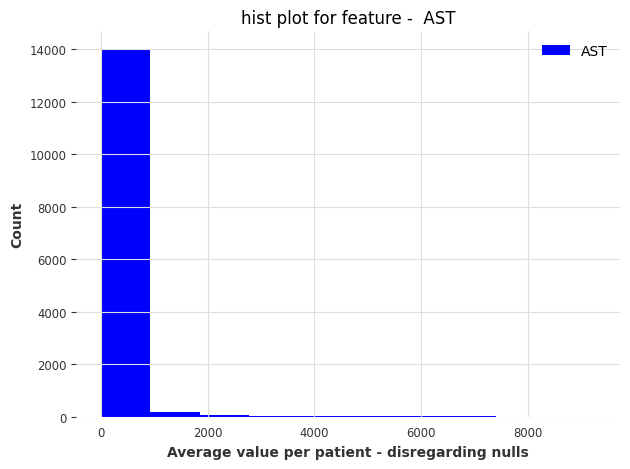

<Figure size 2000x1000 with 0 Axes>

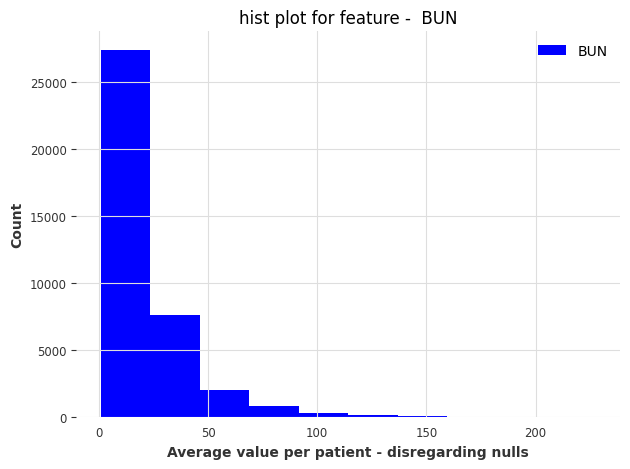

<Figure size 2000x1000 with 0 Axes>

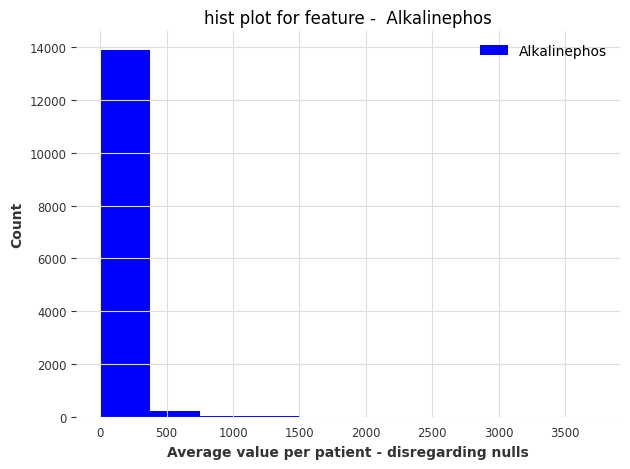

<Figure size 2000x1000 with 0 Axes>

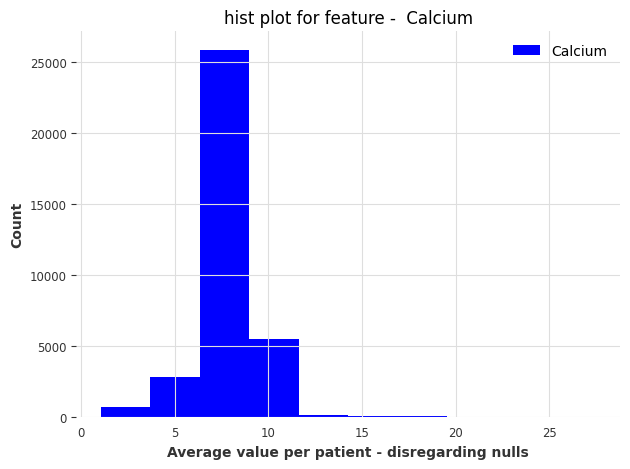

<Figure size 2000x1000 with 0 Axes>

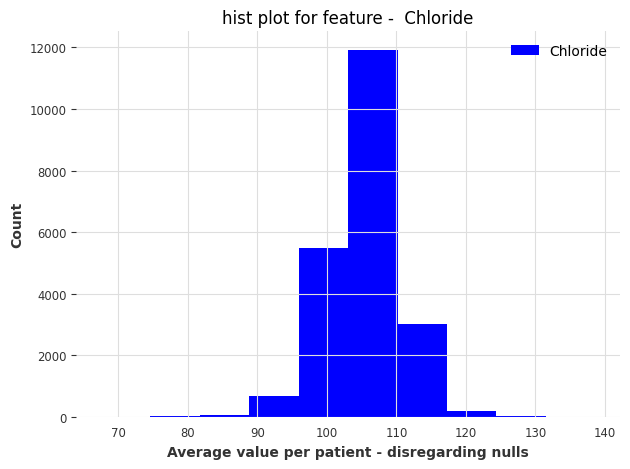

<Figure size 2000x1000 with 0 Axes>

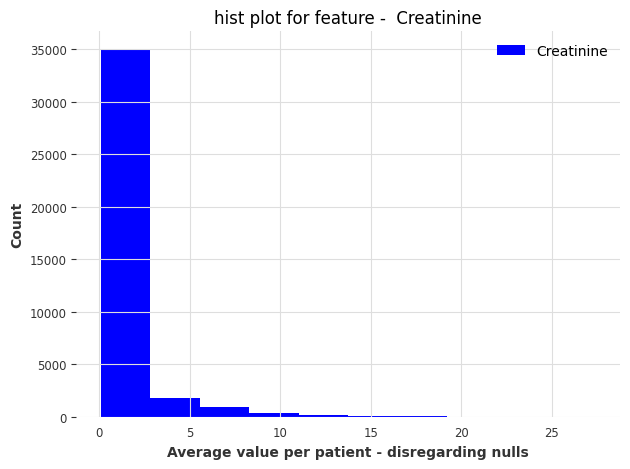

<Figure size 2000x1000 with 0 Axes>

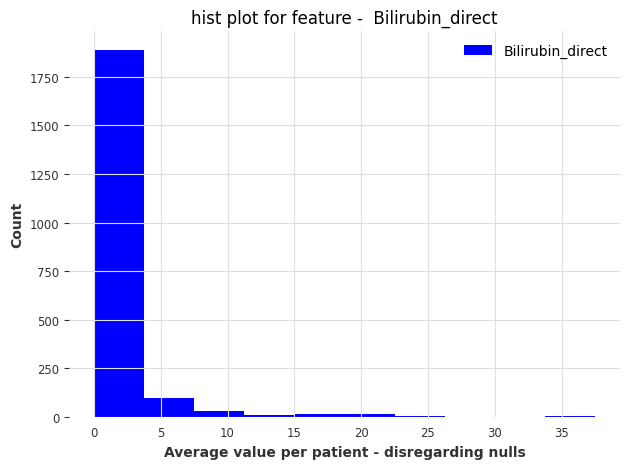

<Figure size 2000x1000 with 0 Axes>

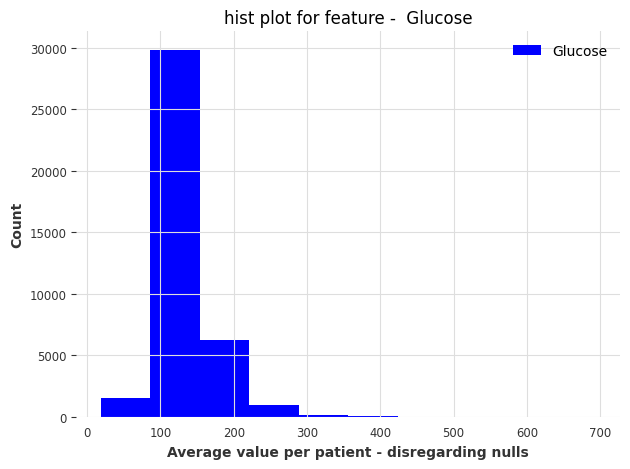

<Figure size 2000x1000 with 0 Axes>

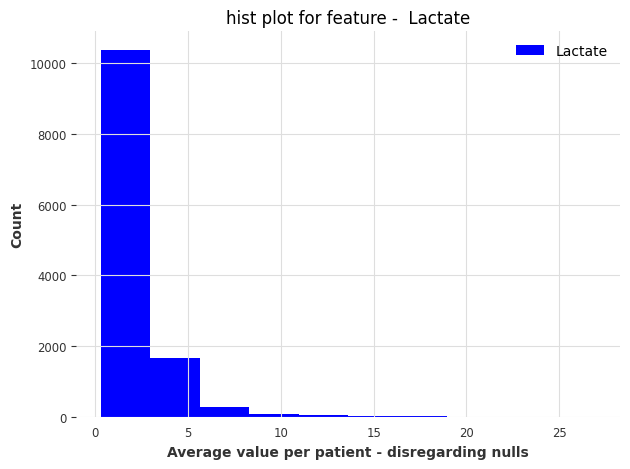

<Figure size 2000x1000 with 0 Axes>

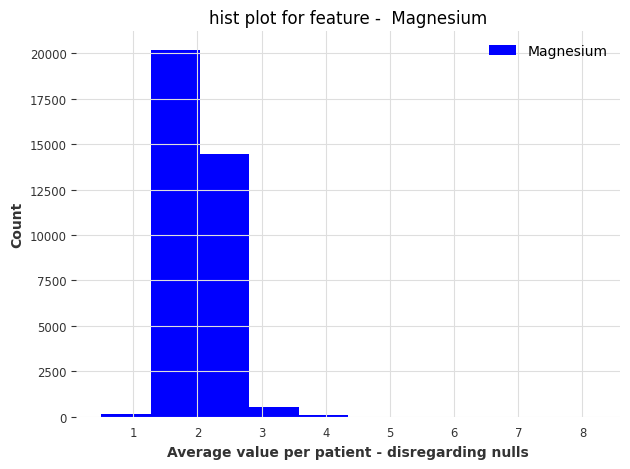

<Figure size 2000x1000 with 0 Axes>

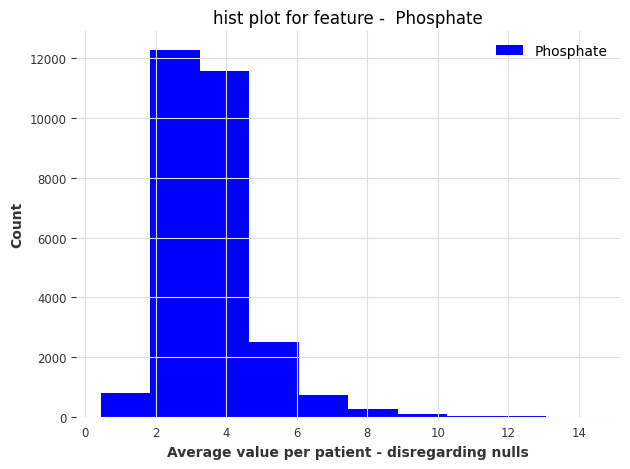

<Figure size 2000x1000 with 0 Axes>

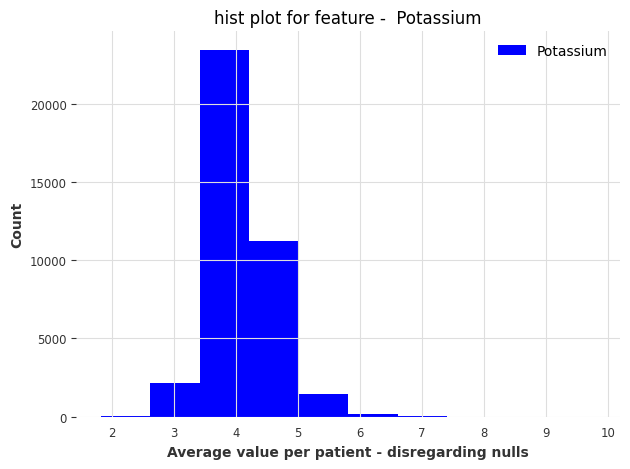

<Figure size 2000x1000 with 0 Axes>

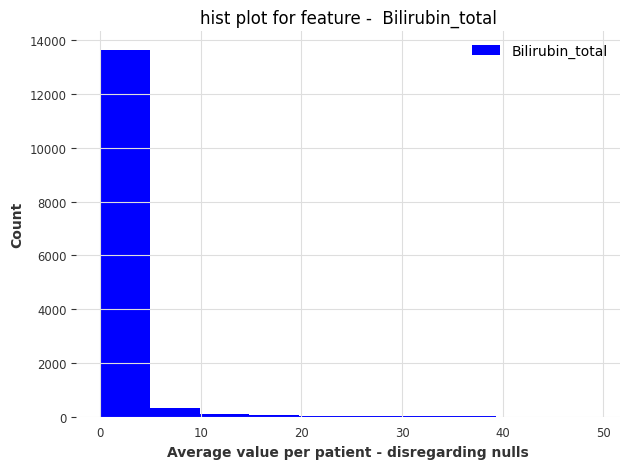

<Figure size 2000x1000 with 0 Axes>

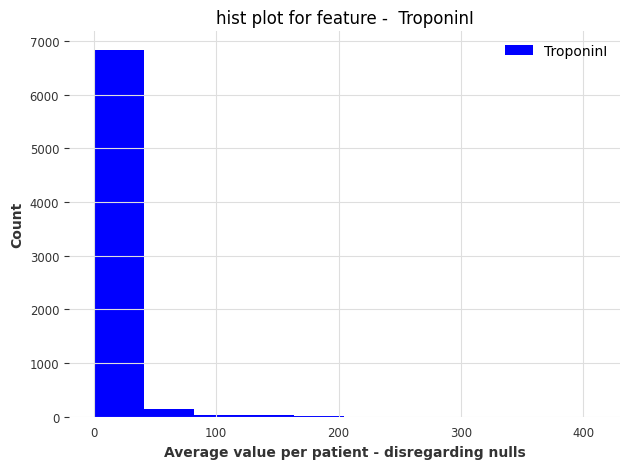

<Figure size 2000x1000 with 0 Axes>

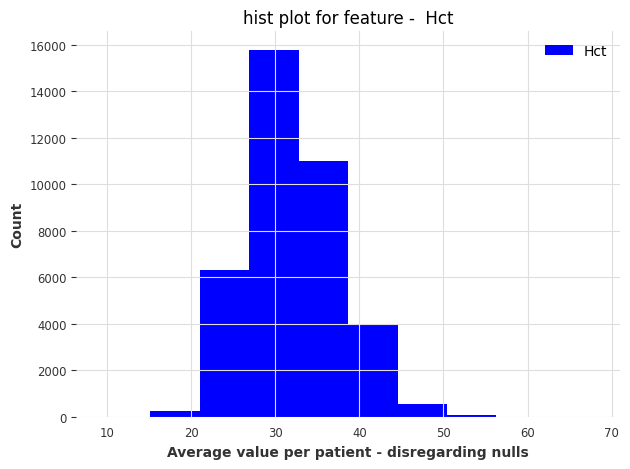

<Figure size 2000x1000 with 0 Axes>

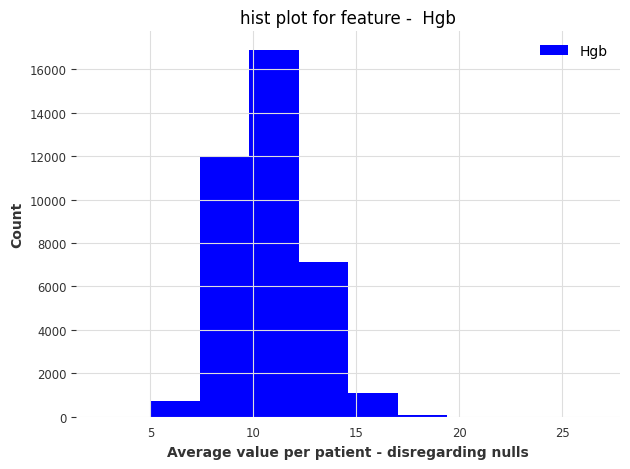

<Figure size 2000x1000 with 0 Axes>

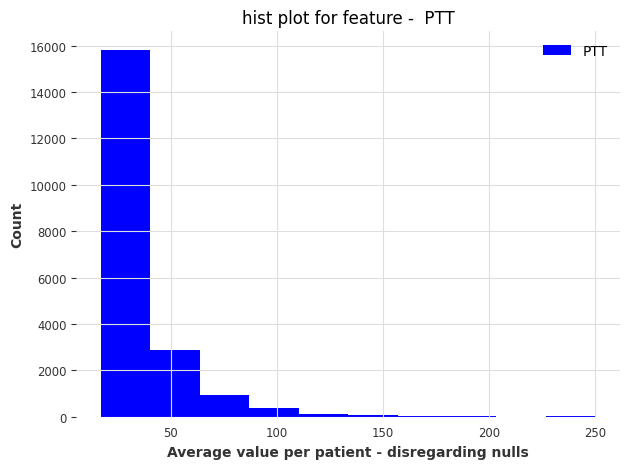

<Figure size 2000x1000 with 0 Axes>

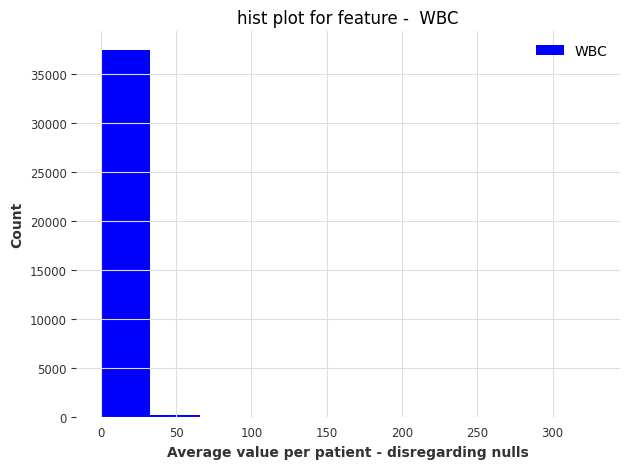

<Figure size 2000x1000 with 0 Axes>

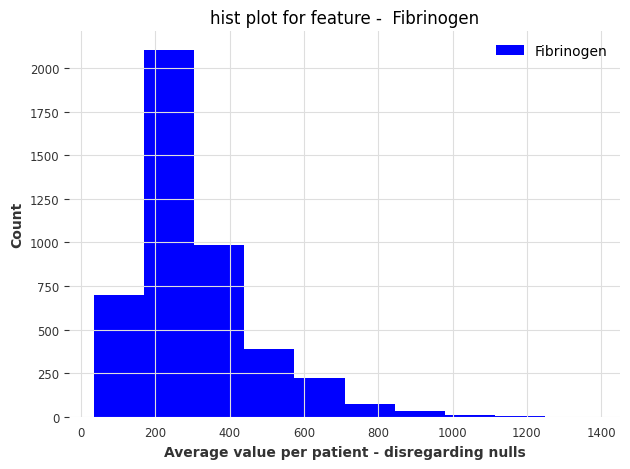

<Figure size 2000x1000 with 0 Axes>

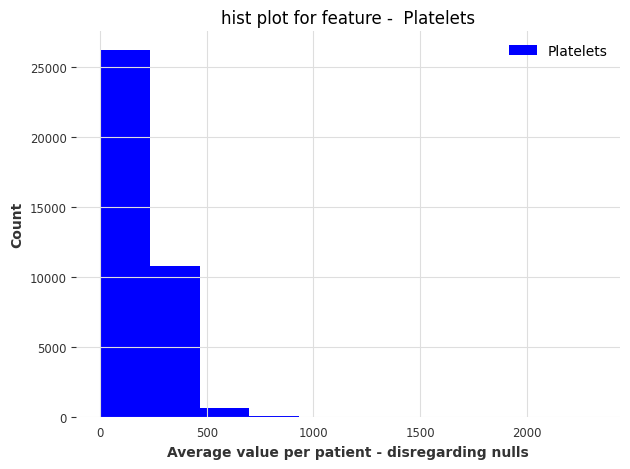

In [2]:
data_explorer = DataExplorer(Path('Data/full_data.parquet'), should_show_plots=True)
data_explorer.plot_feature_counts('../Figures/')
data_explorer.plot_patient_gender_count_by_age('../Figures/')
data_explorer.plot_feature_distributions_by_age_gender('../Figures/AgeGenderDists')
data_explorer.plot_feature_distributions('../Figures/FeatureDists')
data_explorer.plot_feature_distributions('../Figures/FeatureDists', type='hist')

## Data loading and preparation

In [ ]:
model_version = 3
data_loader = DataLoader()
train_label_ts, train_cov_ts, test_label_ts, test_cov_ts = data_loader.load_data_for_training()
base_model_name = f"model_V{model_version}_{datetime.now().strftime('%Y_%m_%d_%H_%M_%S')}"
base_data_path = Path("./Data/ModelTrainingData/")
base_data_path.mkdir(parents=True, exist_ok=True)
data_loader.save_split_data(train_label_ts, train_cov_ts, test_label_ts, test_cov_ts,
                            base_path=str(base_data_path),
                            prefix_name=base_model_name)

## Define and train the model

In [ ]:
# define tunable parameter - rest of parameters have already been optimized.
input_chunk_length = 1
forecast_horizon = 1
epochs = 1

work_dir = './Models/'
my_model = TFTModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=forecast_horizon,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=16,
    n_epochs=epochs,
    work_dir=work_dir,
    add_relative_index=False,
    add_encoders=None,
    save_checkpoints=True,
    likelihood=QuantileRegression(quantiles=quantiles_full),
    # pl_trainer_kwargs={"accelerator": "gpu", "devices": 1}, # Used on cluster
    random_state=42,
)
# train the model
my_model.fit(series=train_label_ts, past_covariates=train_cov_ts, future_covariates=train_cov_ts, verbose=True)

## Save the trained model

In [ ]:
# save two versions of the model - assumes training happens on a GPU
my_model.save(work_dir + f"{base_model_name}.pt")
my_model.to_cpu()
my_model.save(work_dir + f"{base_model_name}_CPU.pt")

## Evaluate the results using official challenge code

In [4]:
# note that this can't actually run without the model file, which we cannot upload to github - please let us know if you require it.
model_name = 'model_V3_CPU_2023_08_27_15_24_22.pt'
evaluate_model(model_name=model_name,
               train_test_data_pickle_file_name=f"{model_name}_ts_train_test.pkl",
               evaluation_results_output_path=f"./ResultsEvaluation/{model_name}_ts_train_test_results.pkl",
               results_file=f"./ResultsEvaluation/{model_name}_ts_train_test_results.pkl")

AUROC: 0.9087460063897763
AUPRC: 0.9087460063897763
Accuracy: 0.9984985774267523
F-measure: 0.9521916518464274
NUO: 0.847539958405445


{'AUROC': 0.9087460063897763,
 'AUPRC': 0.9087460063897763,
 'Accuracy': 0.9984985774267523,
 'F-measure': 0.9521916518464274,
 'NUO': 0.847539958405445}

## Evaluate the results looking for biases

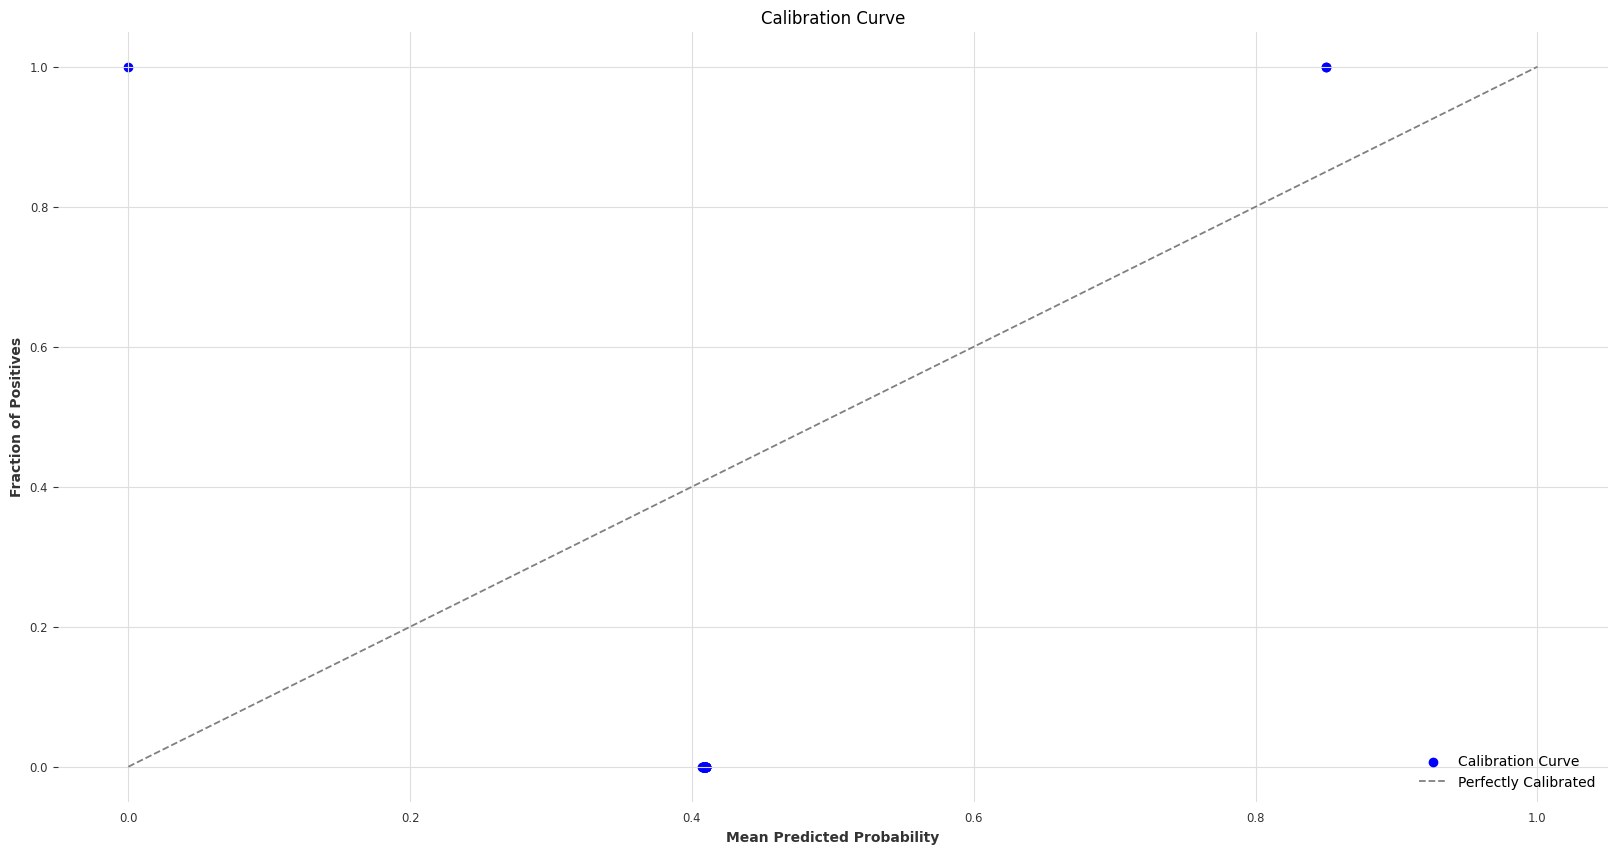

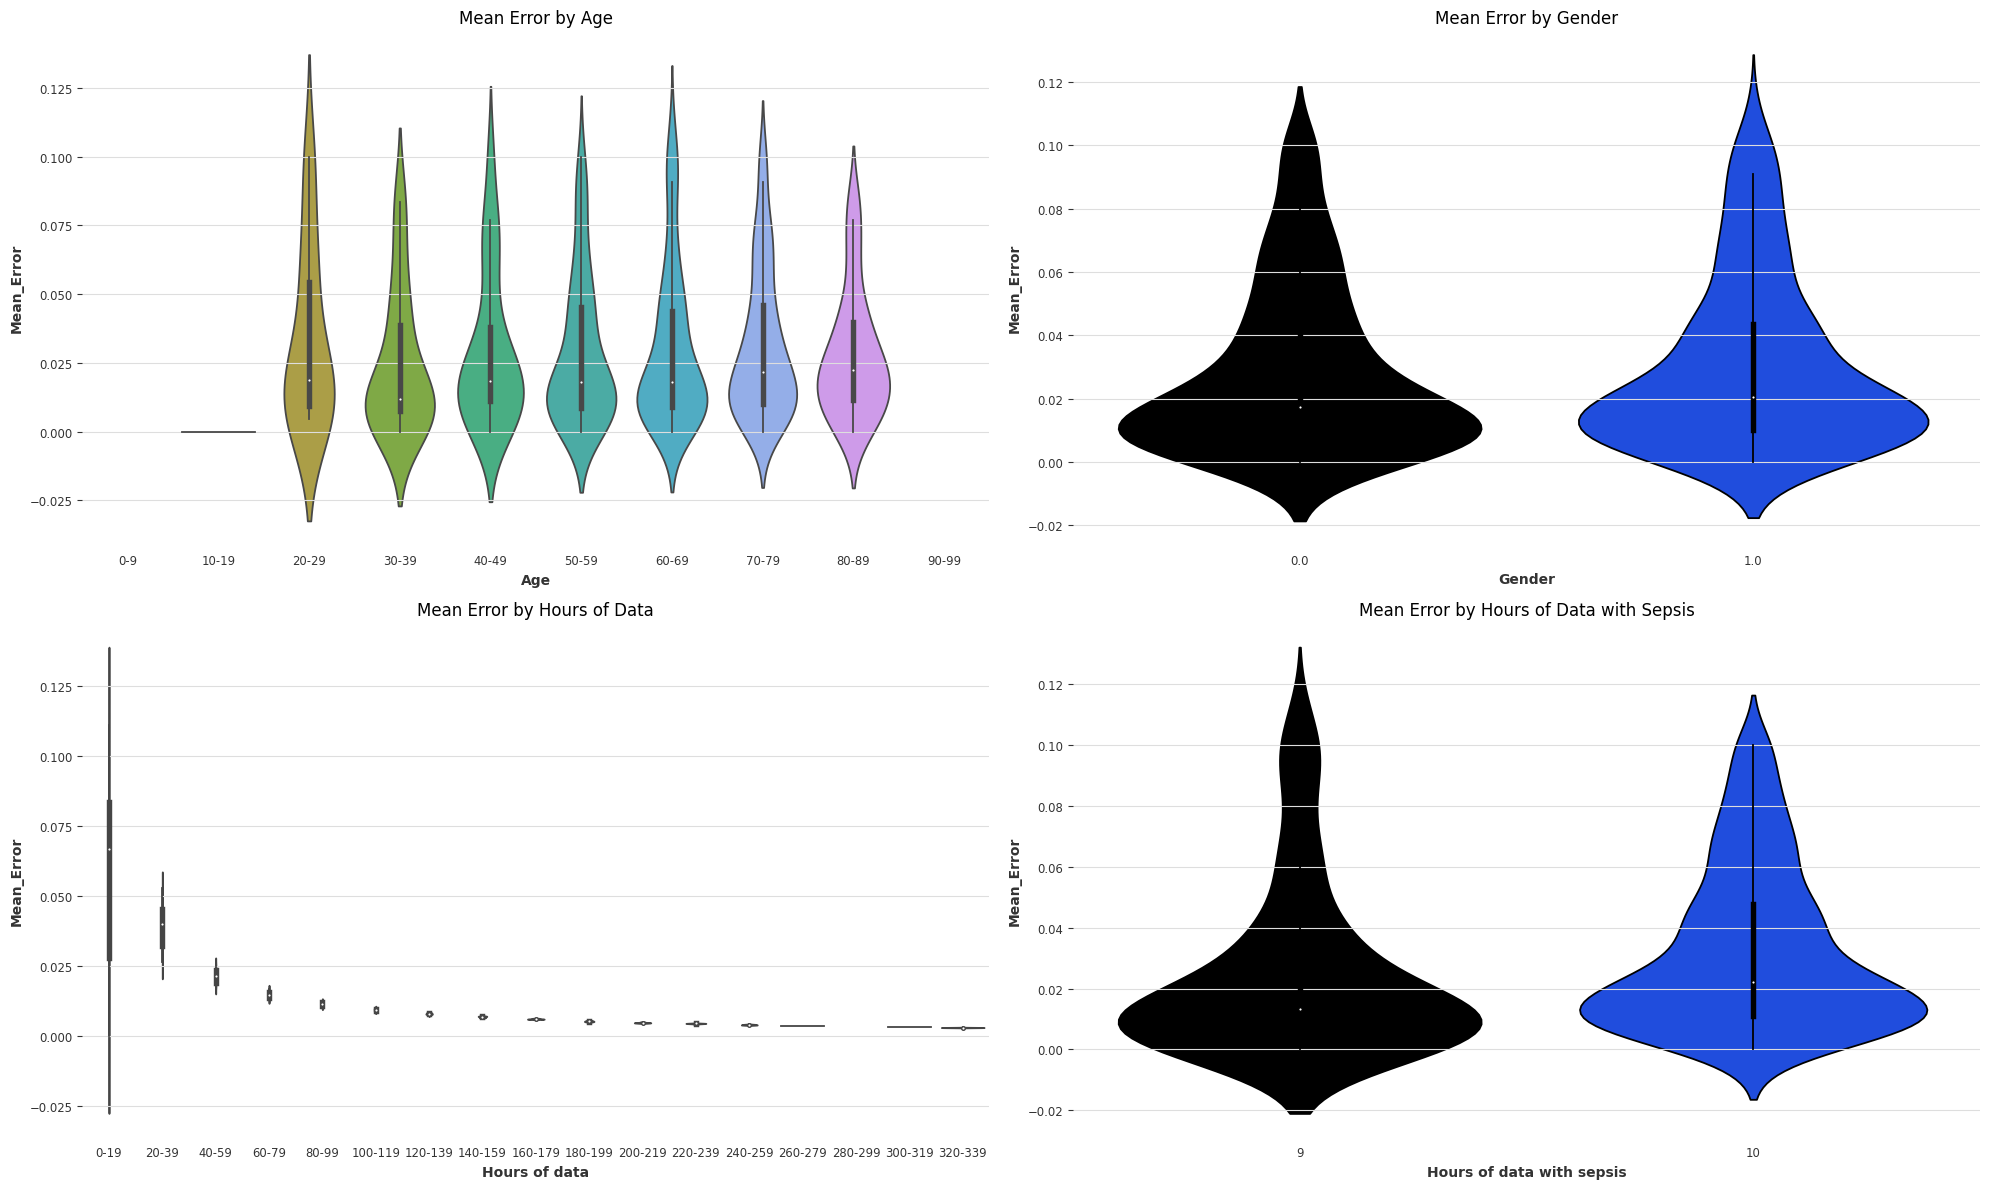

In [5]:
evaluate_results(results_file_path=f"./ResultsEvaluation/{model_name}_ts_train_test_results.pkl",
                 results_output_path_base=f"./ResultsEvaluation/{model_name}_ts_train_test_results",
                 train_test_pkl_path="./Data/ffill_ts_train_test.pkl",
                 results_df_read_path=f"./ResultsEvaluation/{model_name}_ts_train_test_results.csv",
                 model_name=model_name,
                 should_show_plots=True)